## LENDING CLUB Case Study

---
### Problem Statement
---

##### Business Understanding

You work for a __consumer finance company__ which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two ___types of risks___ are associated with the bank’s decision:

- If the applicant is __likely to repay the loan__, then not approving the loan results in a ___loss of business___ to the company
- If the applicant is __not likely to repay the loan__, i.e. he/she is likely to default, then approving the loan may lead to a ___financial loss___ for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (_to risky applicants_) at a higher interest rate, etc.

In this case study, you will use EDA to understand how __consumer attributes__ and __loan attributes__ influence the tendency of default.

When a person applies for a loan, there are ___two types of decisions___ that could be taken by the company:

- __Loan accepted:__ If the company approves the loan, there are 3 possible scenarios described below:

>__Fully paid:__ Applicant has fully paid the loan (_the principal and the interest rate_)

>__Current:__ Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

>__Charged-off:__ Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has ___defaulted___ on the loan 

- __Loan rejected:__ The company had rejected the loan (_because the candidate does not meet their requirements etc._). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (_and thus in this dataset_)

##### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (_called credit loss_). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who __default__ cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the __driving factors__ (___or driver variables___) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (_understanding the types of variables and their significance should be enough_).

---
### Exploratory Data Analysis
---
##### Clean Data

In [1]:
# import required libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 123)

__Load__ CSV file

In [2]:
# read CSV file into DataFrame
df_loan = pd.read_csv('loan.csv',low_memory=False)

In [3]:
# total number of Coloumns & Rows
df_loan.shape

(39717, 111)

In [4]:
# Columns type
df_loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

Identify __NULL__ Columns

In [5]:
# total sum of NULL data in Columns
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# missing data in Columns (%)
null_values = round(100*df_loan.isnull().sum()/df_loan.shape[0])
missing_data = null_values[null_values>0]
missing_data

emp_title                           6.0
emp_length                          3.0
desc                               33.0
mths_since_last_delinq             65.0
mths_since_last_record             93.0
next_pymnt_d                       97.0
mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0


Drop __Missing__ data Columns 

In [7]:
# Columns missing data more than 60%
drop_columns = missing_data[missing_data>60]
drop_columns

mths_since_last_delinq             65.0
mths_since_last_record             93.0
next_pymnt_d                       97.0
mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0


In [8]:
# drop Columns missing data more than 60%
df_loan.drop(drop_columns.index, axis=1, inplace=True)

In [9]:
# total number of Coloumns & Rows
df_loan.shape

(39717, 54)

In [10]:
# further missing data in Columns (%)
null_values2 = round(100*df_loan.isnull().sum()/df_loan.shape[0], 2)
missing_data2 = null_values2[null_values2>0]
missing_data2

emp_title                      6.19
emp_length                     2.71
desc                          32.59
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [11]:
# 'desc' Column data
df_loan.loc[:,'desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

__Drop__ _'desc'_ Column as it has no purpose in Analysis

In [12]:
# drop 'desc' Column
df_loan.drop('desc', axis=1, inplace=True)
df_loan.shape

(39717, 53)

In [13]:
# drop 'desc' from missing data
missing_data2.drop('desc', inplace=True)

In [14]:
# partial data Unique values & Count
for x in missing_data2.index: print(x + ' (' + str(len(df_loan[x].unique())) + '): ' + str(df_loan[x].unique()) + '\n')

emp_title (28821): [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']

emp_length (12): ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

title (19616): ['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']

revol_util (1090): ['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']

last_pymnt_d (102): ['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Aug-14' 'Oct-14'
 'Aug-12' 'Jul-14' 'Jul-13' 'Jan-16' 'Feb-16' 'Apr-15' 'Feb-14' 'Sep-14'
 'Jun-12' 'Feb-13' 'Mar-13' 'May-14' 'Mar-15' 'Jan-13' 'Dec-13' 'Feb-12'
 'Mar-14' 'Sep-15' 'Nov-15' 'Mar-16' 'Jan-12' 'Oct-15' 'Nov-14' 'Mar-12'
 'May-12' 'Apr-16' 'Dec-15' 'Jun-15' 'May-15' 'Jul-15' 'Dec-11' 'Nov-11'
 'Oct


__Categorical Columns:__ _with limited values_
1. emp_length
2. collections_12_mths_ex_med
3. chargeoff_within_12_mths
4. pub_rec_bankruptcies
5. tax_liens

__Drop Columns:__ _these Columns with Vaues [0, Nan & Null] has no Importance in Analysis_
1. collections_12_mths_ex_med
2. chargeoff_within_12_mths
3. tax_liens

In [15]:
# drop 'collections_12_mths_ex_med', 'chargeoff_within_12_mths' and 'tax_liens' Columns
drop_Columns2 = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
df_loan.drop(drop_Columns2, axis=1, inplace=True)
df_loan.shape

(39717, 50)

In [16]:
# 'pub_rec_bankruptcies' Column value Counts
df_loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [17]:
# 'pub_rec_bankruptcies' Column Null data Rows
df_loan.pub_rec_bankruptcies.isnull().sum()

697

__Drop__ Rows with missing data in Column _'pub_rec_bankruptcies'_ as this is Critical data for Analysis

In [18]:
# drop the Null 'pub_rec_bankruptcies' column valued Rows
df_loan = df_loan[~df_loan.pub_rec_bankruptcies.isnull()]
df_loan.shape

(39020, 50)

In [19]:
# further missing data in Columns (%)
null_values3 = round(100*df_loan.isnull().sum()/df_loan.shape[0], 2)
missing_data3 = null_values3[null_values3>0]
missing_data3

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [20]:
# 'emp_title' Column value Counts
df_loan.emp_title.value_counts()

emp_title
US Army                        132
Bank of America                108
IBM                             66
AT&T                            59
Kaiser Permanente               55
                              ... 
Alliance Audio Visual            1
Hall Family Homes                1
The Dale Association             1
PEARSON CHRYSLER JEEP DODGE      1
Fairfield Manufacturing          1
Name: count, Length: 28344, dtype: int64

In [21]:
# 'emp_title' Column Null data Rows
df_loan.emp_title.isnull().sum()

2416

__Drop__ Rows with missing data in Column _'emp_title'_ as this is Important data for Analysis

In [22]:
# drop the Null 'emp_title' column valued Rows
df_loan = df_loan[~df_loan.emp_title.isnull()]
df_loan.shape

(36604, 50)

In [23]:
# 'emp_length' Column value Counts
df_loan.emp_length.value_counts()

emp_length
10+ years    8417
2 years      4189
< 1 year     4071
3 years      3925
4 years      3312
5 years      3144
1 year       3042
6 years      2126
7 years      1701
8 years      1410
9 years      1211
Name: count, dtype: int64

In [24]:
# 'emp_length' Column Null data Rows
df_loan.emp_length.isnull().sum()

56

__Drop__ Rows with missing data in Column _'emp_length'_ as this is Important data for Analysis

In [25]:
# drop the Null 'emp_length' column valued Rows
df_loan = df_loan[~df_loan.emp_length.isnull()]
df_loan.shape

(36548, 50)

In [26]:
# 'title' Column value Counts
df_loan.title.value_counts()

title
Debt Consolidation                        2068
Debt Consolidation Loan                   1648
Personal Loan                              609
Consolidation                              490
debt consolidation                         467
                                          ... 
Down Payment on a House                      1
Personal Loan (Not School Related)           1
emily loan                                   1
Tickets Advertising                          1
Merging 2 Accounts into one to save $$       1
Name: count, Length: 18005, dtype: int64

In [27]:
# 'title' Column Null data Rows
df_loan.title.isnull().sum()

9

__Drop__ Rows with missing data in Column _'title'_ as this makes no major impact on data Analysis

In [28]:
# drop the Null 'title' column valued Rows
df_loan = df_loan[~df_loan.title.isnull()]
df_loan.shape

(36539, 50)

In [29]:
# 'revol_util' Column value Counts
df_loan.revol_util.value_counts()

revol_util
0%        854
0.20%      58
64.80%     55
66.60%     55
70.40%     55
         ... 
25.74%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: count, Length: 1082, dtype: int64

In [30]:
# 'revol_util' Column Null data Rows
df_loan.revol_util.isnull().sum()

46

__Drop__ Rows with missing data in Column _'revol_util'_ as this makes no major impact on data Analysis

In [31]:
# drop the Null 'revol_util' column valued Rows
df_loan = df_loan[~df_loan.revol_util.isnull()]
df_loan.shape

(36493, 50)

In [32]:
# 'last_pymnt_d' Column value Counts
df_loan.last_pymnt_d.value_counts()

last_pymnt_d
May-16    1174
Mar-13     967
Dec-14     875
May-13     856
Feb-13     816
Mar-12     799
Aug-12     790
Apr-13     787
Oct-12     781
Mar-14     770
Aug-14     770
Jan-14     767
Jul-14     760
Oct-14     755
Jul-13     734
Feb-14     729
Dec-13     727
Sep-12     727
Jan-13     722
Jun-14     716
Jul-12     705
Feb-12     696
May-12     691
Aug-13     687
Apr-12     681
Nov-12     671
Jun-12     670
Dec-12     652
Jun-13     652
Oct-13     645
Sep-13     636
May-14     636
Sep-14     635
Apr-14     627
Nov-13     626
Nov-14     537
Jan-12     511
Dec-11     510
Sep-11     419
Oct-11     419
Nov-11     418
Aug-11     414
Apr-11     393
Mar-11     379
Jul-11     365
Jun-11     352
May-11     351
Jan-15     313
Feb-11     258
Jul-15     240
Nov-15     218
Jun-15     213
Apr-16     209
Mar-16     203
Jan-11     199
Sep-15     195
Dec-10     194
Aug-15     192
Oct-15     179
Oct-10     179
Mar-15     174
Jan-16     173
Dec-15     165
Feb-15     158
Nov-10     155
Feb-16     1

In [33]:
# 'last_pymnt_d' Column Null data Rows
df_loan.last_pymnt_d.isnull().sum()

60

__Drop__ Rows with missing data in Column _'last_pymnt_d'_ as this makes no major impact on data Analysis

In [34]:
# drop the Null 'last_pymnt_d' column valued Rows
df_loan = df_loan[~df_loan.last_pymnt_d.isnull()]
df_loan.shape

(36433, 50)

In [35]:
# Final missing data in Columns (%)
null_valuesF = round(100*df_loan.isnull().sum()/df_loan.shape[0], 2)
missing_dataF = null_valuesF[null_valuesF>0]
missing_dataF.count()

0

Analize __Unique__ values in Columns

In [36]:
# identify Unique values
unique_val = df_loan.nunique()
unique_val

id                         36433
member_id                  36433
loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7474
term                           2
int_rate                     334
installment                14367
grade                          7
sub_grade                     35
emp_title                  28207
emp_length                    11
home_ownership                 4
annual_inc                  4924
verification_status            3
issue_d                       52
loan_status                    3
pymnt_plan                     1
url                        36433
purpose                       14
title                      17954
zip_code                     806
addr_state                    49
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util

In [37]:
# Columns with unique values for each Row
drop_Nuniq = df_loan.columns[unique_val == df_loan.shape[0]]
drop_Nuniq

Index(['id', 'member_id', 'url'], dtype='object')

__Drop__ Columns: _'id'_, _'member_id'_ and _'url'_ are having Unique values for each row

In [38]:
# Drop Columns with unique values for each Row
df_loan.drop(drop_Nuniq, axis=1, inplace=True)
df_loan.shape

(36433, 47)

In [39]:
# again identify Unique values
unique_val2 = df_loan.nunique()
unique_val2

loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7474
term                           2
int_rate                     334
installment                14367
grade                          7
sub_grade                     35
emp_title                  28207
emp_length                    11
home_ownership                 4
annual_inc                  4924
verification_status            3
issue_d                       52
loan_status                    3
pymnt_plan                     1
purpose                       14
title                      17954
zip_code                     806
addr_state                    49
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util                  1082
total_acc                     79
initial_list_status            1
out_prncp 

In [40]:
# Columns with Same values for all Row
drop_1uniq = df_loan.columns[unique_val2.values == 1]
drop_1uniq

Index(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

__Drop__ Columns: _'pymnt_plan'_, _'initial_list_status'_, _'policy_code'_, _'application_type'_, _'acc_now_delinq'_ and _'delinq_amnt'_ are having Single values for all row

In [41]:
# Drop Columns with Same values for all Row
df_loan.drop(drop_1uniq, axis=1, inplace=True)
df_loan.shape

(36433, 41)

In [42]:
# loan Dataframe
df_loan

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
1           2500         2500           2500.0   60 months   15.27%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
5           5000         5000           5000.0   36 months    7.90%   
6           7000         7000           7000.0   60 months   15.96%   
...          ...          ...              ...         ...      ...   
39551      12375        12375           1000.0   36 months   10.91%   
39562       4800         4800           1100.0   36 months   10.28%   
39623       9000         9000            700.0   36 months   12.49%   
39666      15450        15450            600.0   36 months   11.22%   
39680       3000         3000            525.0   36 months   11.86%   

       installment grade sub_grade                  emp_title emp_length  \
1            59.83     C        C4                      Ryder   < 1 year   
3           339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4            67.79     B        B5   University Medical Group     1 year   
5           156.46     A        A4       Veolia Transportaton    3 years   
6           170.08     C        C5  Southern Star Photography    8 years   
...            ...   ...       ...                        ...        ...   
39551       404.62     C        C3          Fullmoon Software    2 years   
39562       155.52     C        C1              E.E. Wine Inc     1 year   
39623       301.04     D        D3                    Maximus    8 years   
39666       507.46     C        C4                       ARIN    2 years   
39680        99.44     D        D1    Fairfield Manufacturing    2 years   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
1               RENT     30000.0     Source Verified  Dec-11  Charged Off   
3               RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4               RENT     80000.0     Source Verified  Dec-11      Current   
5               RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6               RENT     47004.0        Not Verified  Dec-11   Fully Paid   
...              ...         ...                 ...     ...          ...   
39551           RENT     80000.0        Not Verified  Dec-07   Fully Paid   
39562           RENT     35000.0        Not Verified  Nov-07   Fully Paid   
39623       MORTGAGE     39000.0        Not Verified  Oct-07  Charged Off   
39666       MORTGAGE     40000.0        Not Verified  Aug-07  Charged Off   
39680       MORTGAGE     36153.0        Not Verified  Aug-07   Fully Paid   

                  purpose                                   title zip_code  \
1                     car                                    bike    309xx   
3                   other                                personel    917xx   
4                   other                                Personal    972xx   
5                 wedding   My wedding loan I promise to pay back    852xx   
6      debt_consolidation                                    Loan    280xx   
...                   ...                                     ...      ...   
39551  debt_consolidation                  no credit cards for me    201xx   
39562  debt_consolidation      Want to pay off high intrest cards    226xx   
39623  debt_consolidation                            Pay off debt    207xx   
39666  debt_consolidation    paying credit cards and doctor bill.    201xx   
39680  debt_consolidation  Merging 2 Accounts into one to save $$    479xx   

      addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
1             GA   1.00            0           Apr-99               5   
3             CA  20.00            0           Feb-96               1   
4             OR  17.94            0           Jan-96               0   
5             AZ  11.20            0           Nov-04               3   
6             

__Drop__ Column _'zip_code'_ values are incomplete

In [43]:
# Drop invalid data Column
df_loan.drop('zip_code', axis=1, inplace=True)
df_loan.shape

(36433, 40)

---
##### Standardize Data [Manupulation]

Standardize __Date-Time__ Format Columns

In [44]:
# Columns with Date-Time Format
dt_col = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
df_loan[dt_col]

issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
1      Dec-11           Apr-99       Apr-13             Sep-13
3      Dec-11           Feb-96       Jan-15             Apr-16
4      Dec-11           Jan-96       May-16             May-16
5      Dec-11           Nov-04       Jan-15             Jan-16
6      Dec-11           Jul-05       May-16             May-16
...       ...              ...          ...                ...
39551  Dec-07           Dec-00       Feb-10             May-14
39562  Nov-07           Mar-00       Aug-08             Aug-08
39623  Oct-07           Aug-97       May-08             May-16
39666  Aug-07           Nov-92       Oct-09             Mar-10
39680  Aug-07           Jul-00       Aug-10             Jul-10

[36433 rows x 4 columns]

In [45]:
# Convert Columns with Date-Time Format to Timestamp
for x in dt_col:
    df_loan[x] = pd.to_datetime(df_loan[x], format='%b-%y')

In [46]:
# Timestamp Columns
df_loan[dt_col]

issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
1     2011-12-01       1999-04-01   2013-04-01         2013-09-01
3     2011-12-01       1996-02-01   2015-01-01         2016-04-01
4     2011-12-01       1996-01-01   2016-05-01         2016-05-01
5     2011-12-01       2004-11-01   2015-01-01         2016-01-01
6     2011-12-01       2005-07-01   2016-05-01         2016-05-01
...          ...              ...          ...                ...
39551 2007-12-01       2000-12-01   2010-02-01         2014-05-01
39562 2007-11-01       2000-03-01   2008-08-01         2008-08-01
39623 2007-10-01       1997-08-01   2008-05-01         2016-05-01
39666 2007-08-01       1992-11-01   2009-10-01         2010-03-01
39680 2007-08-01       2000-07-01   2010-08-01         2010-07-01

[36433 rows x 4 columns]

__Validate__ Date-Time values for all loans issued in the time period _2007_ to _2011_

In [47]:
# Define valid range for dates
from datetime import datetime, timedelta
start_year = datetime(2007,1,1)
end_year = datetime(2012,1,1) - timedelta(days=1)

In [48]:
# Check invalid entries with issue date before year 2007
df_loan.issue_d[(df_loan.issue_d < start_year)].count()

0

In [49]:
# Check invalid entries with issue date after year 2011
df_loan.issue_d[(df_loan.issue_d > end_year)].count()

0

In [50]:
# Check invalid entries with earliest_cr_line date after year 2011
df_loan.earliest_cr_line[(df_loan.earliest_cr_line > end_year)].count()

50

In [51]:
# Display invalid entries with earliest_cr_line date after year 2011
df_loan[(df_loan.earliest_cr_line > end_year)]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
1764        5500         5500      5500.000000   36 months    7.51%   
3274        5000         5000      5000.000000   36 months   12.69%   
3349       21000        21000     21000.000000   36 months   12.69%   
3403       15000        15000     14900.000000   60 months   16.77%   
4478        6000         6000      6000.000000   36 months    6.03%   
5092       27400        27400     27150.000000   60 months   17.27%   
5673       16200        16200     15950.000000   60 months   18.25%   
6416       16400        16400     16375.000000   60 months   22.35%   
7424       35000        35000     34539.329530   60 months   13.49%   
7460       30000        30000     30000.000000   36 months   18.64%   
7562        7200         7200      7200.000000   36 months    6.62%   
8462       14000        14000     13950.000000   36 months    5.42%   
8883       19000        19000     18900.000000   36 months   10.99%   
9139        1000         1000      1000.000000   36 months    5.42%   
11303      15000        15000     15000.000000   36 months   17.49%   
12025       7500         7500      7500.000000   36 months   11.49%   
12869      18000        18000     18000.000000   60 months   13.99%   
13975      15000        15000     15000.000000   36 months   10.99%   
14077       6000         6000      6000.000000   36 months   10.59%   
15269      22500        14475     12675.000000   60 months   10.37%   
15480      17000        17000     16700.000000   60 months   11.99%   
16933       9700         9700      9700.000000   36 months    9.63%   
17559      25000        25000     20886.694250   60 months   17.51%   
18754       5000         5000      4875.000000   36 months    9.63%   
18782      10000        10000     10000.000000   36 months    5.42%   
19370      24000        24000     24000.000000   36 months   13.80%   
19838      30000        30000     30000.000000   60 months   17.88%   
20709      16000        16000     16000.000000   36 months   13.06%   
21059      25000        25000     24950.000000   60 months   13.72%   
21086       6000         6000      5959.022682   36 months    6.54%   
22031      15000        15000     15000.000000   36 months   14.83%   
24701      16400        16400     16325.000000   36 months   13.98%   
25117       4000         4000      3975.000000   60 months   13.23%   
25451      18000        18000     17433.006640   60 months   13.61%   
25769      13000        13000     12520.323430   60 months   11.12%   
26238       9225         9225      9225.000000   36 months    7.14%   
26381       5000         5000      4950.000000   36 months   11.86%   
26911      24250        20950     20652.076000   60 months   16.45%   
29464       8000         8000      7932.665454   36 months   13.61%   
30663      13000        13000     12188.356320   36 months    7.88%   
31938       1000         1000      1000.000000   36 months    6.76%   
32775       5000         5000      5000.000000   36 months   11.48%   
33028       2800         2800      2800.000000   36 months   14.61%   
35783       3500         3500      3450.000000   36 months    7.68%   
35792      14000        14000     13811.336750   36 months    9.63%   
35899       2650         2650      2650.000000   36 months   11.26%   
36694      15000        15000     14625.000000   36 months    9.63%   
37288       9000         9000      9000.000000   36 months   12.53%   
37328      14000        14000     13925.000000   36 months   13.16%   
37442       6000         6000      5831.432135   36 months   12.21%   

       installment grade sub_grade                             emp_title  \
1764        171.11     A        A3              AstroMotive Auto Service   
3274        167.73     B        B5             Pittsburgh Public Schools   
3349        704.45     B        B5                        MAJR Financial   
3403        370.94     D        D2   Harvard Vanguard Medical Associates   
4478 

__Drop__ these '50' invalid Row entries in _'earliest_cr_line"_ after year '2011'

In [52]:
# Drop invalid entries with earliest_cr_line date after year 2011
df_loan = df_loan[~(df_loan.earliest_cr_line > end_year)]
df_loan.shape

(36383, 40)

In [53]:
# Check invalid entries with last_pymnt_d date before issue date
df_loan.last_pymnt_d[(df_loan.last_pymnt_d < df_loan.issue_d)].count()

0

In [54]:
# Check invalid entries with last_credit_pull_d date before issue date
df_loan.last_credit_pull_d[(df_loan.last_credit_pull_d < df_loan.issue_d)].count()

5

In [55]:
# Display invalid entries with last_credit_pull_d date before issue date
df_loan[(df_loan.last_credit_pull_d < df_loan.issue_d)]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
2196       30000        30000          30000.0   60 months   20.89%   
10184      35000        35000          34975.0   60 months   17.49%   
38810       5000         5000           5000.0   36 months    7.68%   
38832       5000         5000           4975.0   36 months   11.66%   
38925      20000        20000           9450.0   36 months    9.45%   

       installment grade sub_grade                emp_title emp_length  \
2196        809.75     F        F1    Department of Defense    4 years   
10184       879.09     D        D5  Burlington Coat Factory     1 year   
38810       155.95     A        A2                 Synopsys  10+ years   
38832       165.27     C        C3    Hawaii Pacific Health    3 years   
38925       640.20     B        B1                  L'Oreal   < 1 year   

      home_ownership  annual_inc verification_status    issue_d loan_status  \
2196            RENT     68000.0     Source Verified 2011-12-01  Fully Paid   
10184       MORTGAGE    110000.0            Verified 2011-08-01  Fully Paid   
38810            OWN    185000.0        Not Verified 2008-04-01  Fully Paid   
38832       MORTGAGE     69600.0        Not Verified 2008-04-01  Fully Paid   
38925           RENT     93492.0        Not Verified 2008-04-01  Fully Paid   

                  purpose                    title addr_state    dti  \
2196   debt_consolidation  Debt Consolidation Loan         FL  16.91   
10184      small_business                 MDJC2011         NY  13.53   
38810               other               Vegas cash         TX  11.97   
38832    home_improvement          Loan March 2008         HI   3.53   
38925             wedding             Wedding Loan         NJ   3.98   

       delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
2196             0       1999-03-01               0        11        0   
10184            0       1993-08-01               0        15        0   
38810            0       1993-02-01               0         3        0   
38832            0       1999-09-01               0         9        0   
38925            0       1999-12-01               0         9        0   

       revol_bal revol_util  total_acc  out_prncp  out_prncp_inv  \
2196       20089     71.50%         18        0.0            0.0   
10184      18116     44.10%         31        0.0            0.0   
38810       9253     33.30%         19        0.0            0.0   
38832        669     15.60%         15        0.0            0.0   
38925         32      0.30%         17        0.0            0.0   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
2196   30522.930000         30522.93          30000.0         522.93   
10184  36014.948860         35989.22          35000.0        1014.95   
38810   5032.000000          5032.00           5000.0          32.00   
38832   5142.407223          5116.70           5000.0         142.41   
38925  20461.902650          9668.67          20000.0         461.90   

       total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
2196                  0.0         0.0                      0.0   2012-01-01   
10184                 0.0         0.0                      0.0   2011-10-01   
38810                 0.0         0.0                      0.0   2008-05-01   
38832                 0.0         0.0                      0.0   2008-07-01   
38925                 0.0         0.0                      0.0   2008-07-01   

       last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
2196          30523.44         2011-11-01                   0.0  
10184         35139.61         2011-07-01                   0.0  
38810          5032.00         2008-03-01                   0.0  
38832          4812.51         2008-03-01                   0.0  
38925         19182.85         2008-03-01                   0.0

__Drop__ these '5' invalid Row entries in _'last_credit_pull_d'_ before _'issue_d'_

In [56]:
# Drop invalid entries with last_credit_pull_d date before issue date
df_loan = df_loan[~(df_loan.last_credit_pull_d < df_loan.issue_d)]
df_loan.shape

(36378, 40)

Standardise __Percentage(%)__ Format Columns

In [57]:
# Loan Dataframe 
df_loan

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
1           2500         2500           2500.0   60 months   15.27%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
5           5000         5000           5000.0   36 months    7.90%   
6           7000         7000           7000.0   60 months   15.96%   
...          ...          ...              ...         ...      ...   
39551      12375        12375           1000.0   36 months   10.91%   
39562       4800         4800           1100.0   36 months   10.28%   
39623       9000         9000            700.0   36 months   12.49%   
39666      15450        15450            600.0   36 months   11.22%   
39680       3000         3000            525.0   36 months   11.86%   

       installment grade sub_grade                  emp_title emp_length  \
1            59.83     C        C4                      Ryder   < 1 year   
3           339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4            67.79     B        B5   University Medical Group     1 year   
5           156.46     A        A4       Veolia Transportaton    3 years   
6           170.08     C        C5  Southern Star Photography    8 years   
...            ...   ...       ...                        ...        ...   
39551       404.62     C        C3          Fullmoon Software    2 years   
39562       155.52     C        C1              E.E. Wine Inc     1 year   
39623       301.04     D        D3                    Maximus    8 years   
39666       507.46     C        C4                       ARIN    2 years   
39680        99.44     D        D1    Fairfield Manufacturing    2 years   

      home_ownership  annual_inc verification_status    issue_d  loan_status  \
1               RENT     30000.0     Source Verified 2011-12-01  Charged Off   
3               RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
4               RENT     80000.0     Source Verified 2011-12-01      Current   
5               RENT     36000.0     Source Verified 2011-12-01   Fully Paid   
6               RENT     47004.0        Not Verified 2011-12-01   Fully Paid   
...              ...         ...                 ...        ...          ...   
39551           RENT     80000.0        Not Verified 2007-12-01   Fully Paid   
39562           RENT     35000.0        Not Verified 2007-11-01   Fully Paid   
39623       MORTGAGE     39000.0        Not Verified 2007-10-01  Charged Off   
39666       MORTGAGE     40000.0        Not Verified 2007-08-01  Charged Off   
39680       MORTGAGE     36153.0        Not Verified 2007-08-01   Fully Paid   

                  purpose                                   title addr_state  \
1                     car                                    bike         GA   
3                   other                                personel         CA   
4                   other                                Personal         OR   
5                 wedding   My wedding loan I promise to pay back         AZ   
6      debt_consolidation                                    Loan         NC   
...                   ...                                     ...        ...   
39551  debt_consolidation                  no credit cards for me         VA   
39562  debt_consolidation      Want to pay off high intrest cards         VA   
39623  debt_consolidation                            Pay off debt         MD   
39666  debt_consolidation    paying credit cards and doctor bill.         VA   
39680  debt_consolidation  Merging 2 Accounts into one to save $$         IN   

         dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
1       1.00            0       1999-04-01               5         3        0   
3      20.00            0       1996-02-01               1        10        0   
4      17.94            0       1996-01-01               0        15        

In [58]:
# Remove '%' from int_rate & revol_util
perc_col = ['int_rate','revol_util']
for x in perc_col:
    df_loan[x] = df_loan[x].str.strip('%').astype('float')

Standardise __Years & Months__ Columns _'term'_ and _'emp_length'_

In [59]:
# Remove 'months' from term Column
df_loan.term = df_loan.term.str.strip('months').astype('int')

In [60]:
df_loan.term.value_counts()

term
36    26339
60    10039
Name: count, dtype: int64

In [61]:
# emp_length Column values count
df_loan.emp_length.value_counts()

emp_length
10+ years    8388
2 years      4173
< 1 year     4045
3 years      3911
4 years      3291
5 years      3124
1 year       3023
6 years      2117
7 years      1696
8 years      1404
9 years      1206
Name: count, dtype: int64

In [62]:
# dictionary to interpret emp_length values
el_dict={
        '< 1 year' : 0,
        '1 year'   : 1,
        '2 years'  : 2,
        '3 years'  : 3,
        '4 years'  : 4,
        '5 years'  : 5,
        '6 years'  : 6,
        '7 years'  : 7,
        '8 years'  : 8,
        '9 years'  : 9,
        '10+ years': 10
        }

In [63]:
# Replace emp_length dictionary Keys with their Values
df_loan.replace({"emp_length": el_dict}, inplace=True)

In [64]:
# emp_length Column values count
df_loan.emp_length.value_counts()

emp_length
10    8388
2     4173
0     4045
3     3911
4     3291
5     3124
1     3023
6     2117
7     1696
8     1404
9     1206
Name: count, dtype: int64

In [65]:
# Loan Dataframe 
df_loan

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
1           2500         2500           2500.0    60     15.27        59.83   
3          10000        10000          10000.0    36     13.49       339.31   
4           3000         3000           3000.0    60     12.69        67.79   
5           5000         5000           5000.0    36      7.90       156.46   
6           7000         7000           7000.0    60     15.96       170.08   
...          ...          ...              ...   ...       ...          ...   
39551      12375        12375           1000.0    36     10.91       404.62   
39562       4800         4800           1100.0    36     10.28       155.52   
39623       9000         9000            700.0    36     12.49       301.04   
39666      15450        15450            600.0    36     11.22       507.46   
39680       3000         3000            525.0    36     11.86        99.44   

      grade sub_grade                  emp_title  emp_length home_ownership  \
1         C        C4                      Ryder           0           RENT   
3         C        C1        AIR RESOURCES BOARD          10           RENT   
4         B        B5   University Medical Group           1           RENT   
5         A        A4       Veolia Transportaton           3           RENT   
6         C        C5  Southern Star Photography           8           RENT   
...     ...       ...                        ...         ...            ...   
39551     C        C3          Fullmoon Software           2           RENT   
39562     C        C1              E.E. Wine Inc           1           RENT   
39623     D        D3                    Maximus           8       MORTGAGE   
39666     C        C4                       ARIN           2       MORTGAGE   
39680     D        D1    Fairfield Manufacturing           2       MORTGAGE   

       annual_inc verification_status    issue_d  loan_status  \
1         30000.0     Source Verified 2011-12-01  Charged Off   
3         49200.0     Source Verified 2011-12-01   Fully Paid   
4         80000.0     Source Verified 2011-12-01      Current   
5         36000.0     Source Verified 2011-12-01   Fully Paid   
6         47004.0        Not Verified 2011-12-01   Fully Paid   
...           ...                 ...        ...          ...   
39551     80000.0        Not Verified 2007-12-01   Fully Paid   
39562     35000.0        Not Verified 2007-11-01   Fully Paid   
39623     39000.0        Not Verified 2007-10-01  Charged Off   
39666     40000.0        Not Verified 2007-08-01  Charged Off   
39680     36153.0        Not Verified 2007-08-01   Fully Paid   

                  purpose                                   title addr_state  \
1                     car                                    bike         GA   
3                   other                                personel         CA   
4                   other                                Personal         OR   
5                 wedding   My wedding loan I promise to pay back         AZ   
6      debt_consolidation                                    Loan         NC   
...                   ...                                     ...        ...   
39551  debt_consolidation                  no credit cards for me         VA   
39562  debt_consolidation      Want to pay off high intrest cards         VA   
39623  debt_consolidation                            Pay off debt         MD   
39666  debt_consolidation    paying credit cards and doctor bill.         VA   
39680  debt_consolidation  Merging 2 Accounts into one to save $$         IN   

         dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
1       1.00            0       1999-04-01               5         3        0   
3      20.00            0       1996-02-01               1        10        0   
4      17.94            0       1996-01-01               0        15        0   
5      11.20            0       2004-11-01 

---
### Data Visualization
---
##### Univariate Analysis

In [66]:
# import required libraries
import matplotlib.pyplot as pt
import seaborn as sb
%matplotlib inline

In [67]:
# columns info in Dataframe
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36378 entries, 1 to 39680
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36378 non-null  int64         
 1   funded_amnt              36378 non-null  int64         
 2   funded_amnt_inv          36378 non-null  float64       
 3   term                     36378 non-null  int32         
 4   int_rate                 36378 non-null  float64       
 5   installment              36378 non-null  float64       
 6   grade                    36378 non-null  object        
 7   sub_grade                36378 non-null  object        
 8   emp_title                36378 non-null  object        
 9   emp_length               36378 non-null  int64         
 10  home_ownership           36378 non-null  object        
 11  annual_inc               36378 non-null  float64       
 12  verification_status      36378 non-nu

Additiona Dataframes required for Category _'loan_status'_ as it is targeted column for __Defaulters__

In [68]:
# 'loan_status' value counts
df_loan.loan_status.value_counts()

loan_status
Fully Paid     30379
Charged Off     4934
Current         1065
Name: count, dtype: int64

In [69]:
# Dataframes for 'loan_status' categories

df_lnC = df_loan[~(df_loan.loan_status == "Current")]
df_lCO = df_loan[df_loan.loan_status == "Charged Off"]
df_lFP = df_loan[df_loan.loan_status == "Fully Paid"]

In [70]:
# Finally identify Unique values
unique_valF = df_lnC.nunique()
unique_valF

loan_amnt                    847
funded_amnt                 1001
funded_amnt_inv             7315
term                           2
int_rate                     334
installment                14015
grade                          7
sub_grade                     35
emp_title                  27380
emp_length                    11
home_ownership                 4
annual_inc                  4827
verification_status            3
issue_d                       52
loan_status                    2
purpose                       14
title                      17635
addr_state                    49
dti                         2841
delinq_2yrs                   11
earliest_cr_line             474
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20327
revol_util                  1080
total_acc                     79
out_prncp                      1
out_prncp_inv                  1
total_pymnt                33691
total_pymn

In [71]:
# Columns with Same values for all Row
drop_Funiq = df_loan.columns[unique_valF.values == 1]
drop_Funiq

Index(['out_prncp', 'out_prncp_inv'], dtype='object')

In [72]:
# Drop Columns with Same values for all Row
df_loan.drop(drop_Funiq, axis=1, inplace=True)
df_loan.shape

(36378, 38)

In [73]:
# Dataframes for 'loan_status' categories [Re-assign]

df_lnC = df_loan[~(df_loan.loan_status == "Current")]
df_lCO = df_loan[df_loan.loan_status == "Charged Off"]
df_lFP = df_loan[df_loan.loan_status == "Fully Paid"] 

In [74]:
# Function histplot Percentage(%) plot for single variable 

def histP1(df, x, c):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    p = sb.histplot(data=df, x=x, stat="percent", shrink=.8)
    p.bar_label(p.containers[1], fmt='{:.1f}%')
    for i in range(len(c)):
        p.patches[i].set_facecolor(c[i])

In [75]:
# Function histplot Percentage(%) plot against 'loan_status'

def histPbX(df, x, b, TF):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    c = ['lightpink','palegreen']
    if TF:
        c.reverse()
    p = sb.histplot(data=df, x=x, hue='loan_status', stat="percent", shrink=.8, multiple="dodge", palette=c, bins=b)
    for i in range(len(p.containers)):
        p.bar_label(p.containers[i], fmt='{:.1f}%')

In [76]:
# Function histplot Percentage(%) plot against 'loan_status' [horozontal]

def histPbY(df, x, b, TF):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    c = ['lightpink','palegreen']
    if TF:
        c.reverse()
    p = sb.histplot(data=df, y=x, hue='loan_status', stat="percent", shrink=.8, multiple="dodge", palette=c, bins=b)
    for i in range(len(p.containers)):
        p.bar_label(p.containers[i], fmt='{:.1f}%')

In [77]:
# Function histplot Percentage(%) plot for 'Charged Off'

def histPbcX(df, x, b):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    p = sb.histplot(data=df[df['loan_status']=='Charged Off'], x=x, hue='loan_status', stat="percent", shrink=.8, multiple="dodge", bins=b)
    for i in range(len(p.containers)):
        p.bar_label(p.containers[i], fmt='{:.1f}%')    
    pt.legend(title='Charged Off', labels=[])
    c = sb.color_palette('pastel', b)
    for i in range(b):
        p.patches[i].set_facecolor(c[i])

In [78]:
# Function histplot Percentage(%) plot for 'Charged Off' [horozontal]

def histPbcY(df, x, b):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    p = sb.histplot(data=df[df['loan_status']=='Charged Off'], y=x, hue='loan_status', stat="percent", shrink=.8, multiple="dodge", bins=b)
    for i in range(len(p.containers)):
        p.bar_label(p.containers[i], fmt='{:.1f}%')    
    pt.legend(title='Charged Off', labels=[])
    c = sb.color_palette('pastel', b)
    for i in range(b):
        p.patches[i].set_facecolor(c[i])

In [79]:
# Function histplot Percentage(%) plot against 'Fully Paid' [horozontal]

def histPlfY(x):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    b = df_lFP[x].value_counts().count()
    p = sb.histplot(data=df_lFP, y=x, stat="percent", shrink=.8)
    p.bar_label(p.containers[1], fmt='{:.1f}%')
    pt.legend(title='Fully Paid', labels=[])
    c = sb.color_palette('pastel', b)
    c.reverse()
    for i in range(b):
        p.patches[i].set_facecolor(c[i])

In [80]:
# Function histplot Percentage(%) plot against 'Charged Off'

def histPlc(x):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    b = df_lCO[x].value_counts().count()
    p = sb.histplot(data=df_lCO, x=x, stat="percent", shrink=.8)
    p.bar_label(p.containers[1], fmt='{:.1f}%')
    pt.legend(title='Charged Off', labels=[])
    c = sb.color_palette('pastel', b)
    for i in range(b):
        p.patches[i].set_facecolor(c[i])

In [81]:
# Function histplot Percentage(%) plot against 'Charged Off' [horozontal]

def histPlcY(x):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    b = df_lCO[x].value_counts().count()
    p = sb.histplot(data=df_lCO, y=x, stat="percent", shrink=.8)
    p.bar_label(p.containers[1], fmt='{:.1f}%')
    pt.legend(title='Charged Off', labels=[])
    c = sb.color_palette('pastel', b)
    for i in range(b):
        p.patches[i].set_facecolor(c[i])

In [82]:
# Function histplot Percentage(%) plot against 'loan_status'

def histP2ls(x):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    p = sb.histplot(data=df_lnC, x='loan_status', stat="percent", shrink=.8, hue=x, palette='pastel', multiple="dodge")
    for i in range(len(p.containers)):
        p.bar_label(p.containers[i], fmt='{:.1f}%')

In [83]:
# Function histplot Percentage(%) plot against 'loan_status' [horozontal]

def histP2lsY(x):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    p = sb.histplot(data=df_lnC, y='loan_status', stat="percent", shrink=.8, hue=x, palette='pastel', multiple="dodge")
    for i in range(len(p.containers)):
        p.bar_label(p.containers[i], fmt='{:.1f}%')

In [84]:
# Function histplot Percentage(%) plot against 'loan_status'

def histPls(x, TF):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    c = ['lightpink','palegreen']
    if TF:
        c.reverse()
    p = sb.histplot(data=df_lnC, x=x, hue='loan_status', kde=True, shrink=.8, multiple="dodge", palette=c)

In [85]:
# Function histplot Percentage(%) plot against 'loan_status' [horozontal]

def histPlsY(x, TF):
    sb.set(rc = {'figure.figsize': (7, 5)})
    sb.set_style("white")
    c = ['lightpink','palegreen']
    if TF:
        c.reverse()
    p = sb.histplot(data=df_lnC, y=x, hue='loan_status', kde=True, shrink=.8, multiple="dodge", palette=c)

In [86]:
# function to remove the outliers

def Rm_Outlier(data, col):
    q1 = data[col].quantile(.25)
    q3 = data[col].quantile(.75)
    iqr = q3-q1
    low = q1-(1.5*iqr)
    high = q3+(1.5*iqr)
    data = data[(data[col] >= low) & (data[col] <= high)]
    return data

---
Plot for __loan_status__

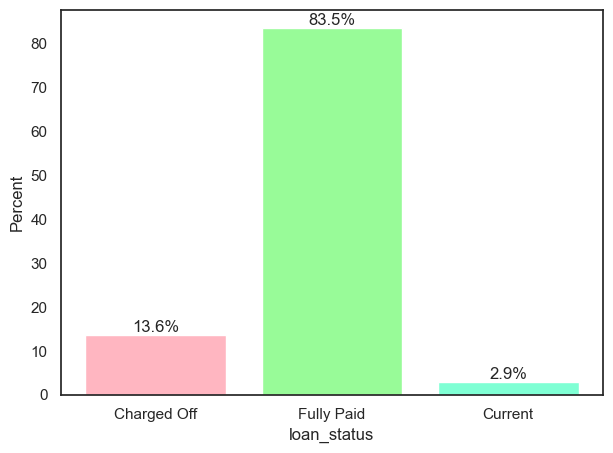

In [87]:
# Percentage(%) plot for 'loan_status'
histP1(df_loan, 'loan_status', ['lightpink','palegreen','aquamarine'])

>- ___13.6%___ of loans are _'Charged-Off'_
>- ___83.5%___ of loans are _'Fully-Paid'_

__Categorical__ Columns Analysis

In [88]:
# Columns with data type 'object'
df_loan.select_dtypes(include=['object']).nunique().sort_values()

verification_status        3
loan_status                3
home_ownership             4
grade                      7
purpose                   14
sub_grade                 35
addr_state                49
title                  17926
emp_title              28173
dtype: int64

---
Plots for __verification_status__

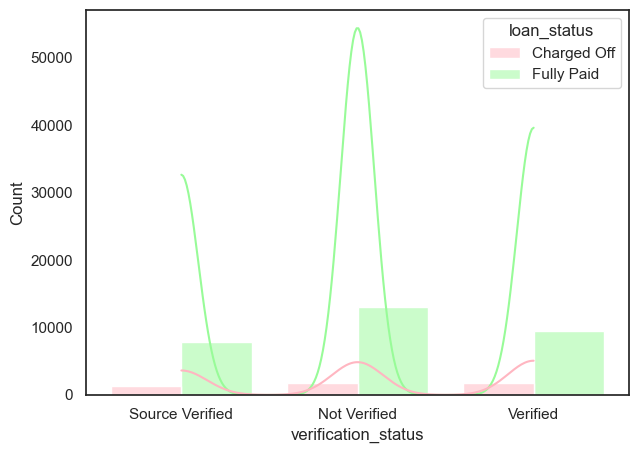

In [89]:
# Percentage(%) 'verification_status' plot against 'loan_status'
histPls('verification_status', False)

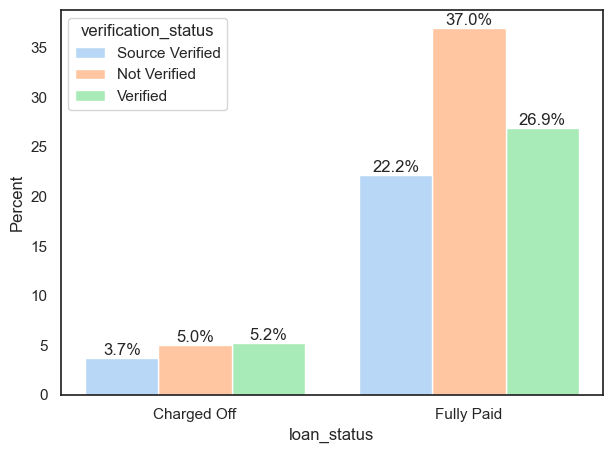

In [90]:
# Percentage(%) 'loan_status' plot against 'verification_status'
histP2ls('verification_status')

>- ___37.0%___ of __Not Verified__ loans against 'loan_status' are _Not-defaults_

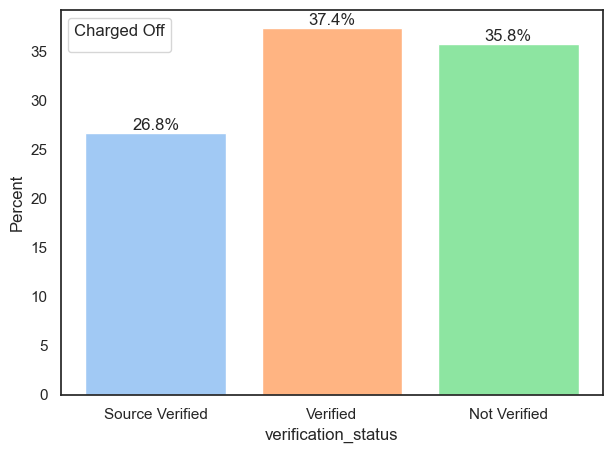

In [91]:
# Percentage(%) 'verification_status' plot against 'Charged Off'
histPlc('verification_status')

>- ___37.4%___ of __Verified__ loans against 'Charged Off' are _Defaults_

---
Plots for __home_ownership__

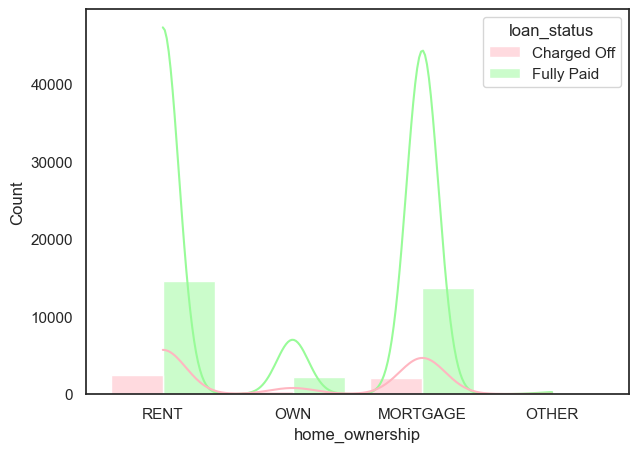

In [92]:
# Percentage(%) 'home_ownership' plot against 'loan_status'
histPls('home_ownership', False)

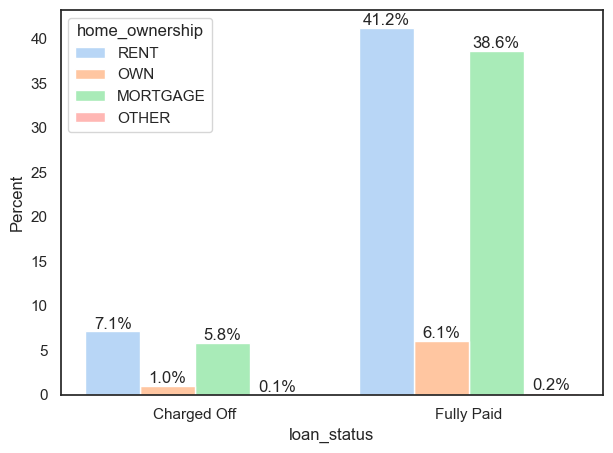

In [93]:
# Percentage(%) 'loan_status' plot against 'home_ownership'
histP2ls('home_ownership')

>- ___41.2%___ of __RENT__ loans against 'loan_status' are _Not-defaults_
>- ___38.6%___ of __MORTGAGE__ loans against 'loan_status' are _Not-defaults_

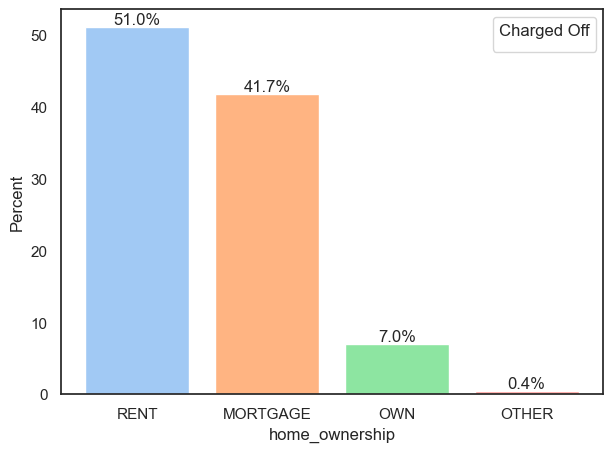

In [94]:
# Percentage(%) 'home_ownership' plot against 'Charged Off'
histPlc('home_ownership')

>- ___51.0%___ of __RENT__ loans aginst 'Charged Off' are _Defaults_
>- ___41.7%___ of __MORTGAGE__ loans aginst 'Charged Off' are _Defaults_

---
Plots for __grade__

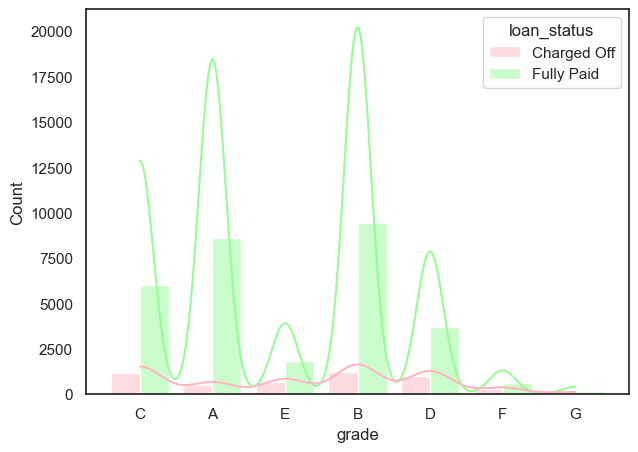

In [95]:
# Percentage(%) 'grade' plot against 'loan_status'
histPls('grade', False)

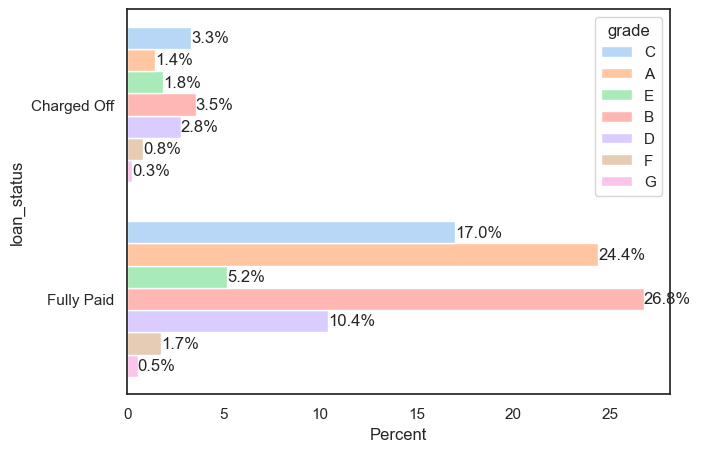

In [96]:
# Percentage(%) 'loan_status' plot against 'grade'
histP2lsY('grade')

>- ___26.8%___ of 'grade' __B__ loans against 'loan_status' are _Not-defaults_
>- ___24.4%___ of 'grade' __A__ loans against 'loan_status' are _Not-defaults_

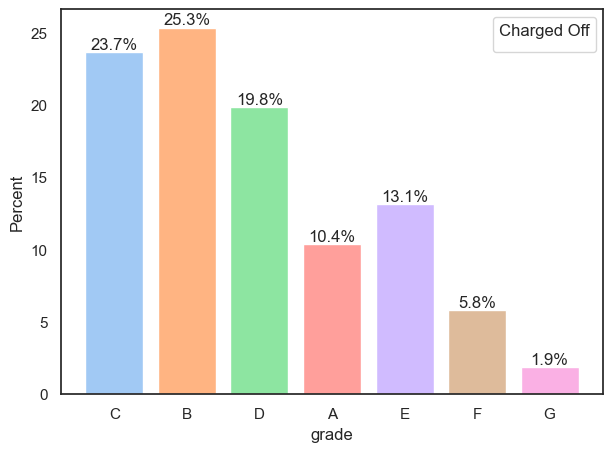

In [97]:
# Percentage(%) 'grade' plot against 'Charged Off'
histPlc('grade')

>- ___25.3%___ of 'grade' __B__ loans against 'Charged Off' are _Defaults_
>- ___23.7%___ of 'grade' __C__ loans against 'Charged Off' are _Defaults_
>- ___19.8%___ of 'grade' __D__ loans against 'Charged Off' are _Defaults_

---
Plots for __sub_grade__

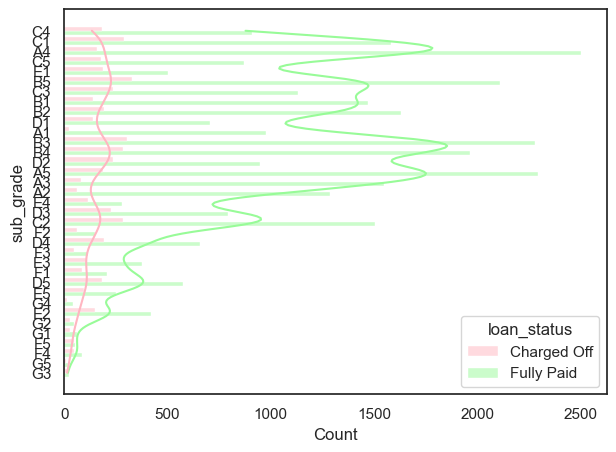

In [98]:
# Percentage(%) 'sub_grade' plot against 'loan_status'
histPlsY('sub_grade', False)

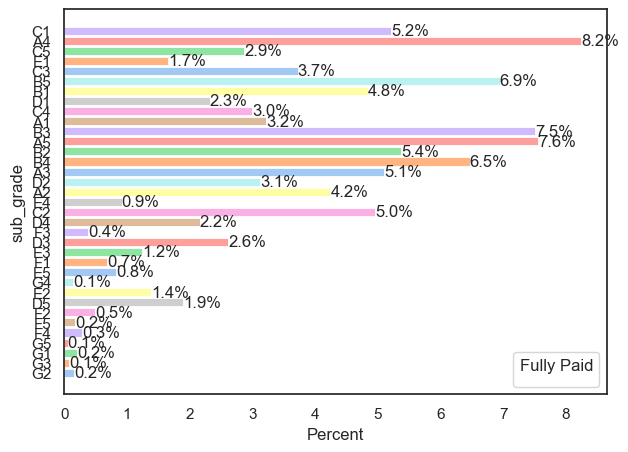

In [99]:
# Percentage(%) 'grade' plot against 'Fully Paid'
histPlfY('sub_grade')

>- ___8.2%___ of 'sub_grade' __A4__ loans against 'Fully Paid' are _Not-defaults_
>- ___7.6%___ of 'sub_grade' __A5__ loans against 'Fully Paid' are _Not-defaults_
>- ___7.5%___ of 'sub_grade' __B3__ loans against 'Fully Paid' are _Not-defaults_

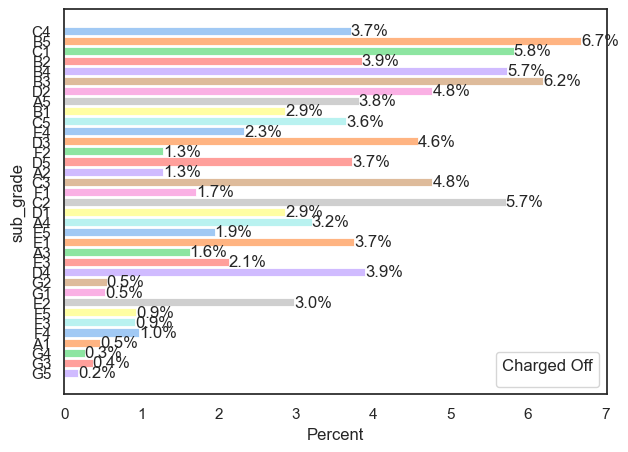

In [100]:
# Percentage(%) 'sub_grade' plot against 'Charged Off'
histPlcY('sub_grade')

>- ___6.7%___ of 'sub_grade' __B5__ loans against 'Charged Off' are _Defaults_
>- ___6.2%___ of 'sub_grade' __B3__ loans against 'Charged Off' are _Defaults_
>- ___5.8%___ of 'sub_grade' __C1__ loans against 'Charged Off' are _Defaults_
>- ___5.7%___ of 'sub_grade' __B4__ & __C2__ loans against 'Charged Off' are _Defaults_

---
Plots for __purpose__

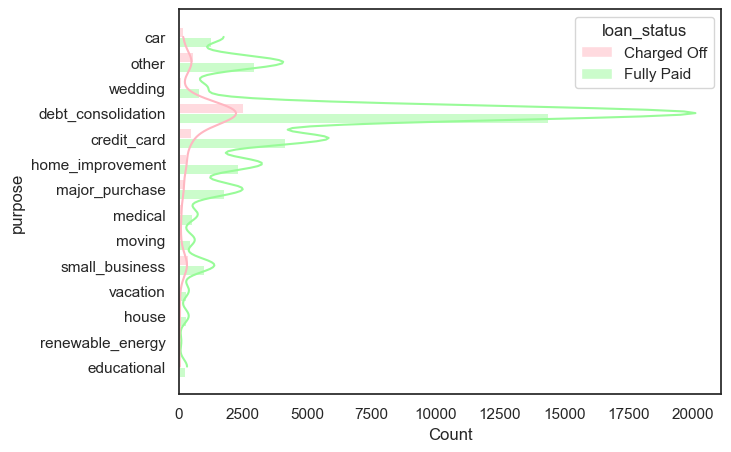

In [101]:
# Percentage(%) 'purpose' plot against 'loan_status'
histPlsY('purpose', False)

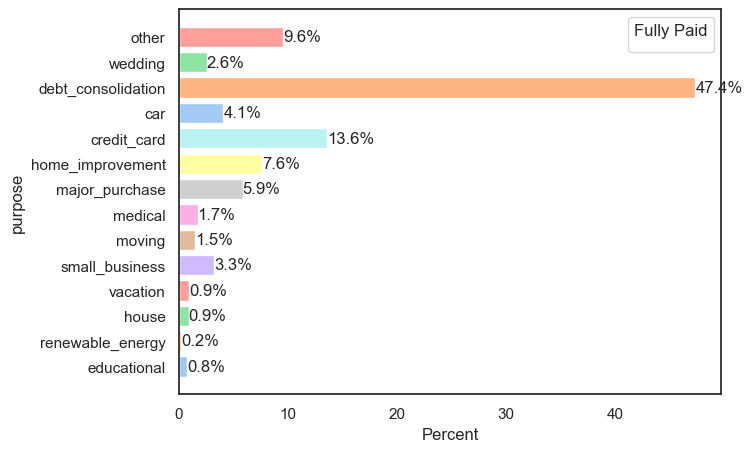

In [102]:
# Percentage(%) 'purpose' plot against 'Fully Paid'
histPlfY('purpose')

>- ___47.4%___ of __debt_consolidation__ loans against 'Fully Paid' are _Not-defaults_

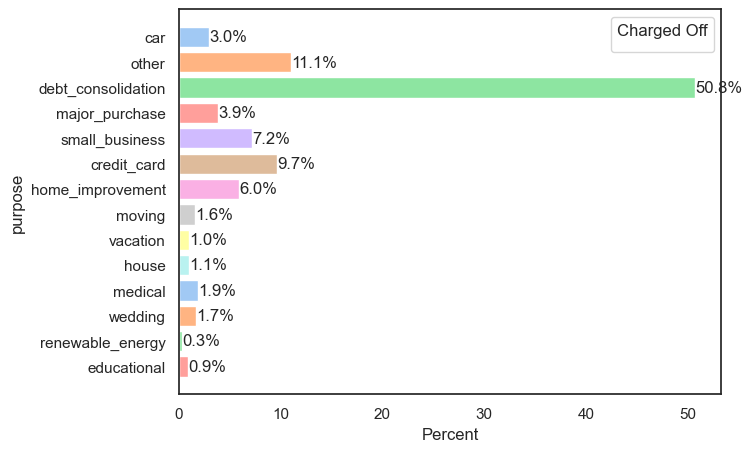

In [103]:
# Percentage(%) 'purpose' plot against 'Charged Off'
histPlcY('purpose')

>- ___50.8%___ of __debt_consolidation__ loans against 'Charged Off' are _Defaults_

_'addr_state'_, _'title'_, _'emp_title'_ Categorical Columns have no Scope to Plot them

__Numerical__ Columns Analysis

In [104]:
# Columns with data type 'int' & 'float'
df_loan.select_dtypes(include=['int','float']).nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
pub_rec                        5
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
open_acc                      38
total_acc                     79
int_rate                     334
loan_amnt                    863
funded_amnt                 1024
revol_util                  1081
total_rec_late_fee          1192
collection_recovery_fee     2381
dti                         2856
recoveries                  3579
annual_inc                  4920
total_rec_prncp             7243
funded_amnt_inv             7463
installment                14354
revol_bal                  20766
last_pymnt_amnt            32419
total_rec_int              32478
total_pymnt_inv            34473
total_pymnt                34752
dtype: int64

---
Plots for __term__

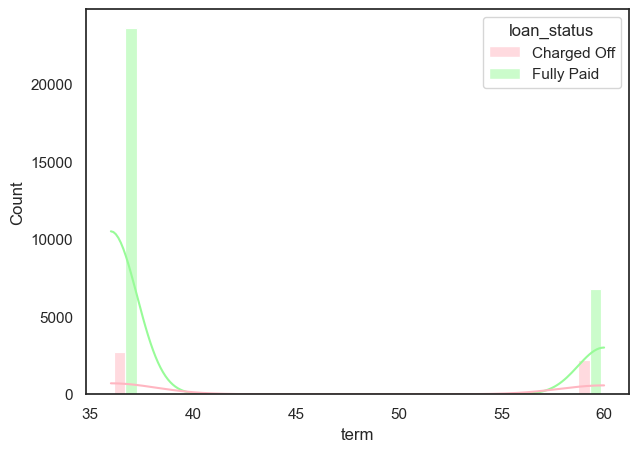

In [105]:
# Percentage(%) 'term' plot against 'loan_status'
histPls('term', False)

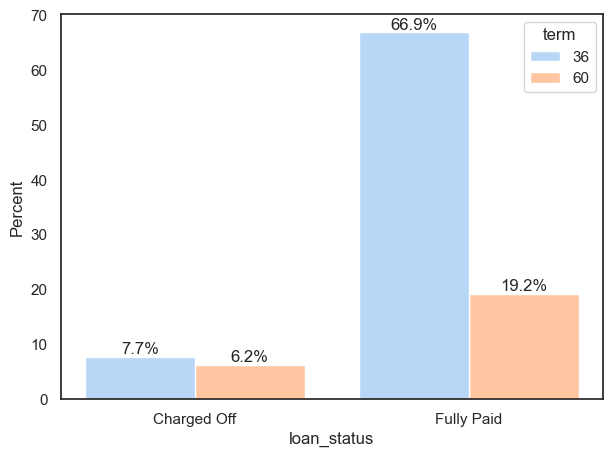

In [106]:
# Percentage(%) 'loan_status' plot against 'term'
histP2ls('term')

>- ___66.9%___ of SHORT 'term' __36__ _months_ loans against 'loan_status' are _Not-defaults_
>- ___19.2%___ of LONG 'term' __60__ _months_ loans against 'loan_status' are _Not-defaults_

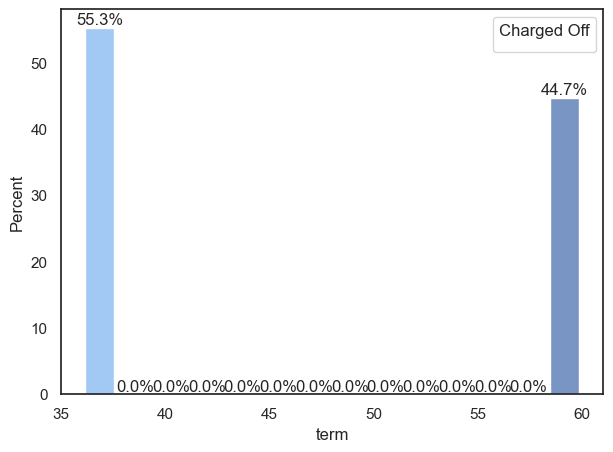

In [107]:
# Percentage(%) 'term' plot against 'Charged Off'
histPlc('term')

>- ___55.3%___ of SHORT 'term' __36__ _months_ loans against 'Charged Off' are _Defaults_
>- ___44.7%___ of LONG 'term' __60__ _months_ loans against 'Charged Off' are _Defaults_

---
Plots for __pub_rec_bankruptcies__

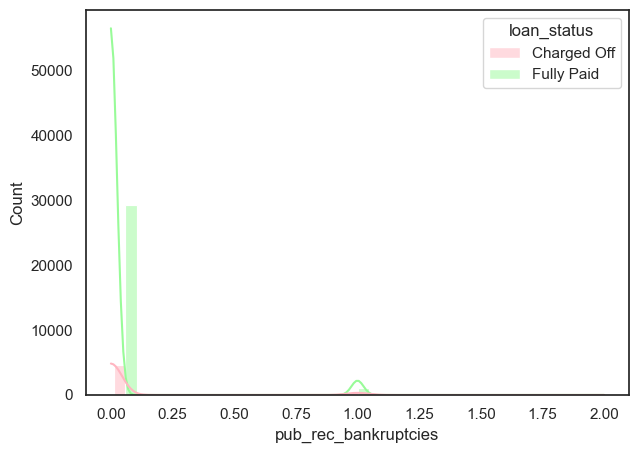

In [108]:
# Percentage(%) 'pub_rec_bankruptcies' plot against 'loan_status'
histPls('pub_rec_bankruptcies', False)

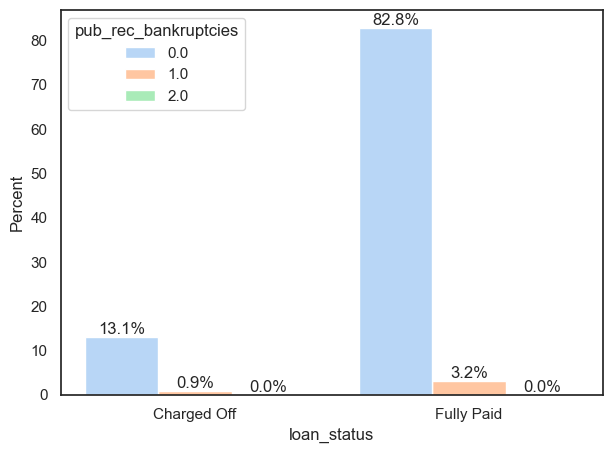

In [109]:
# Percentage(%) 'loan_status' plot against 'pub_rec_bankruptcies'
histP2ls('pub_rec_bankruptcies')

>- ___82.8%___ of 'pub_rec_bankruptcies' __0__ loans against 'loan_status' are _Not-defaults_
>- ___13.1%___ of 'pub_rec_bankruptcies' __0__ loans against 'loan_status' are _Defaults_
>- ___3.2%___ of 'pub_rec_bankruptcies' __1__ loans against 'loan_status' are _Not-defaults_

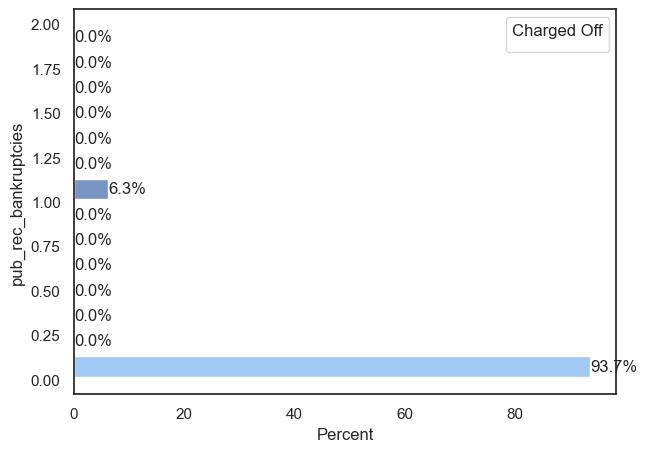

In [110]:
# Percentage(%) 'pub_rec_bankruptcies' plot against 'Charged Off'
histPlcY('pub_rec_bankruptcies')

>- ___93.7%___ of 'pub_rec_bankruptcies' __0__ loans against 'Charged Off' are _Defaults_
>- ___6.3%___ of 'pub_rec_bankruptcies' __1__ loans against 'Charged Off' are _Defaults_

---
Plots for __pub_rec__

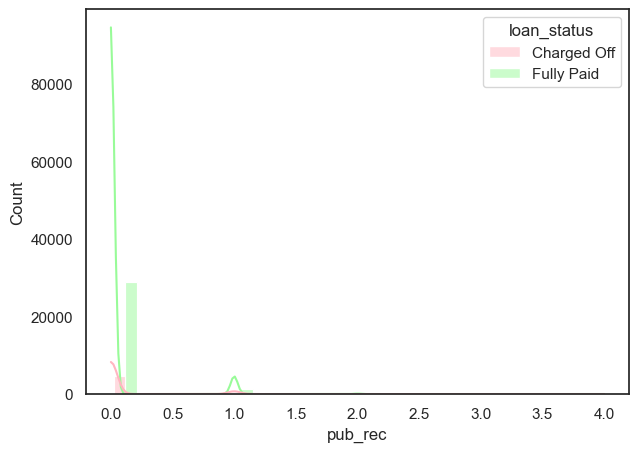

In [111]:
# Percentage(%) 'pub_rec' plot against 'loan_status'
histPls('pub_rec', False)

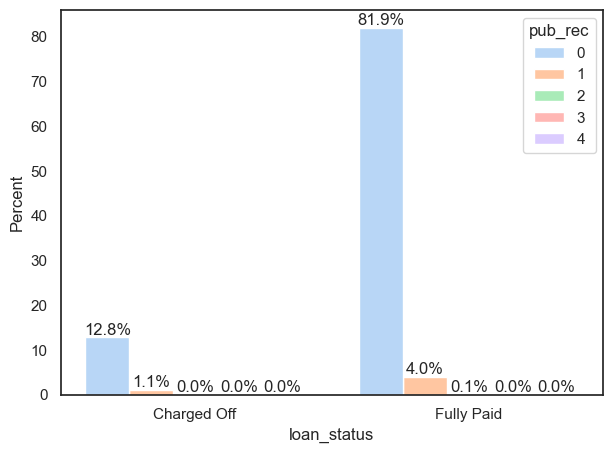

In [112]:
# Percentage(%) 'loan_status' plot against 'pub_rec'
histP2ls('pub_rec')

>- ___81.9%___ of 'pub_rec' __0__ loans against 'loan_status' are _Not-defaults_
>- ___12.8%___ of 'pub_rec' __0__ loans against 'loan_status' are _Defaults_
>- ___4.0%___ of 'pub_rec' __1__ loans against 'loan_status' are _Not-defaults_

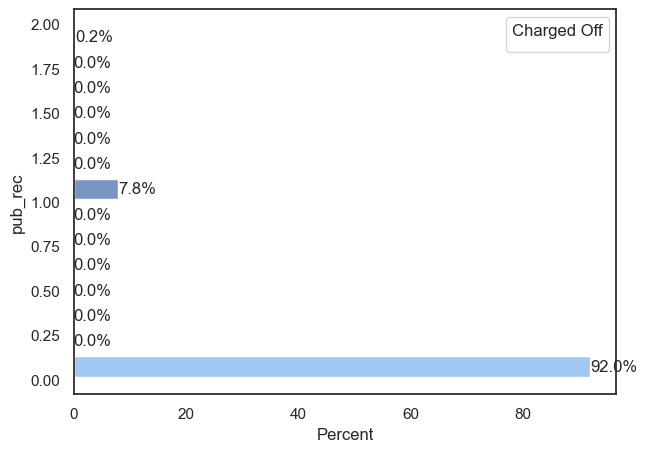

In [113]:
# Percentage(%) 'pub_rec' plot against 'Charged Off'
histPlcY('pub_rec')

>- ___92.0%___ of 'pub_rec' __0__ loans against 'Charged Off' are _Defaults_
>- ___7.8%___ of 'pub_rec' __1__ loans against 'Charged Off' are _Defaults_

---
Plots for __inq_last_6mths__

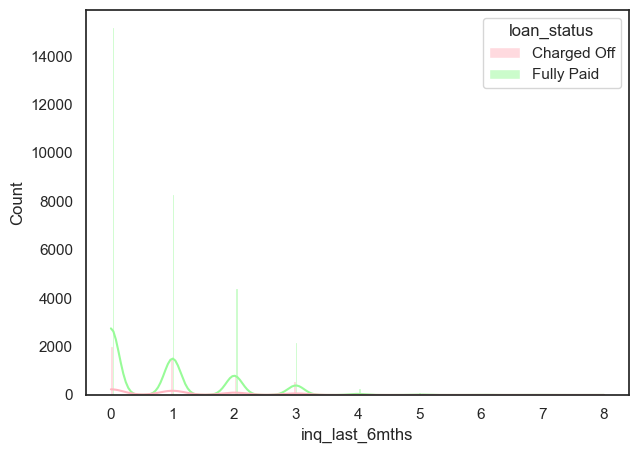

In [114]:
# Percentage(%) 'inq_last_6mths' plot against 'loan_status'
histPls('inq_last_6mths', False)

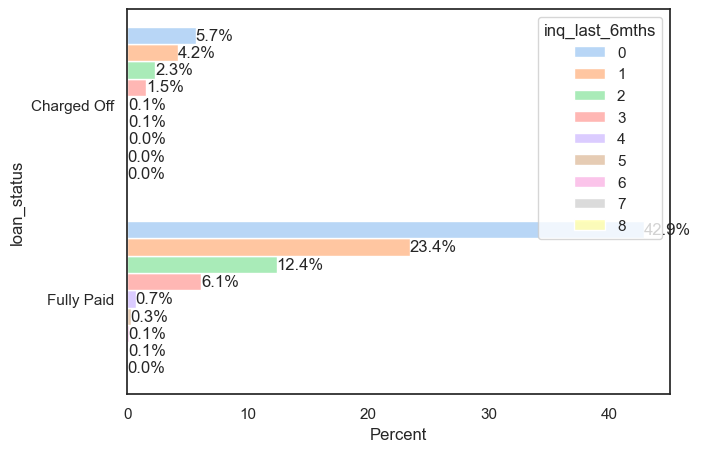

In [115]:
# Percentage(%) 'loan_status' plot against 'inq_last_6mths'
histP2lsY('inq_last_6mths')

>- ___42.9%___ of 'inq_last_6mths' __0__ loans against 'loan_status' are _Not-defaults_
>- ___23.4%___ of 'inq_last_6mths' __1__ loans against 'loan_status' are _Not-defaults_
>- ___12.4%___ of 'inq_last_6mths' __2__ loans against 'loan_status' are _Not-defaults_

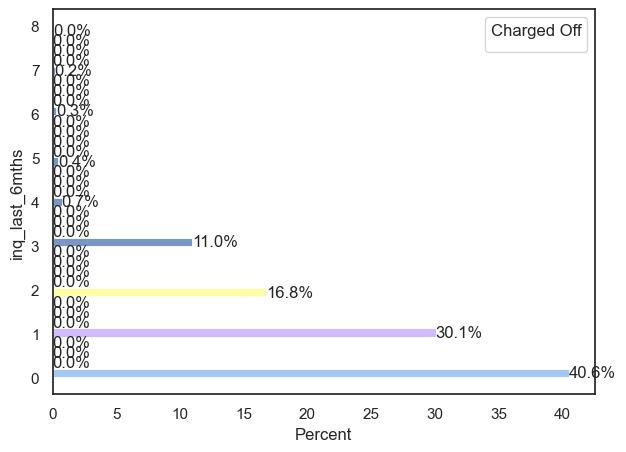

In [116]:
# Percentage(%) 'inq_last_6mths' plot against 'Charged Off'
histPlcY('inq_last_6mths')

>- ___40.6%___ of 'inq_last_6mths' __0__ loans against 'Charged Off' are _Defaults_
>- ___30.1%___ of 'inq_last_6mths' __1__ loans against 'Charged Off' are _Defaults_
>- ___16.8%___ of 'inq_last_6mths' __2__ loans against 'Charged Off' are _Defaults_
>- ___11.0%___ of 'inq_last_6mths' __3__ loans against 'Charged Off' are _Defaults_

---
Plots for __emp_length__

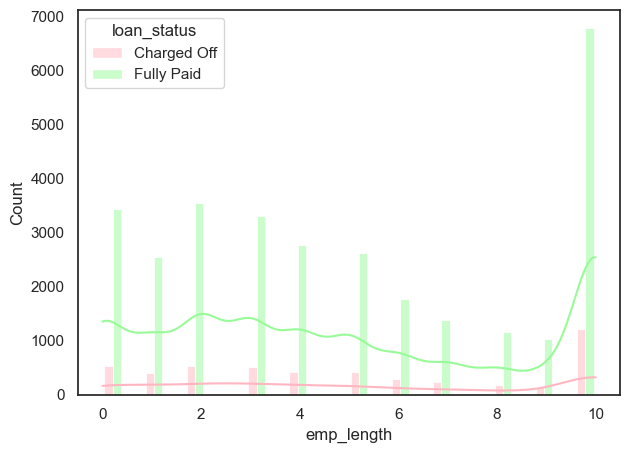

In [117]:
# Percentage(%) 'emp_length' plot against 'loan_status'
histPls('emp_length', False)

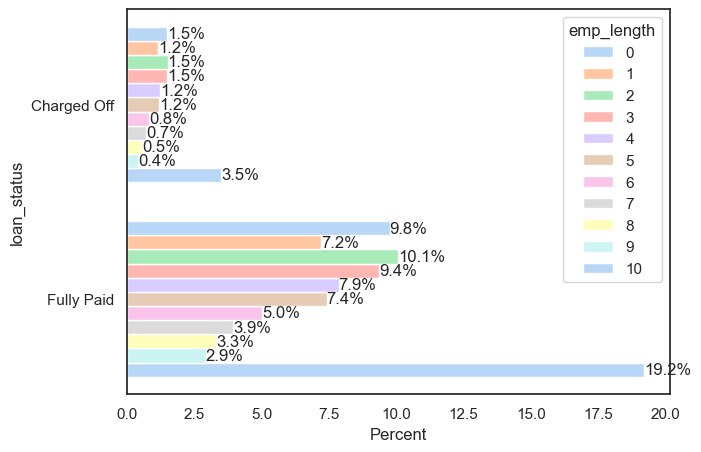

In [118]:
# Percentage(%) 'loan_status' plot against 'emp_length'
histP2lsY('emp_length')

>- ___19.2%___ of 'emp_length' __10__ years loans against 'loan_status' are _Not-defaults_

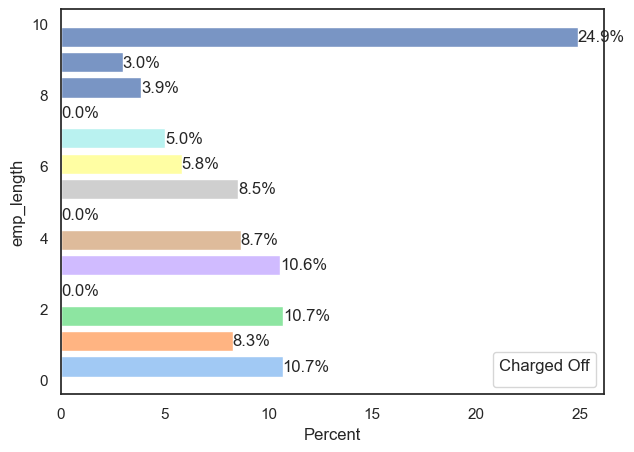

In [119]:
# Percentage(%) 'emp_length' plot against 'Charged Off'
histPlcY('emp_length')

>- ___24.9%___ of 'emp_length' __10__ loans years against 'Charged Off' are _Defaults_

---
Plots for __delinq_2yrs__

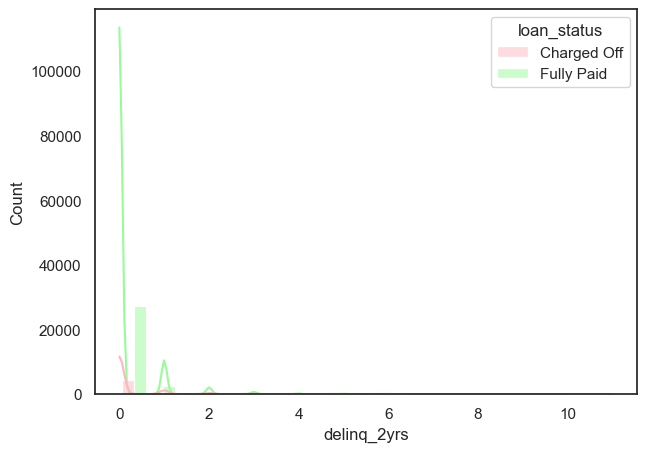

In [120]:
# Percentage(%) 'delinq_2yrs' plot against 'loan_status'
histPls('delinq_2yrs', False)

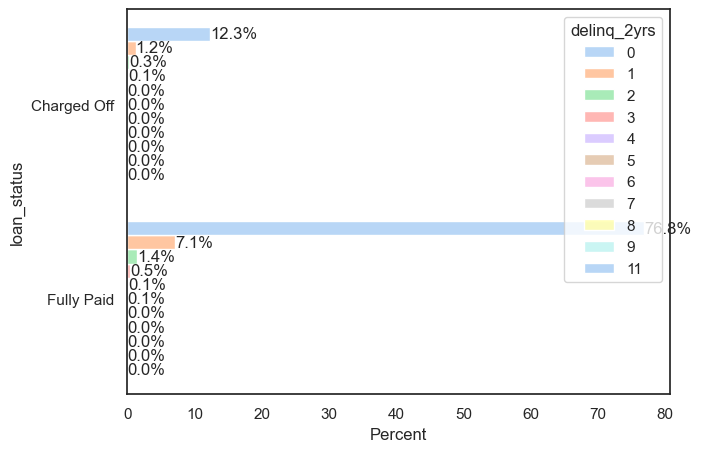

In [121]:
# Percentage(%) 'loan_status' plot against 'delinq_2yrs'
histP2lsY('delinq_2yrs')

>- ___76.8%___ of 'delinq_2yrs' __0__ loans against 'loan_status' are _Not-defaults_

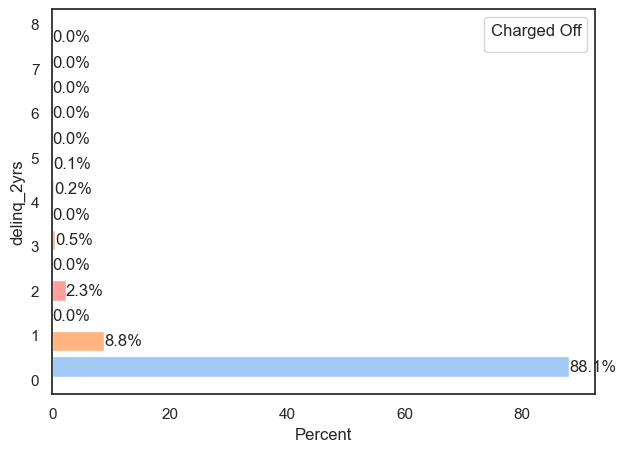

In [122]:
# Percentage(%) 'delinq_2yrs' plot against 'Charged Off'
histPlcY('delinq_2yrs')

>- ___88.1%___ of 'delinq_2yrs' __0__ loans against 'Charged Off' are _Defaults_

---
Plots for __open_acc__

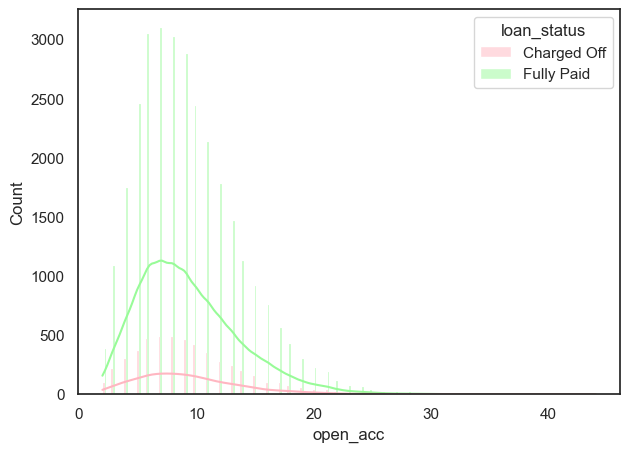

In [123]:
# Percentage(%) 'open_acc' plot against 'loan_status'
histPls('open_acc', False)

<Axes: ylabel='open_acc'>

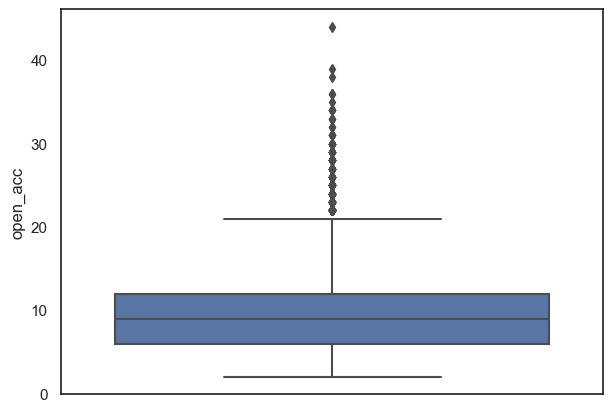

In [124]:
# Boxplot for 'open_acc'
sb.boxplot(data=df_lnC, y='open_acc')

<Axes: ylabel='open_acc'>

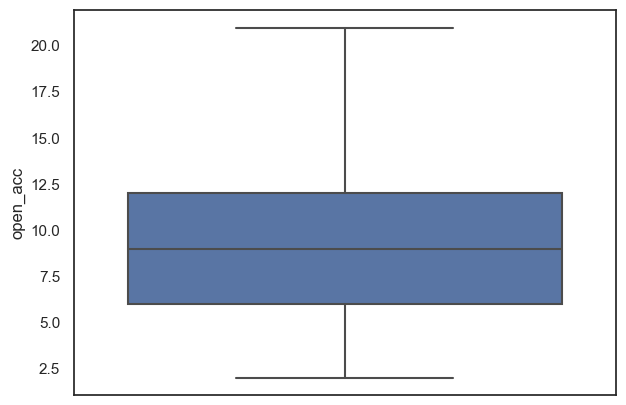

In [125]:
# Removing Outliers from 'open_acc'
df_lnC = Rm_Outlier(df_lnC, 'open_acc')
sb.boxplot(data=df_lnC, y='open_acc')

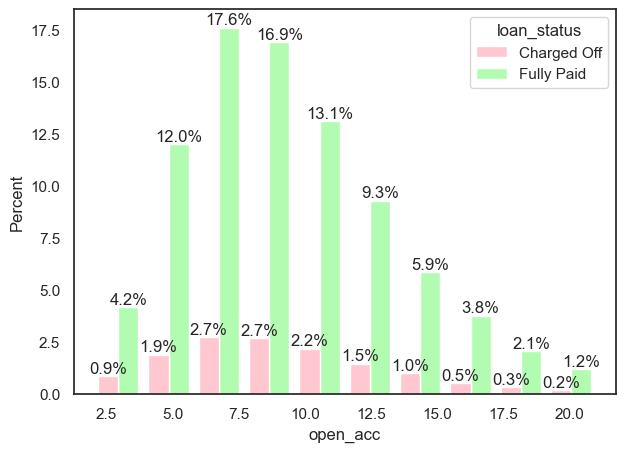

In [126]:
# Percentage(%) 'open_acc' plot against 'loan_status'
histPbX(df_lnC, 'open_acc', 10, False)

>- ___>10%___ of 'open_acc' are between __5-12.5__ loans against 'loan_status' are _Not-defaults_

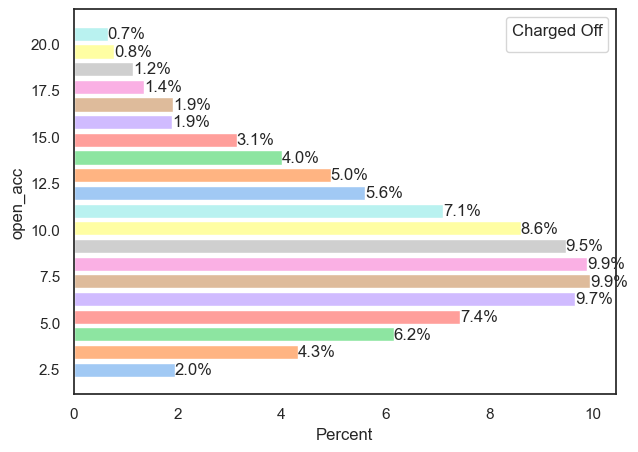

In [127]:
# Percentage(%) 'open_acc' plot against 'Charged Off'
histPbcY(df_lnC, 'open_acc', 20)

>- ___>7%___ of 'open_acc' are between __5-11__ loans against 'Charged Off' are _Defaults_

---
Plots for __total_acc__

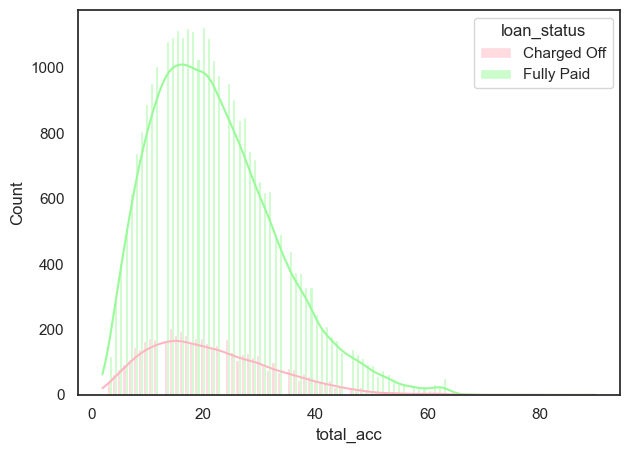

In [128]:
# Percentage(%) 'total_acc' plot against 'loan_status'
histPls('total_acc', False)

<Axes: ylabel='total_acc'>

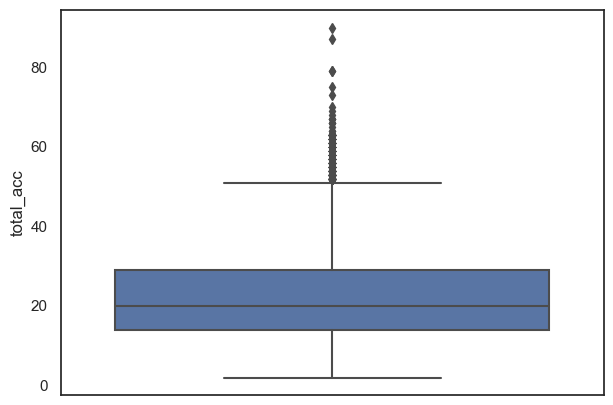

In [129]:
# Boxplot for 'total_acc'
sb.boxplot(data=df_lnC, y='total_acc')

<Axes: ylabel='total_acc'>

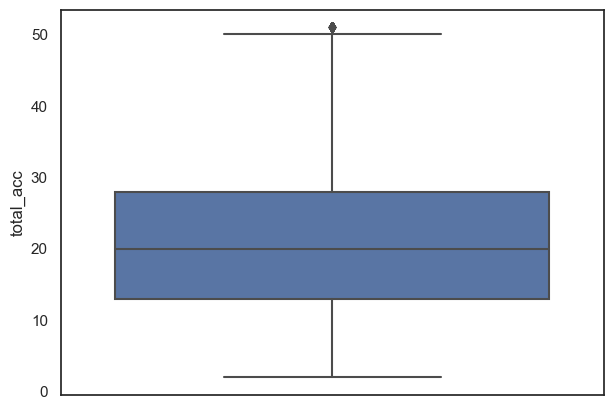

In [130]:
# Removing Outliers from 'total_acc'
df_lnC = Rm_Outlier(df_lnC, 'total_acc')
sb.boxplot(data=df_lnC, y='total_acc')

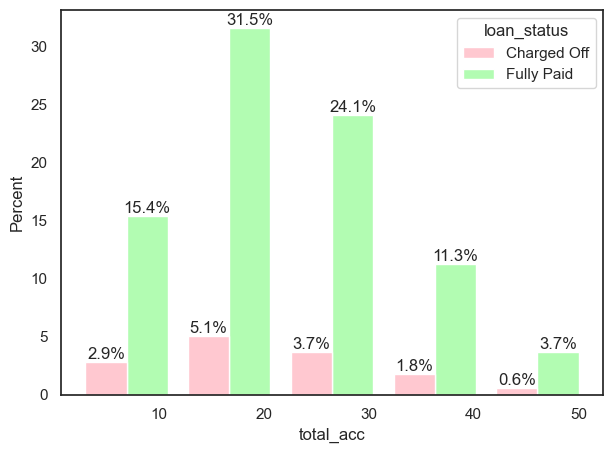

In [131]:
# Percentage(%) 'total_acc' plot against 'loan_status'
histPbX(df_lnC,'total_acc', 5, False)

>- ___31.5%___ of 'total_acc' __20__ loans against 'loan_status' are _Not-defaults_
>- ___24.1%___ of 'total_acc' __30__ loans against 'loan_status' are _Not-defaults_

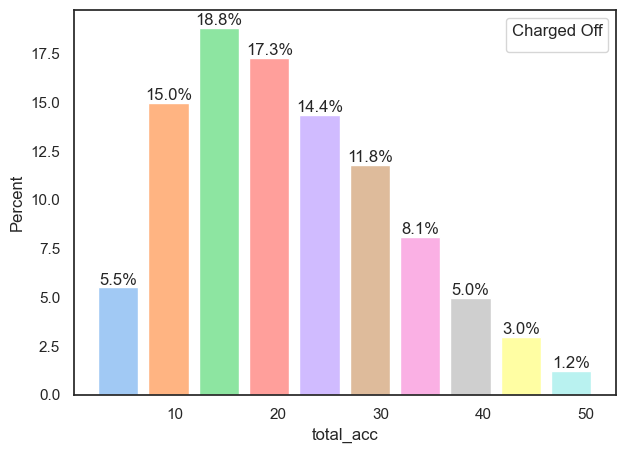

In [132]:
# Percentage(%) 'total_acc' plot against 'Charged Off'
histPbcX(df_lnC, 'total_acc', 10)

>- ___>12%___ of 'total_acc' are between __10-30__ loans against 'Charged Off' are _Defaults_

---
Plots for __int_rate__

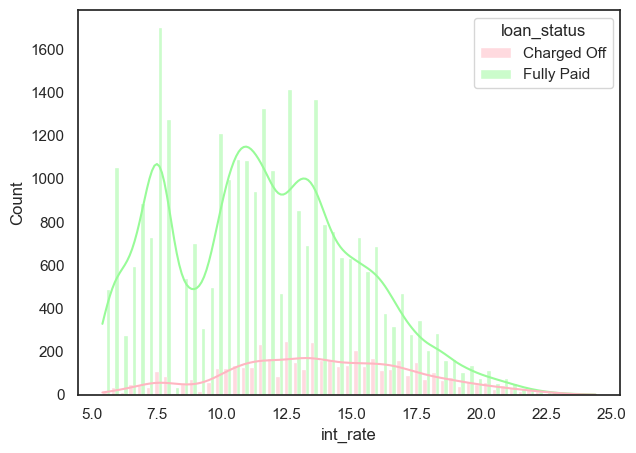

In [133]:
# Percentage(%) 'int_rate' plot against 'loan_status'
histPls('int_rate', False)

<Axes: ylabel='int_rate'>

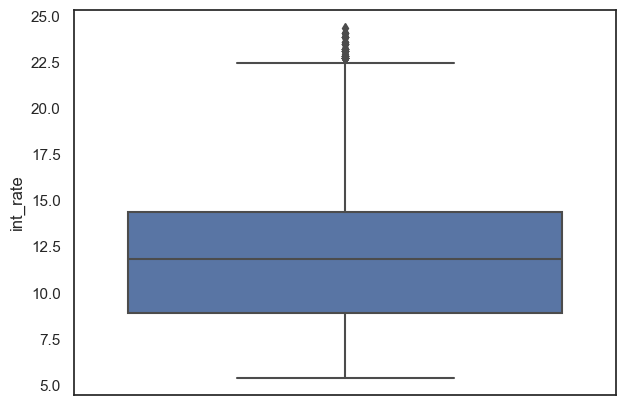

In [134]:
# Boxplot for 'int_rate'
sb.boxplot(data=df_lnC, y='int_rate')

<Axes: ylabel='int_rate'>

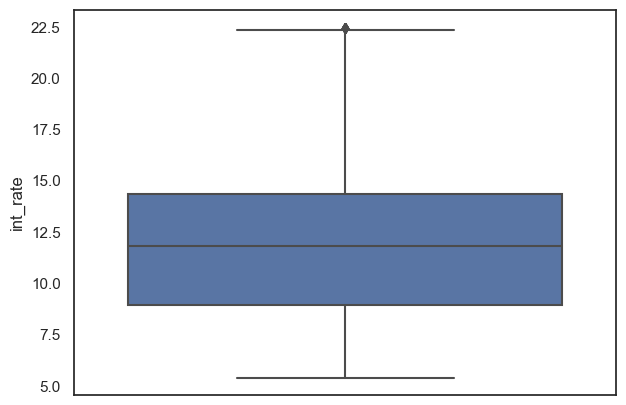

In [135]:
# Removing Outliers from 'int_rate'
df_lnC = Rm_Outlier(df_lnC, 'int_rate')
sb.boxplot(data=df_lnC, y='int_rate')

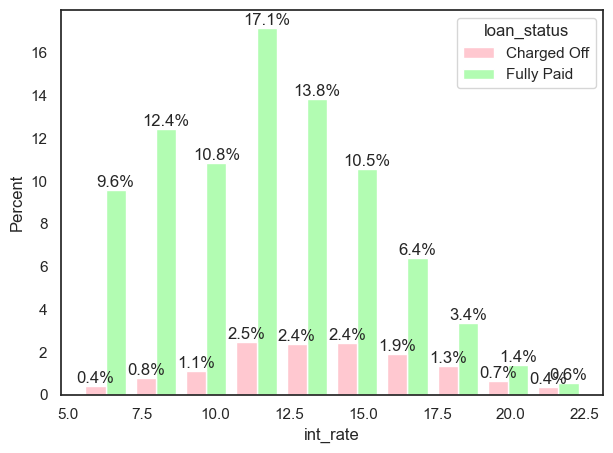

In [136]:
# Percentage(%) 'int_rate' plot against 'loan_status'
histPbX(df_lnC, 'int_rate', 10, False)

>- ___17.1%___ of 'int_rate' __12__ loans against 'loan_status' are _Not-defaults_
>- ___13.8%___ of 'int_rate' __13__ loans against 'loan_status' are _Not-defaults_
>- ___12.4%___ of 'int_rate' __7__ loans against 'loan_status' are _Not-defaults_

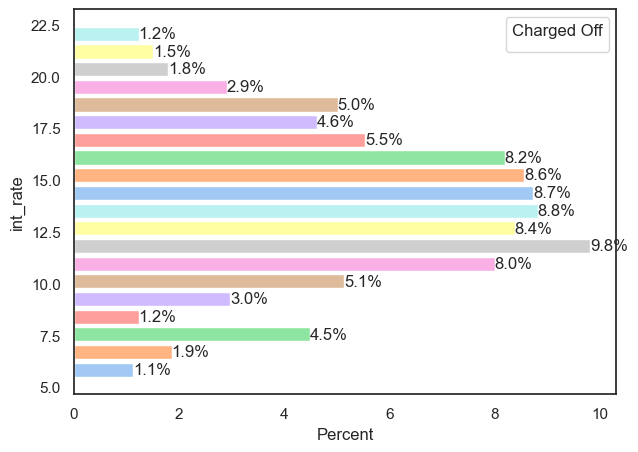

In [137]:
# Percentage(%) 'int_rate' plot against 'Charged Off'
histPbcY(df_lnC, 'int_rate', 20)

>- ___>8%___ of 'int_rate' are between __11-16__ loans against 'Charged Off' are _Defaults_

---
Plots for __loan_amnt__

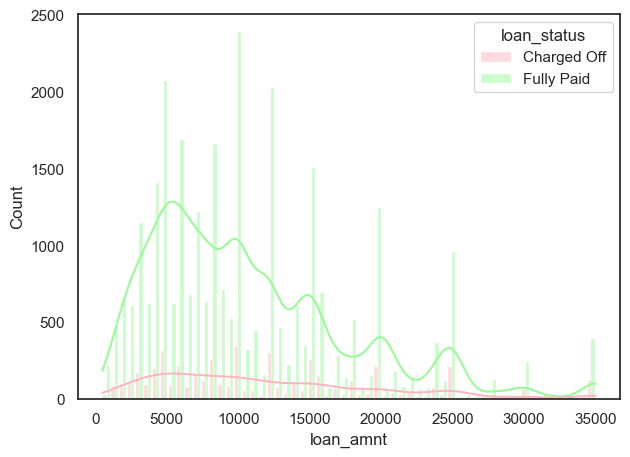

In [138]:
# Percentage(%) 'loan_amnt' plot against 'loan_status'
histPls('loan_amnt', False)

<Axes: ylabel='loan_amnt'>

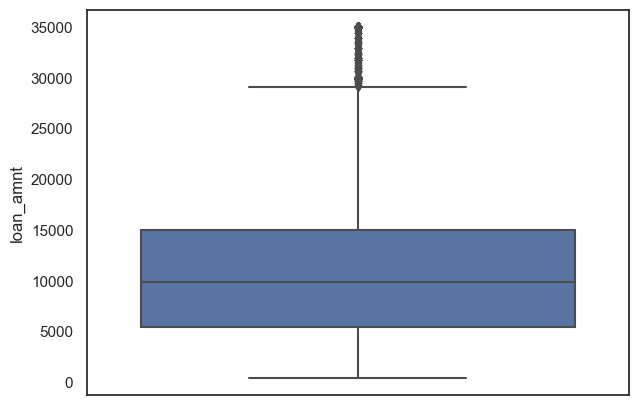

In [139]:
# Boxplot for 'loan_amnt'
sb.boxplot(data=df_lnC, y='loan_amnt')

<Axes: ylabel='loan_amnt'>

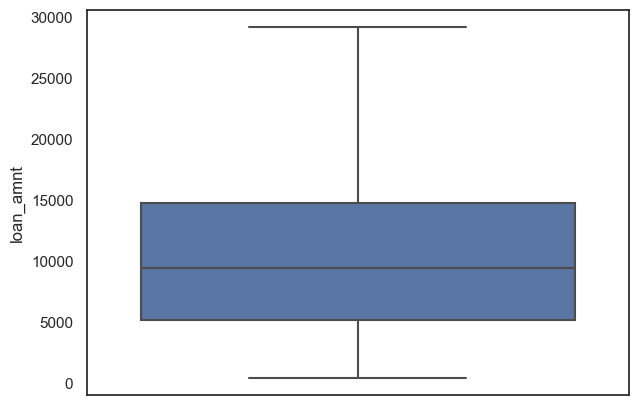

In [140]:
# Removing Outliers from 'loan_amnt'
df_lnC = Rm_Outlier(df_lnC, 'loan_amnt')
sb.boxplot(data=df_lnC, y='loan_amnt')

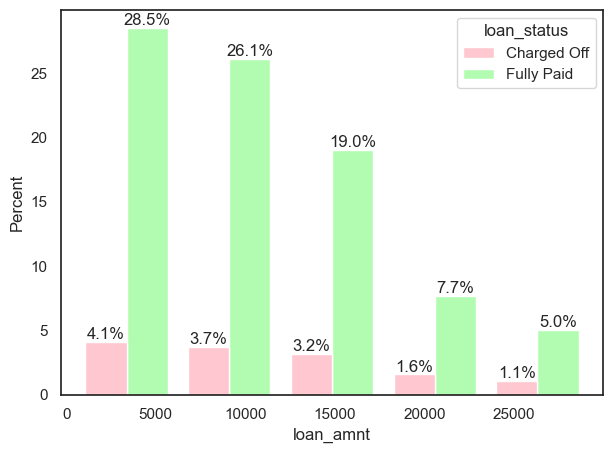

In [141]:
# Percentage(%) 'loan_amnt' plot against 'loan_status'
histPbX(df_lnC, 'loan_amnt', 5, False)

>- ___28.5%___ of 'loan_amnt' __5k__ loans against 'loan_status' are _Not-defaults_
>- ___26.1%___ of 'loan_amnt' __10k__ loans against 'loan_status' are _Not-defaults_
>- ___19.0%___ of 'loan_amnt' __15k__ loans against 'loan_status' are _Not-defaults_

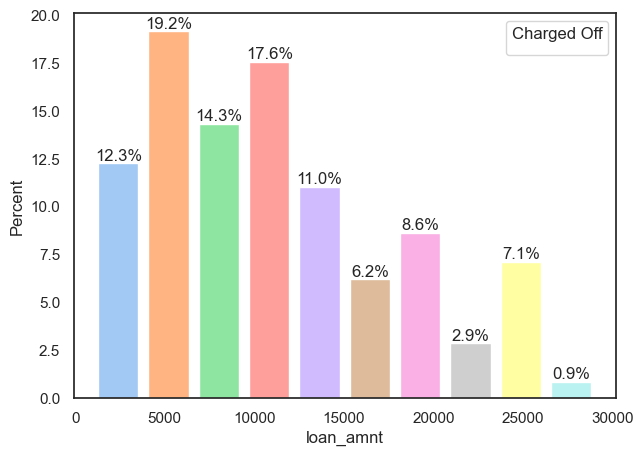

In [142]:
# Percentage(%) 'loan_amnt' plot against 'Charged Off'
histPbcX(df_lnC, 'loan_amnt', 10)

>- ___19.2%___ of 'loan_amnt' __5k__ loans against 'Charged Off' are _Defaults_
>- ___17.6%___ of 'loan_amnt' __10k__ loans against 'Charged Off' are _Defaults_

---
Plots for __funded_amnt__

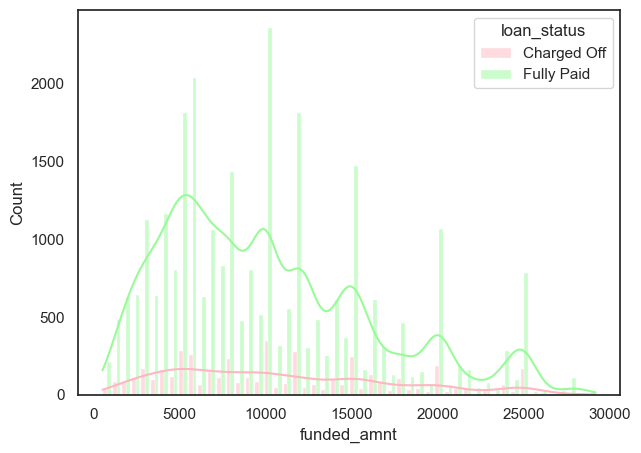

In [143]:
# Percentage(%) 'funded_amnt' plot against 'loan_status'
histPls('funded_amnt', False)

<Axes: ylabel='funded_amnt'>

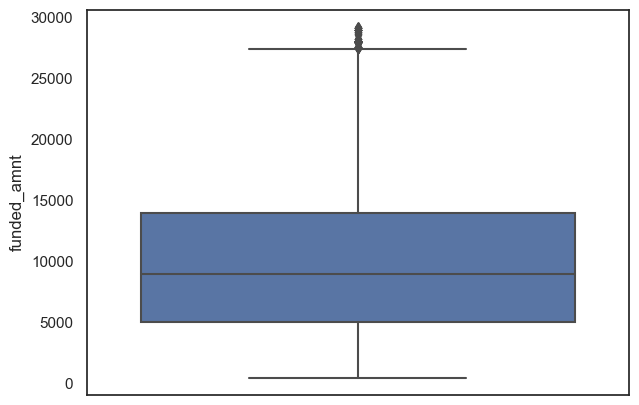

In [144]:
# Boxplot for 'funded_amnt'
sb.boxplot(data=df_lnC, y='funded_amnt')

<Axes: ylabel='funded_amnt'>

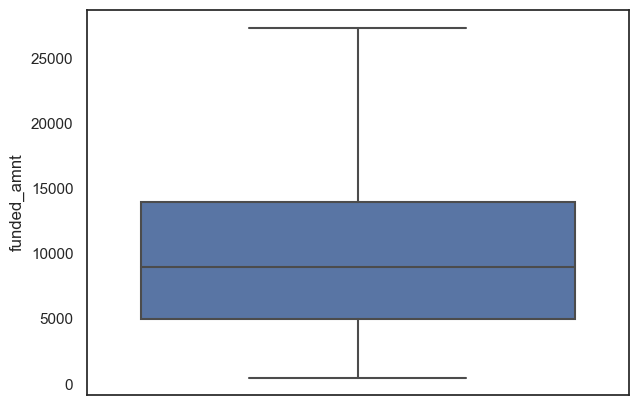

In [145]:
# Removing Outliers from 'funded_amnt'
df_lnC = Rm_Outlier(df_lnC, 'funded_amnt')
sb.boxplot(data=df_lnC, y='funded_amnt')

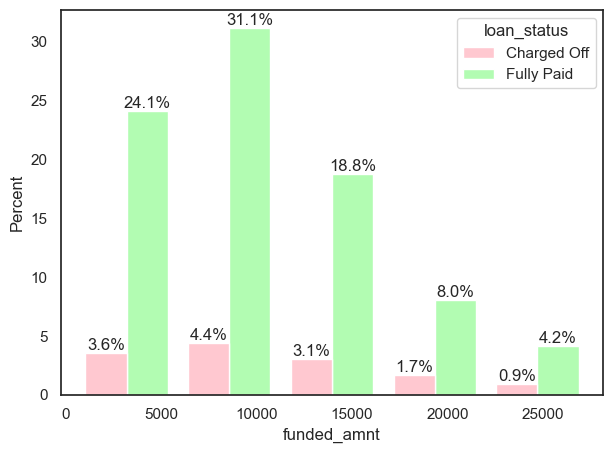

In [146]:
# Percentage(%) 'funded_amnt' plot against 'loan_status'
histPbX(df_lnC, 'funded_amnt', 5, False)

>- ___31.1%___ of 'funded_amnt' __5k__ loans against 'loan_status' are _Not-defaults_
>- ___24.1%___ of 'funded_amnt' __10k__ loans against 'loan_status' are _Not-defaults_
>- ___18.8%___ of 'funded_amnt' __15k__ loans against 'loan_status' are _Not-defaults_

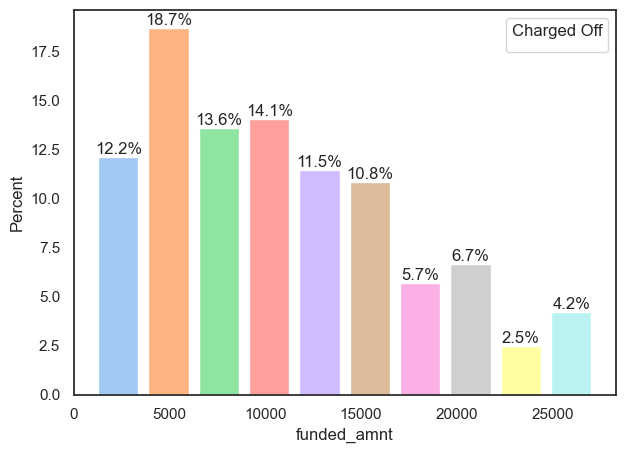

In [147]:
# Percentage(%) 'funded_amnt' plot against 'Charged Off'
histPbcX(df_lnC, 'funded_amnt', 10)

>- ___18.7%___ of 'funded_amnt' __5k__ loans against 'Charged Off' are _Defaults_

---
Plots for __revol_util__

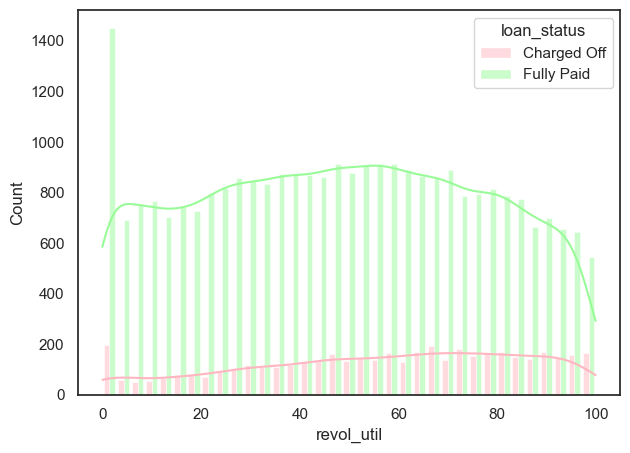

In [148]:
# Percentage(%) 'revol_util' plot against 'loan_status'
histPls('revol_util', False)

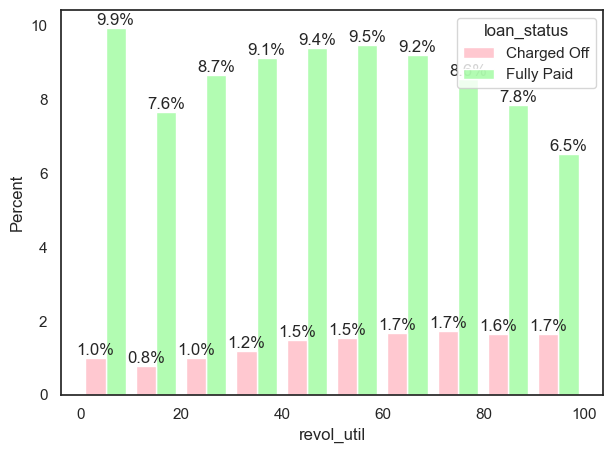

In [149]:
# Percentage(%) 'revol_util' plot against 'loan_status'
histPbX(df_lnC, 'revol_util', 10, False)

>- ___9.9%___ of 'revol_util' is __5__ loans against 'loan_status' are _Not-defaults_

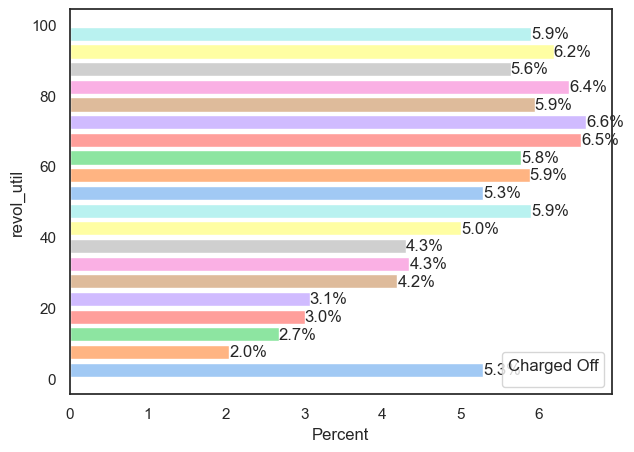

In [150]:
# Percentage(%) 'revol_util' plot against 'Charged Off'
histPbcY(df_lnC, 'revol_util', 20)

>- ___>5%___ of 'revol_util' is __>40__ loans against 'Charged Off' are _Defaults_

---
Plots for __total_rec_late_fee__

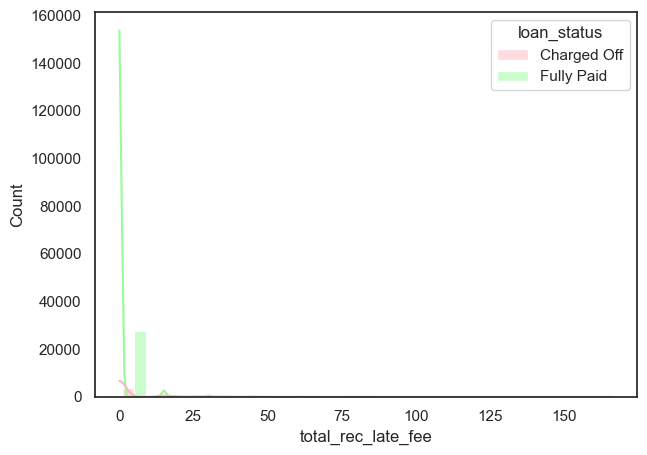

In [151]:
# Percentage(%) 'total_rec_late_fee' plot against 'loan_status'
histPls('total_rec_late_fee', False)

<Axes: ylabel='total_rec_late_fee'>

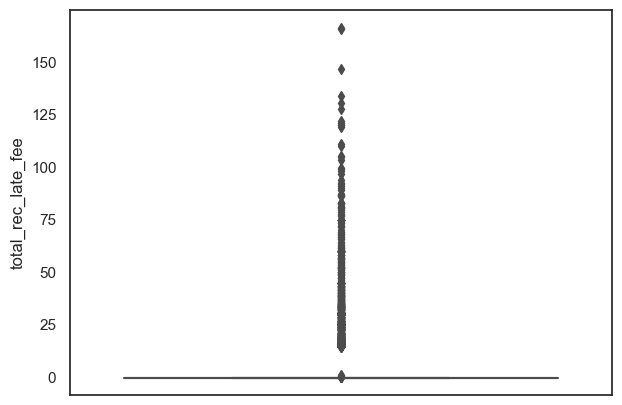

In [152]:
# Boxplot for 'total_rec_late_fee'
sb.boxplot(data=df_lnC, y='total_rec_late_fee')

<Axes: ylabel='total_rec_late_fee'>

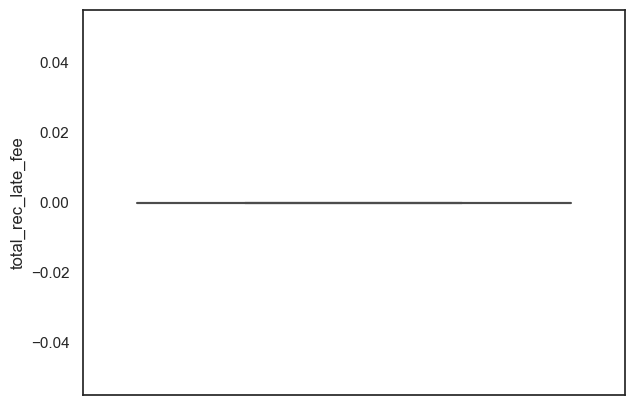

In [153]:
# Removing Outliers from 'total_rec_late_fee'
df_lnC = Rm_Outlier(df_lnC, 'total_rec_late_fee')
sb.boxplot(data=df_lnC, y='total_rec_late_fee')

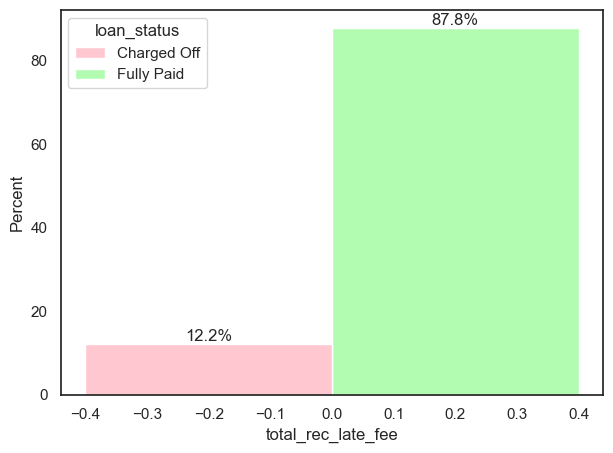

In [154]:
# Percentage(%) 'total_rec_late_fee' plot against 'loan_status'
histPbX(df_lnC, 'total_rec_late_fee', 1, False)

>- ___87.8%___ of 'total_rec_late_fee' are between __0.0__ to __0.4__ loans against 'loan_status' are _Not-defaults_
>- ___12.2%___ of 'total_rec_late_fee' are between __0.0__ to __-0.4__ loans against 'loan_status' are _Defaults_

---
Plots for __collection_recovery_fee__

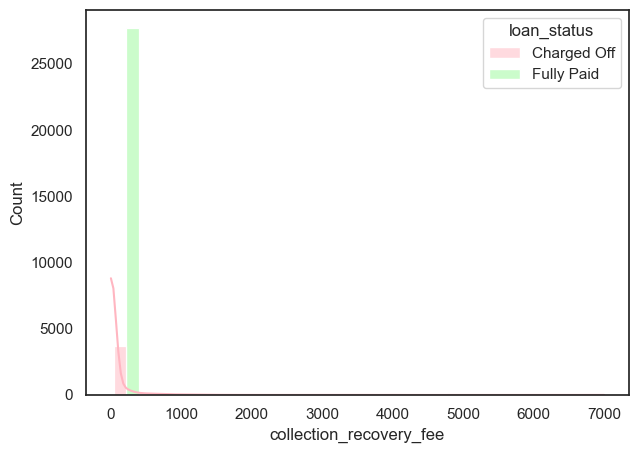

In [155]:
# Percentage(%) 'collection_recovery_fee' plot against 'loan_status'
histPls('collection_recovery_fee', False)

<Axes: ylabel='collection_recovery_fee'>

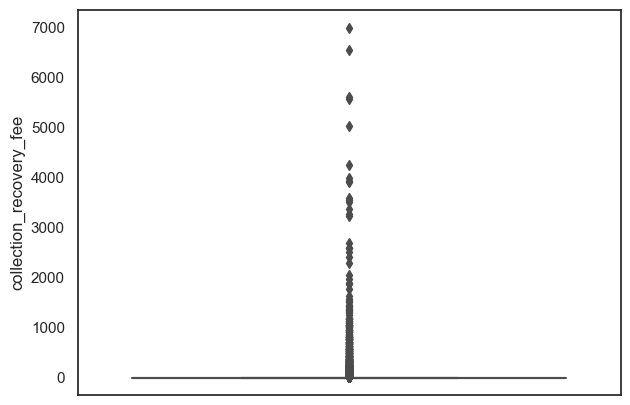

In [156]:
# Boxplot for 'collection_recovery_fee'
sb.boxplot(data=df_lnC, y='collection_recovery_fee')

<Axes: ylabel='collection_recovery_fee'>

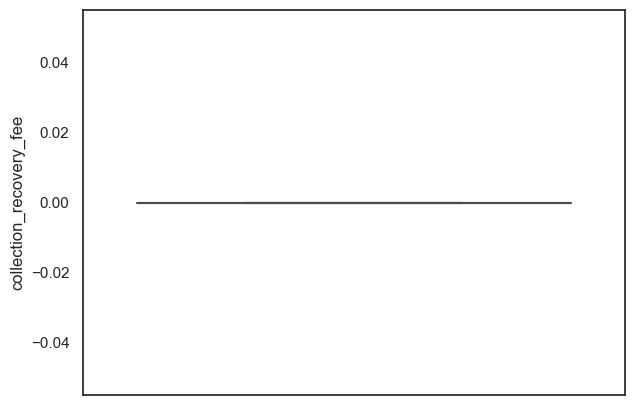

In [157]:
# Removing Outliers from 'collection_recovery_fee'
df_lnC = Rm_Outlier(df_lnC, 'collection_recovery_fee')
sb.boxplot(data=df_lnC, y='collection_recovery_fee')

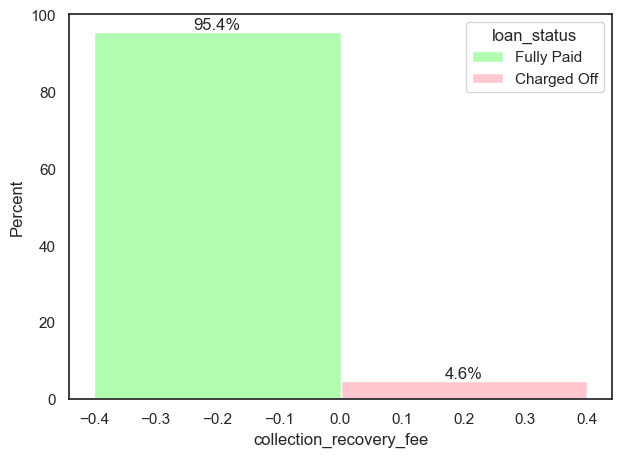

In [158]:
# Percentage(%) 'collection_recovery_fee' plot against 'loan_status'
histPbX(df_lnC, 'collection_recovery_fee', 1, True)

>- ___4.6%___ of 'collection_recovery_fee' are between __0.0__ to __0.4__ loans against 'loan_status' are _Defaults_
>- ___95.4%___ of 'collection_recovery_fee' are between __0.0__ to __-0.4__ loans against 'loan_status' are _Not-defaults_

---
Plots for __dti__

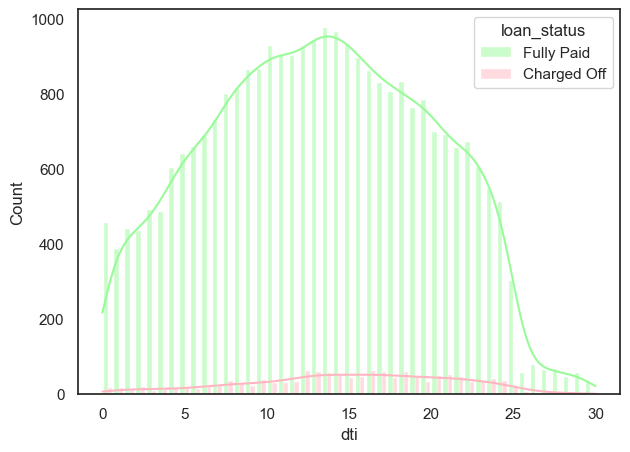

In [159]:
# Percentage(%) 'dti' plot against 'loan_status'
histPls('dti', True)

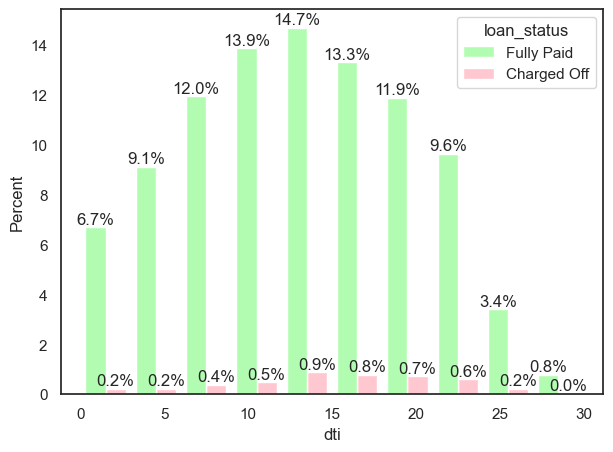

In [160]:
# Percentage(%) 'dti' plot against 'loan_status'
histPbX(df_lnC, 'dti', 10, True)

>- __14.7%__ 'dti' have Simmetry arround __14__ value loans against 'loan_status' are _Not-defaults_

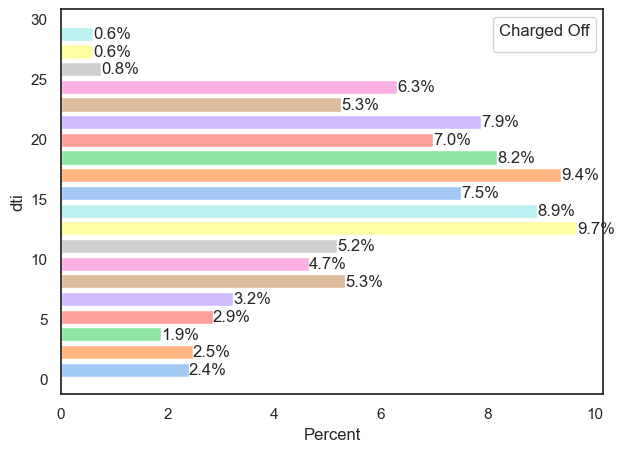

In [161]:
# Percentage(%) 'dti' plot against 'Charged Off'
histPbcY(df_lnC, 'dti', 20)

>- ___>7%___ 'dti' are between __12-22__ value loans against 'Charged Off' are _Defaults_

---
Plots for __recoveries__

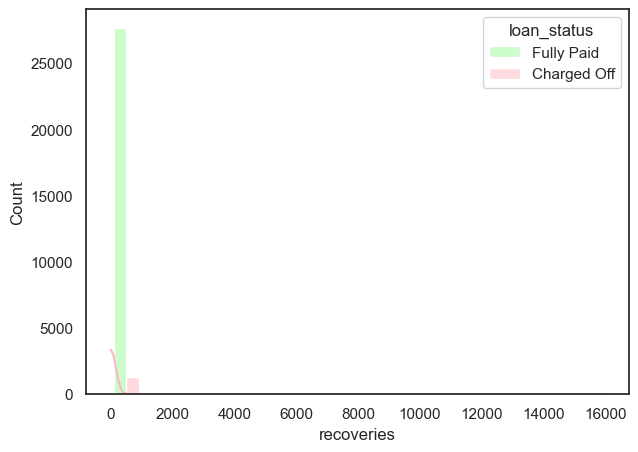

In [162]:
# Percentage(%) 'recoveries' plot against 'loan_status'
histPls('recoveries', True)

<Axes: ylabel='recoveries'>

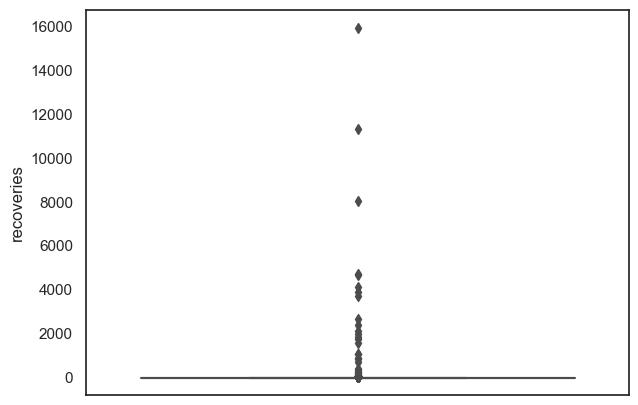

In [163]:
# Boxplot for 'recoveries'
sb.boxplot(data=df_lnC, y='recoveries')

<Axes: ylabel='recoveries'>

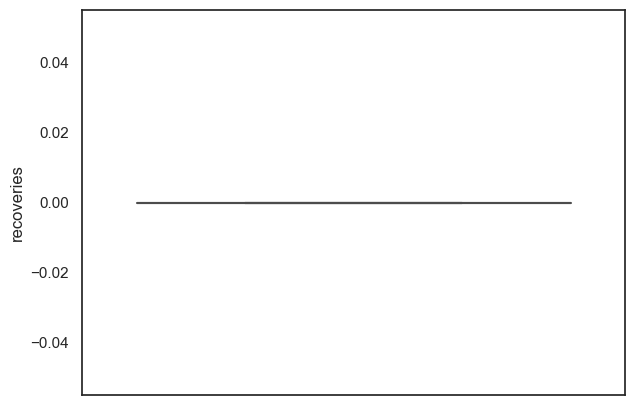

In [164]:
# Removing Outliers from 'recoveries'
df_lnC = Rm_Outlier(df_lnC, 'recoveries')
sb.boxplot(data=df_lnC, y='recoveries')

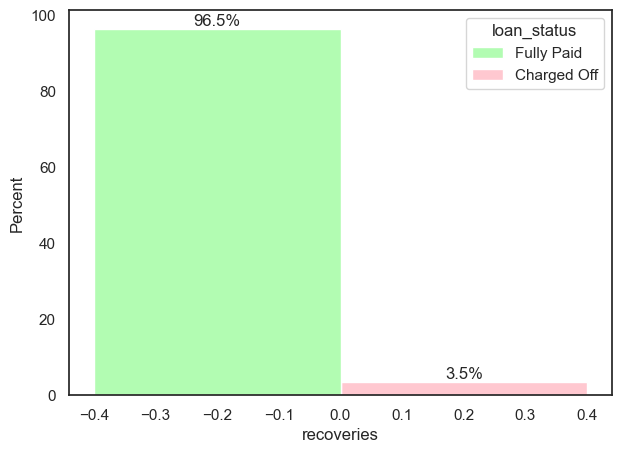

In [165]:
# Percentage(%) 'recoveries' plot against 'loan_status'
histPbX(df_lnC, 'recoveries', 1, True)

>- ___3.5%___ of 'recoveries' are between __0.0__ to __0.4__ loans against 'loan_status' are _Defaults_
>- ___96.5%___ of 'recoveries' are between __0.0__ to __-0.4__ loans against 'loan_status' are _Not-defaults_

---
Plots for __annual_inc__

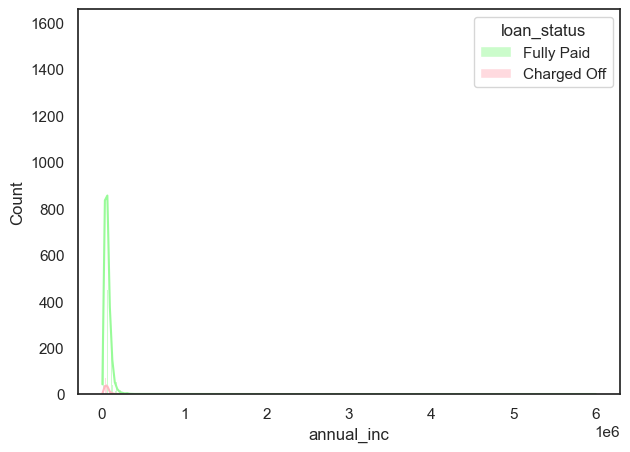

In [166]:
# Percentage(%) 'annual_inc' plot against 'loan_status'
histPls('annual_inc', True)

<Axes: ylabel='annual_inc'>

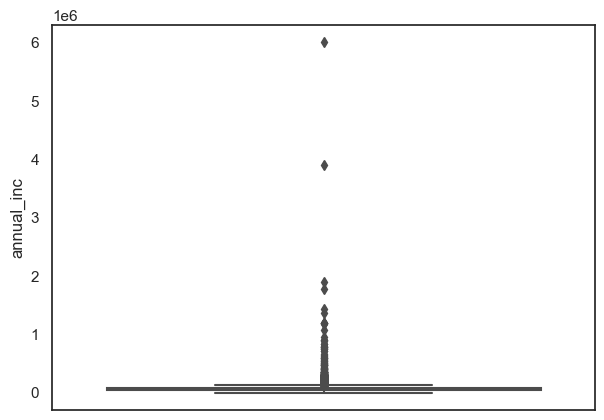

In [167]:
# Boxplot for 'annual_inc'
sb.boxplot(data=df_lnC, y='annual_inc')

<Axes: ylabel='annual_inc'>

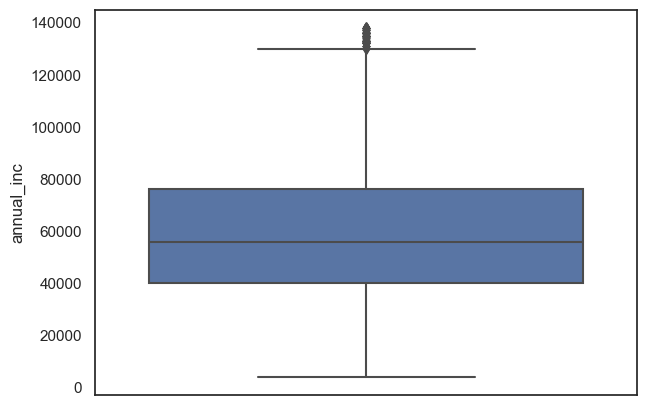

In [168]:
# Removing Outliers from 'annual_inc'
df_lnC = Rm_Outlier(df_lnC, 'annual_inc')
sb.boxplot(data=df_lnC, y='annual_inc')

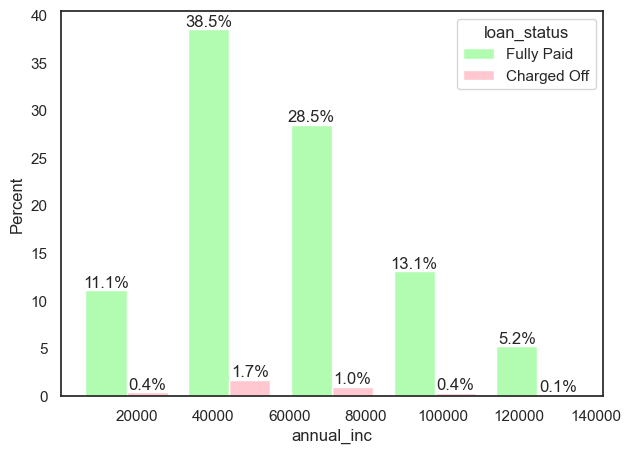

In [169]:
# Percentage(%) 'annual_inc' plot against 'loan_status'
histPbX(df_lnC, 'annual_inc', 5, True)

>- ___38.5%___ of 'annual_inc' __40k__ loans against 'loan_status' are _Not-defaults_
>- ___28.5%___ of 'annual_inc' __70k__ loans against 'loan_status' are _Not-defaults_

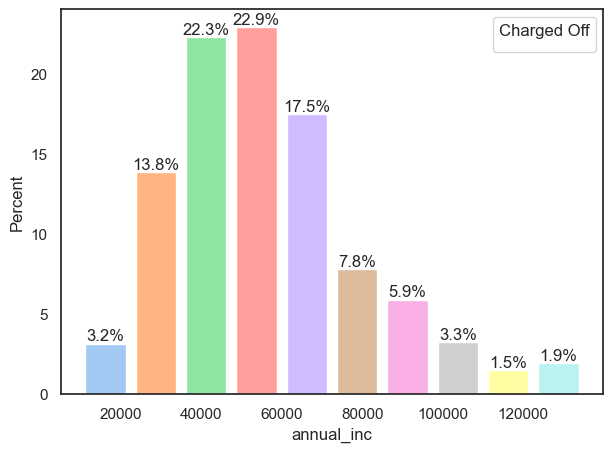

In [170]:
# Percentage(%) 'annual_inc' plot against 'Charged Off'
histPbcX(df_lnC, 'annual_inc', 10)

>- ___22.9%___ of 'annual_inc' __55k__ loans against 'loan_status' are _Defaults_
>- ___22.3%___ of 'annual_inc' __40k__ loans against 'loan_status' are _Defaults_
>- ___17.5%___ of 'annual_inc' __65k__ loans against 'loan_status' are _Defaults_
>- ___13.8%___ of 'annual_inc' __30k__ loans against 'loan_status' are _Defaults_

---
Plots for __total_rec_prncp__

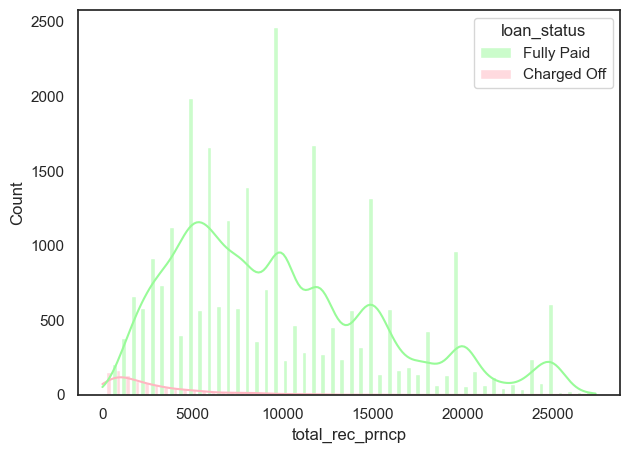

In [171]:
# Percentage(%) 'total_rec_prncp' plot against 'loan_status'
histPls('total_rec_prncp', True)

<Axes: ylabel='total_rec_prncp'>

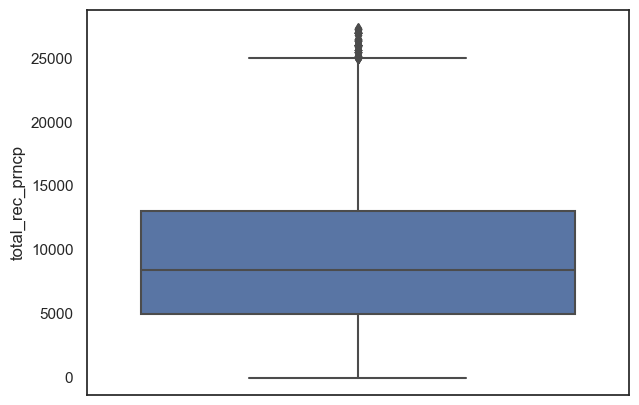

In [172]:
# Boxplot for 'total_rec_prncp'
sb.boxplot(data=df_lnC, y='total_rec_prncp')

<Axes: ylabel='total_rec_prncp'>

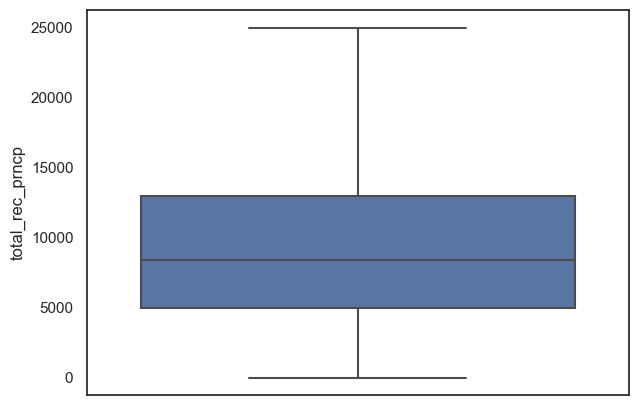

In [173]:
# Removing Outliers from 'total_rec_prncp'
df_lnC = Rm_Outlier(df_lnC, 'total_rec_prncp')
sb.boxplot(data=df_lnC, y='total_rec_prncp')

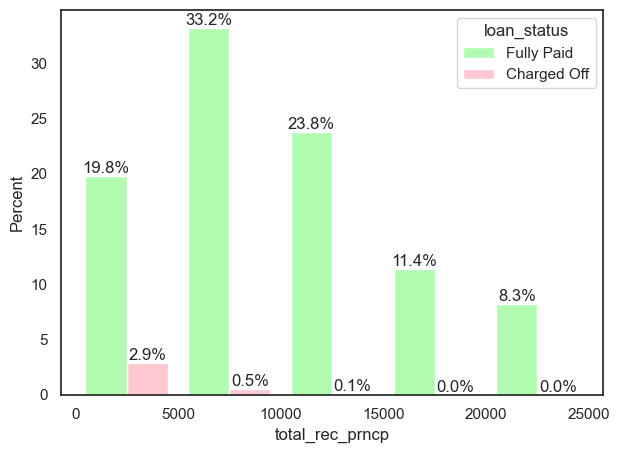

In [174]:
# Percentage(%) 'total_rec_prncp' plot against 'loan_status'
histPbX(df_lnC, 'total_rec_prncp', 5, True)

>- ___33.2%___ of 'total_rec_prncp' __10k__ loans against 'loan_status' are _Not-defaults_
>- ___23.8%___ of 'total_rec_prncp' __5k__ loans against 'loan_status' are _Not-defaults_
>- ___19.8%___ of 'total_rec_prncp' __15k__ loans against 'loan_status' are _Not-defaults_

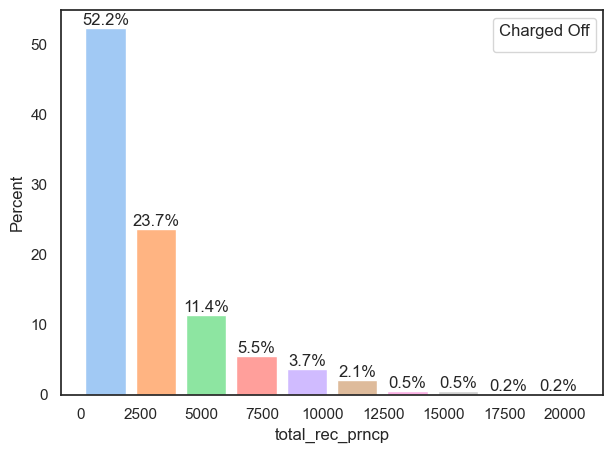

In [175]:
# Percentage(%) 'total_rec_prncp' plot against 'Charged Off'
histPbcX(df_lnC, 'total_rec_prncp', 10)

>- ___52.2%___ of 'total_rec_prncp' __1k__ loans against 'loan_status' are _Defaults_
>- ___23.7%___ of 'total_rec_prncp' __3k__ loans against 'loan_status' are _Defaults_
>- ___11.4%___ of 'total_rec_prncp' __5k__ loans against 'loan_status' are _Defaults_

---
Plots for __funded_amnt_inv__

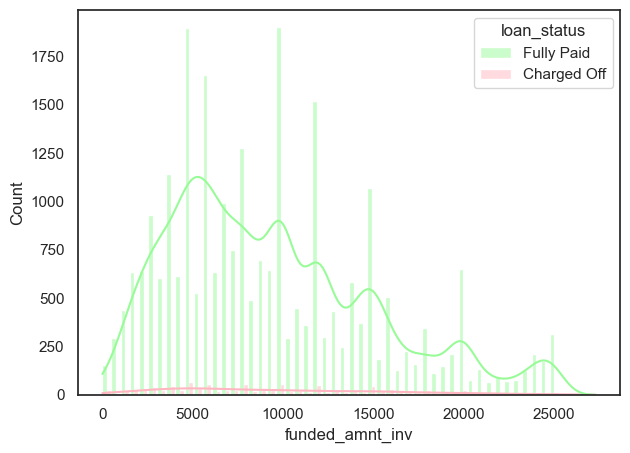

In [176]:
# Percentage(%) 'funded_amnt_inv' plot against 'loan_status'
histPls('funded_amnt_inv', True)

<Axes: ylabel='funded_amnt_inv'>

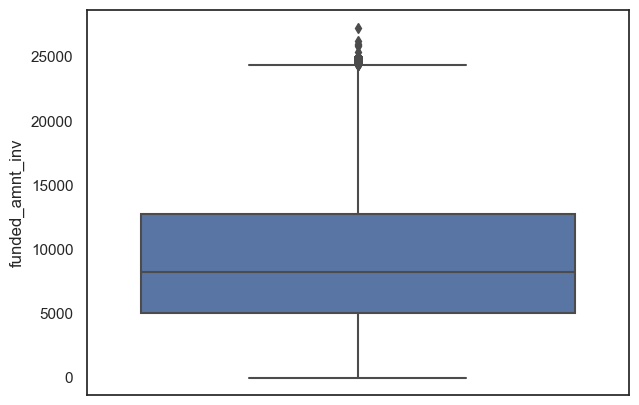

In [177]:
# Boxplot for 'funded_amnt_inv'
sb.boxplot(data=df_lnC, y='funded_amnt_inv')

<Axes: ylabel='funded_amnt_inv'>

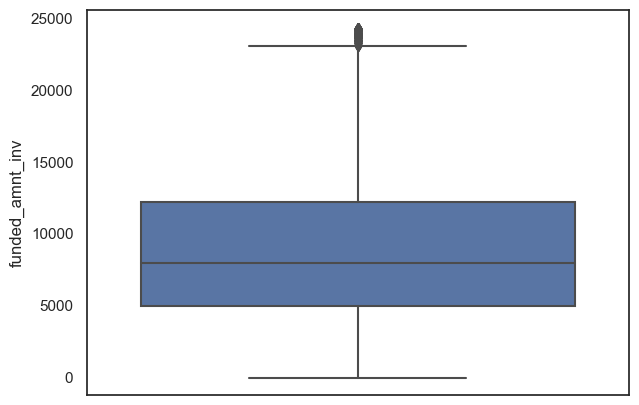

In [178]:
# Removing Outliers from 'funded_amnt_inv'
df_lnC = Rm_Outlier(df_lnC, 'funded_amnt_inv')
sb.boxplot(data=df_lnC, y='funded_amnt_inv')

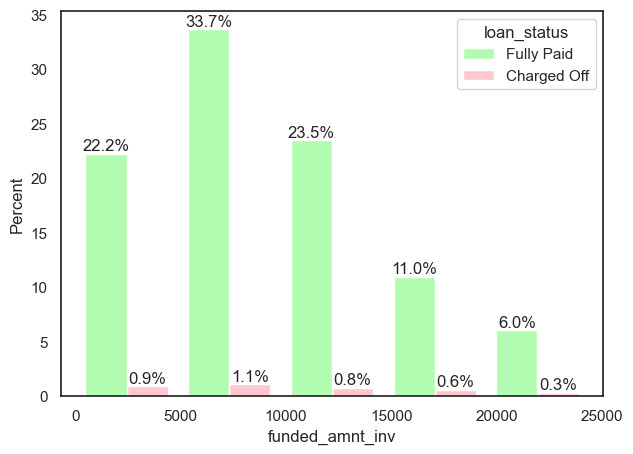

In [179]:
# Percentage(%) 'funded_amnt_inv' plot against 'loan_status'
histPbX(df_lnC, 'funded_amnt_inv', 5, True)

>- ___33.7%___ of 'funded_amnt_inv' __7k__ loans against 'loan_status' are _Not-defaults_
>- ___23.5%___ of 'funded_amnt_inv' __11k__ loans against 'loan_status' are _Not-defaults_
>- ___22.2%___ of 'funded_amnt_inv' __2k__ loans against 'loan_status' are _Not-defaults_

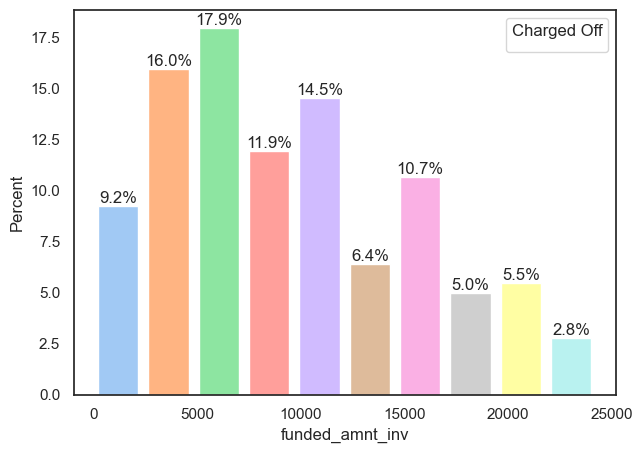

In [180]:
# Percentage(%) 'funded_amnt_inv' plot against 'Charged Off'
histPbcX(df_lnC, 'funded_amnt_inv', 10)

>- ___17.9%___ of 'funded_amnt_inv' __5k__ loans against 'loan_status' are _Defaults_
>- ___16.0%___ of 'funded_amnt_inv' __4k__ loans against 'loan_status' are _Defaults_
>- ___14.5%___ of 'funded_amnt_inv' __11k__ loans against 'loan_status' are _Defaults_

---
Plots for __installment__

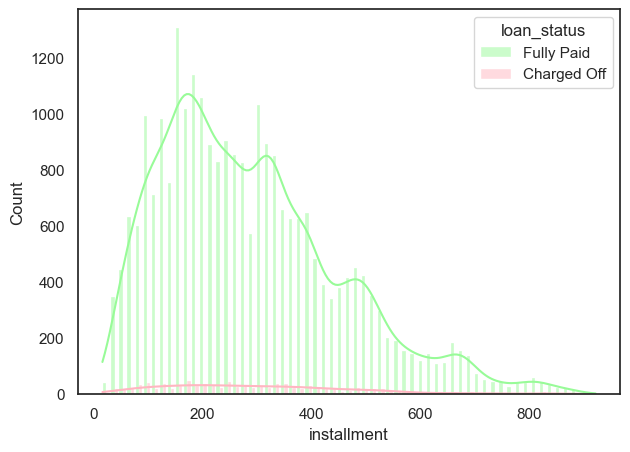

In [181]:
# Percentage(%) 'installment' plot against 'loan_status'
histPls('installment', True)

<Axes: ylabel='installment'>

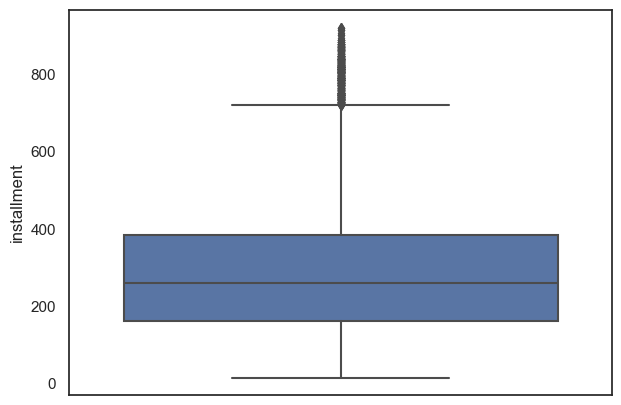

In [182]:
# Boxplot for 'installment'
sb.boxplot(data=df_lnC, y='installment')

<Axes: ylabel='installment'>

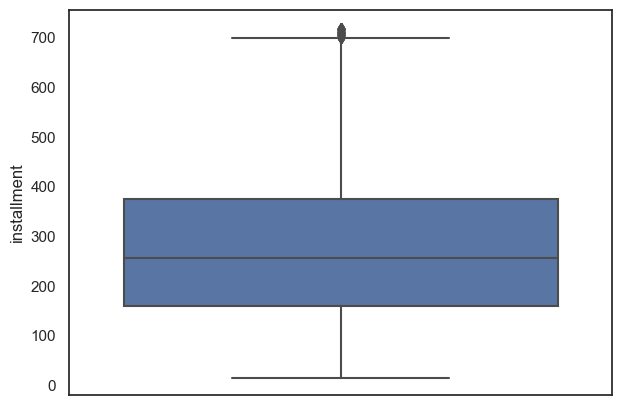

In [183]:
# Removing Outliers from 'installment'
df_lnC = Rm_Outlier(df_lnC, 'installment')
sb.boxplot(data=df_lnC, y='installment')

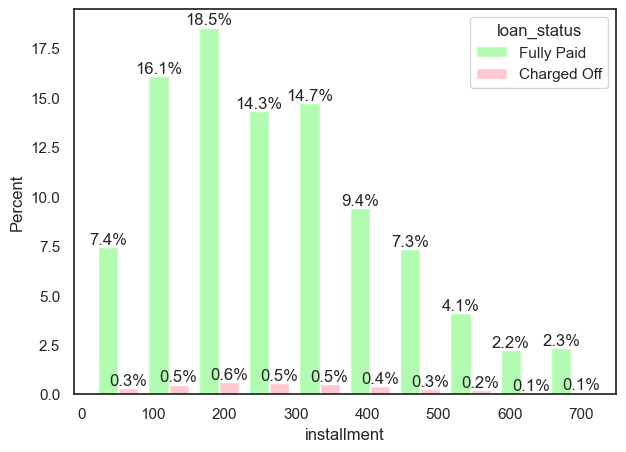

In [184]:
# Percentage(%) 'installment' plot against 'loan_status'
histPbX(df_lnC, 'installment', 10, True)

>- ___>14%___ of 'installment' are between __100-300__ loans against 'loan_status' are _Not-defaults_

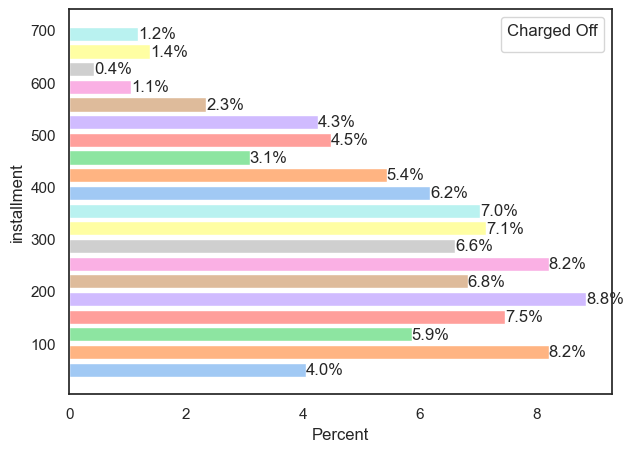

In [185]:
# Percentage(%) 'installment' plot against 'Charged Off'
histPbcY(df_lnC, 'installment', 20)

>- ___>5%___ of 'installment' are between __100-400__ loans against 'Charged Off' are _Defaults_

---
Plots for __revol_bal__

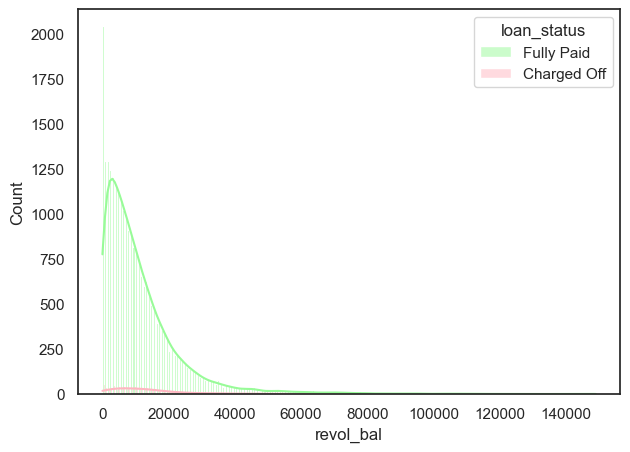

In [186]:
# Percentage(%) 'revol_bal' plot against 'loan_status'
histPls('revol_bal', True)

<Axes: ylabel='revol_bal'>

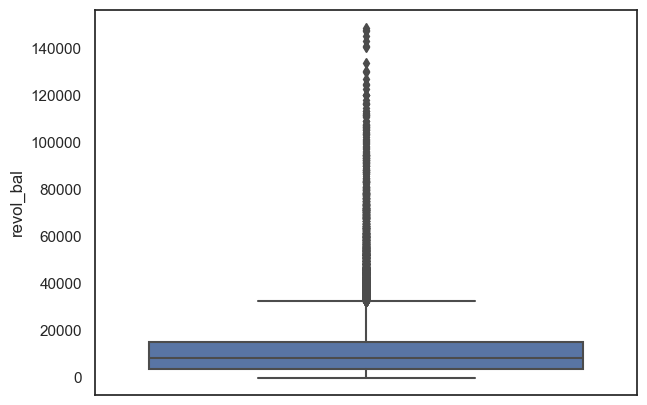

In [187]:
# Boxplot for 'revol_bal'
sb.boxplot(data=df_lnC, y='revol_bal')

<Axes: ylabel='revol_bal'>

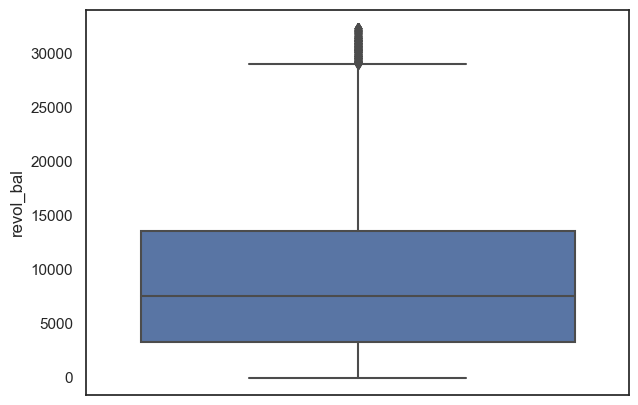

In [188]:
# Removing Outliers from 'revol_bal'
df_lnC = Rm_Outlier(df_lnC, 'revol_bal')
sb.boxplot(data=df_lnC, y='revol_bal')

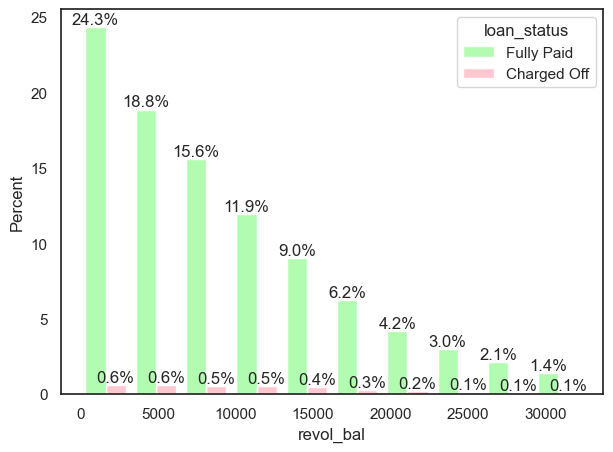

In [189]:
# Percentage(%) 'revol_bal' plot against 'loan_status'
histPbX(df_lnC, 'revol_bal', 10, True)

>- LOW 'revol_bal' loans against 'loan_status' are _Not-defaults_

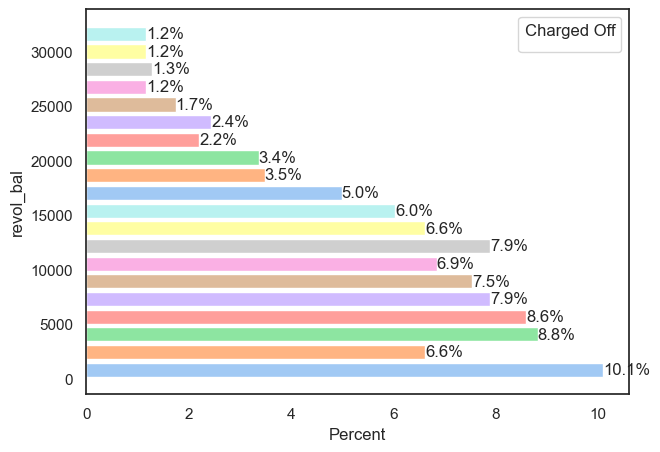

In [190]:
# Percentage(%) 'revol_bal' plot against 'Charged Off'
histPbcY(df_lnC, 'revol_bal', 20)

>- LOW 'revol_bal' loans against 'Charged Off' are _Defaults_

---
Plots for __last_pymnt_amnt__

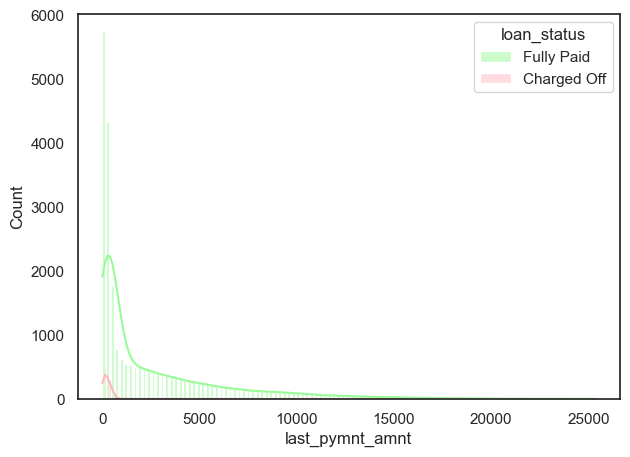

In [191]:
# Percentage(%) 'last_pymnt_amnt' plot against 'loan_status'
histPls('last_pymnt_amnt', True)

<Axes: ylabel='last_pymnt_amnt'>

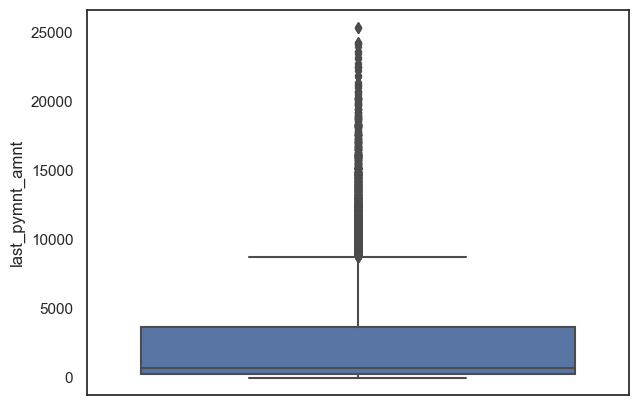

In [192]:
# Boxplot for 'last_pymnt_amnt'
sb.boxplot(data=df_lnC, y='last_pymnt_amnt')

<Axes: ylabel='last_pymnt_amnt'>

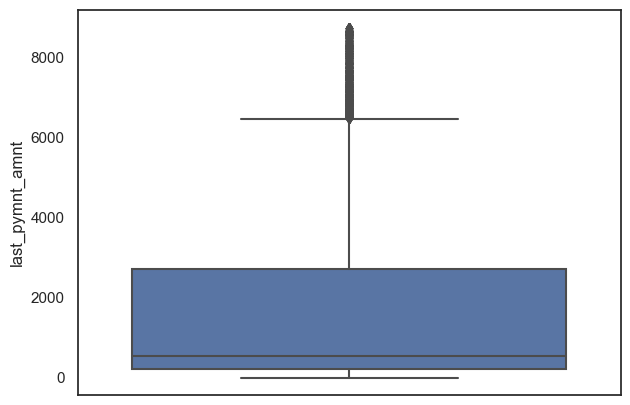

In [193]:
# Removing Outliers from 'last_pymnt_amnt'
df_lnC = Rm_Outlier(df_lnC, 'last_pymnt_amnt')
sb.boxplot(data=df_lnC, y='last_pymnt_amnt')

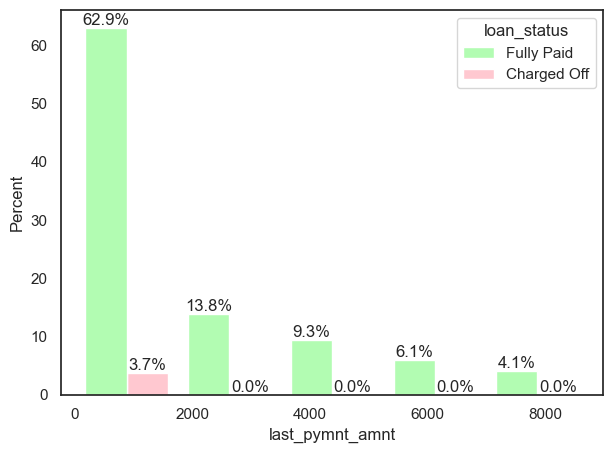

In [194]:
# Percentage(%) 'last_pymnt_amnt' plot against 'loan_status'
histPbX(df_lnC, 'last_pymnt_amnt', 5, True)

>- ___62.9%___ of 'last_pymnt_amnt' __1k__ loans against 'loan_status' are _Not-defaults_

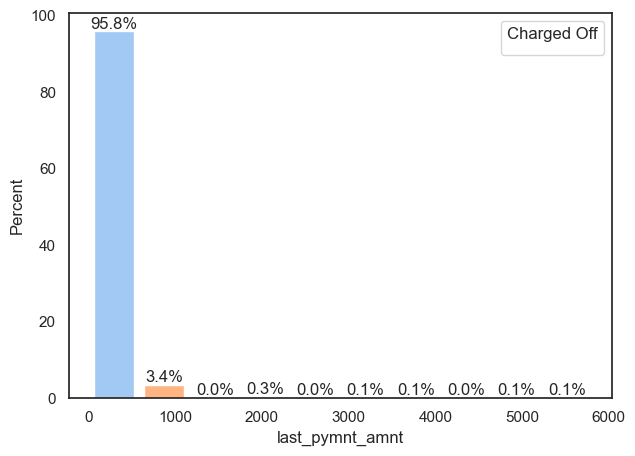

In [195]:
# Percentage(%) 'last_pymnt_amnt' plot against 'Charged Off'
histPbcX(df_lnC, 'last_pymnt_amnt', 10)

>- ___95.8%___ of 'last_pymnt_amnt' __1k__ loans against 'Charged Off' are _Defaults_

---
Plots for __total_rec_int__

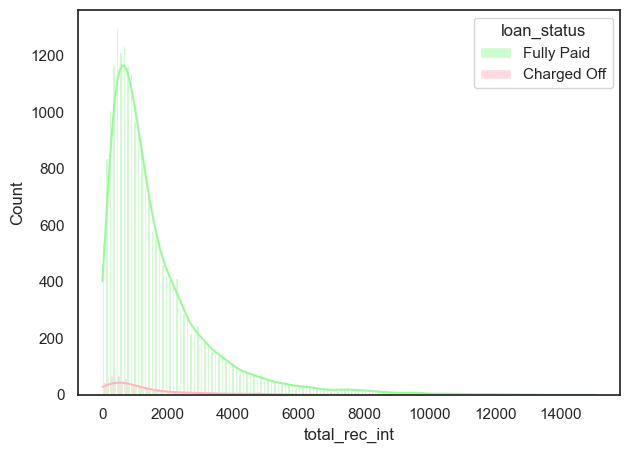

In [196]:
# Percentage(%) 'total_rec_int' plot against 'loan_status'
histPls('total_rec_int', True)

<Axes: ylabel='total_rec_int'>

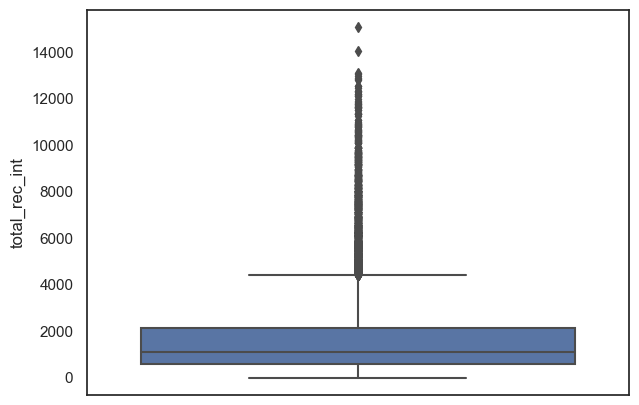

In [197]:
# Boxplot for 'total_rec_int'
sb.boxplot(data=df_lnC, y='total_rec_int')

<Axes: ylabel='total_rec_int'>

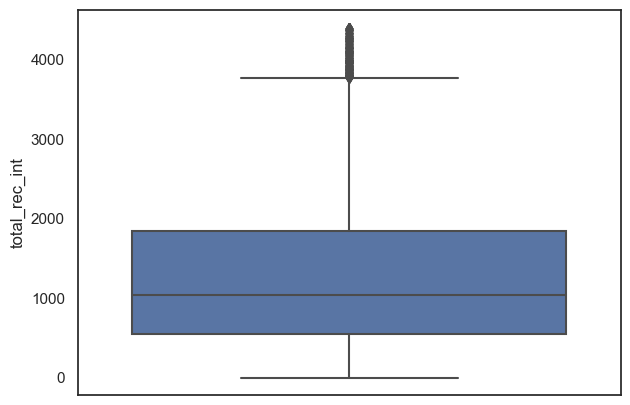

In [198]:
# Removing Outliers from 'total_rec_int'
df_lnC = Rm_Outlier(df_lnC, 'total_rec_int')
sb.boxplot(data=df_lnC, y='total_rec_int')

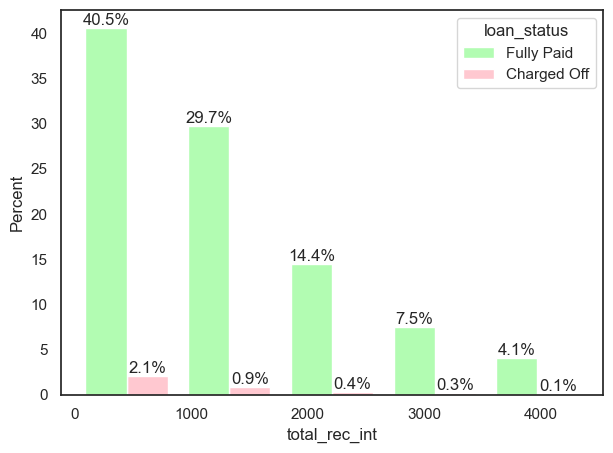

In [199]:
# Percentage(%) 'total_rec_int' plot against 'loan_status'
histPbX(df_lnC, 'total_rec_int', 5, True)

>- LOW 'total_rec_int' loans against 'loan_status' are _Not-defaults_

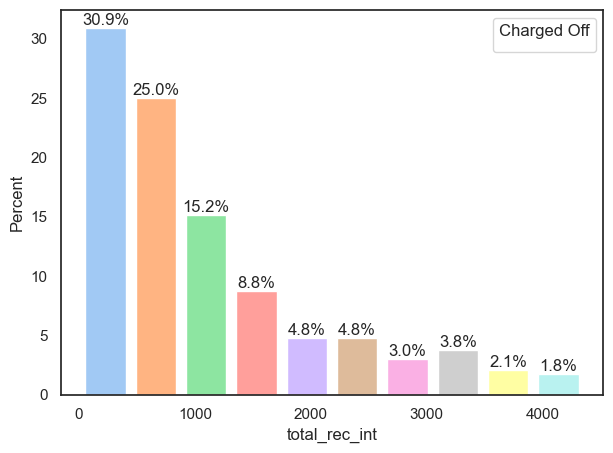

In [200]:
# Percentage(%) 'total_rec_int' plot against 'Charged Off'
histPbcX(df_lnC, 'total_rec_int', 10)

>- LOW 'total_rec_int' loans against 'Charged Off' are _Defaults_

---
Plots for __total_pymnt_inv__

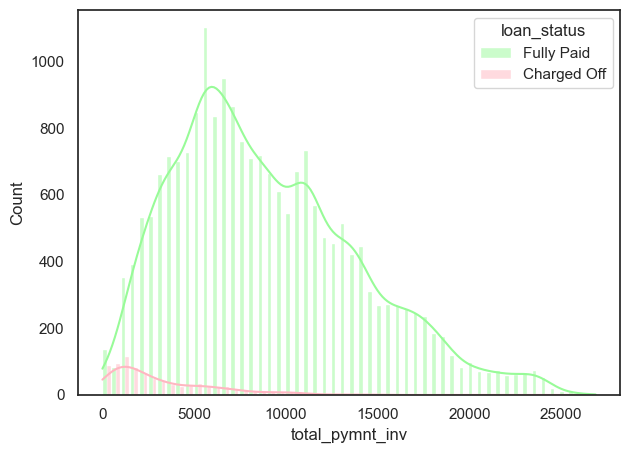

In [201]:
# Percentage(%) 'total_pymnt_inv' plot against 'loan_status'
histPls('total_pymnt_inv', True)

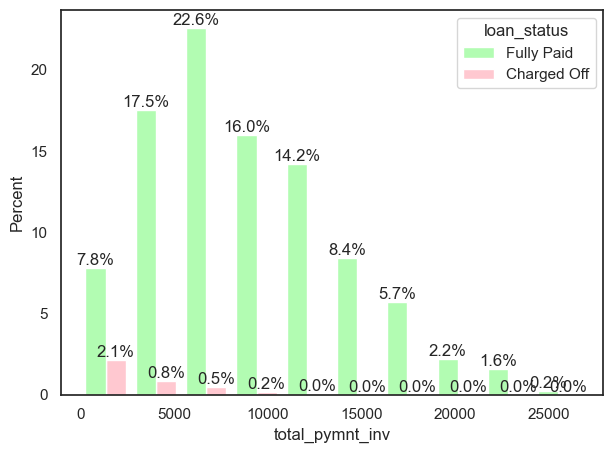

In [202]:
# Percentage(%) 'total_pymnt_inv' plot against 'loan_status'
histPbX(df_lnC, 'total_pymnt_inv', 10, True)

>- ___>16%___ of 'total_pymnt_inv' are between __5k-10k__ loans against 'loan_status' are _Not-defaults_

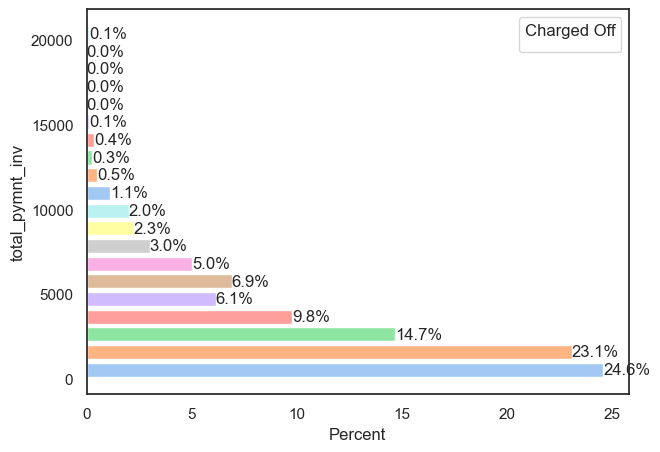

In [203]:
# Percentage(%) 'total_pymnt_inv' plot against 'Charged Off'
histPbcY(df_lnC, 'total_pymnt_inv', 20)

>- LOW 'total_pymnt_inv' loans against 'Charged Off' are _Defaults_

---
Plots for __total_pymnt__

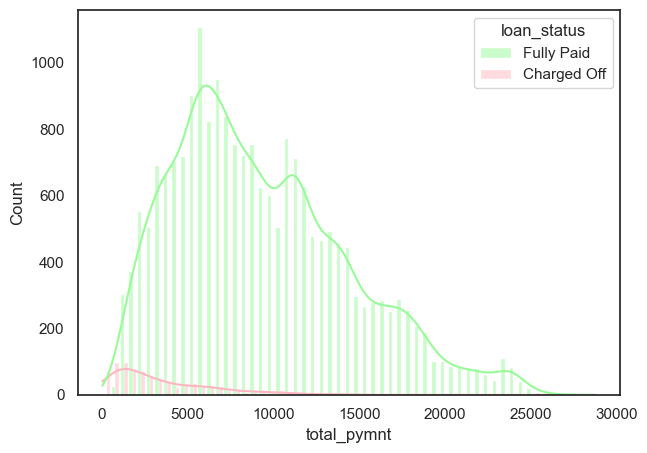

In [204]:
# Percentage(%) 'total_pymnt' plot against 'loan_status'
histPls('total_pymnt', True)

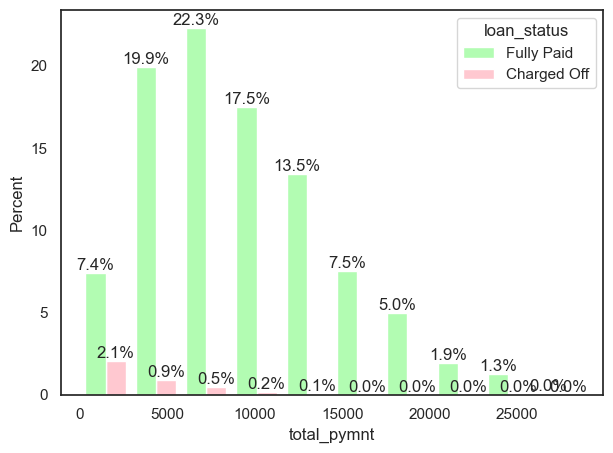

In [205]:
# Percentage(%) 'total_pymnt' plot against 'loan_status'
histPbX(df_lnC, 'total_pymnt', 10, True)

>- ___>17.5%___ of 'total_pymnt' are between __5k-10k__ loans against 'loan_status' are _Not-defaults_

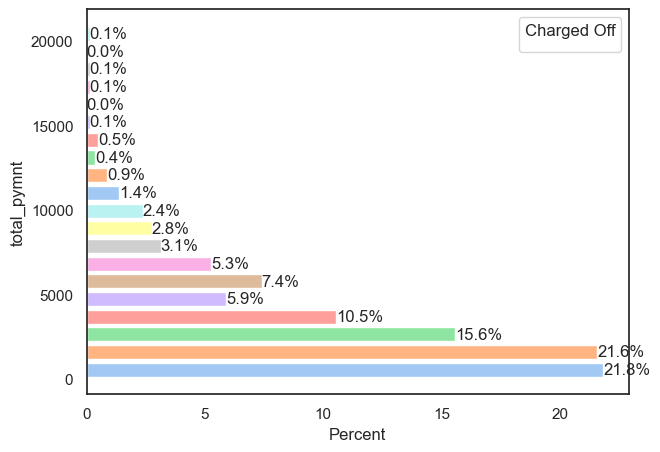

In [206]:
# Percentage(%) 'total_pymnt' plot against 'Charged Off'
histPbcY(df_lnC, 'total_pymnt', 20)

>- LOW 'total_pymnt' loans against 'Charged Off' are _Defaults_

__Date-Time__ Columns Analysis

In [207]:
# Columns with data type 'datetime'
df_loan.select_dtypes(include=['datetime']).nunique().sort_values()

issue_d                52
last_credit_pull_d     96
last_pymnt_d           97
earliest_cr_line      475
dtype: int64

---
Plots for __issue_d__

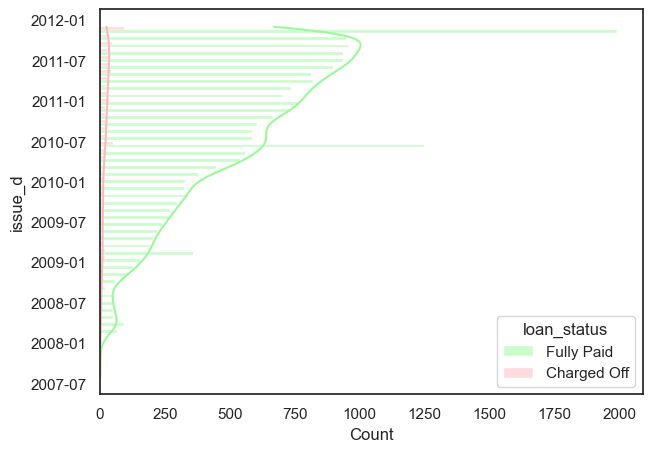

In [208]:
# Percentage(%) 'issue_d' plot against 'loan_status'
histPlsY('issue_d',True)

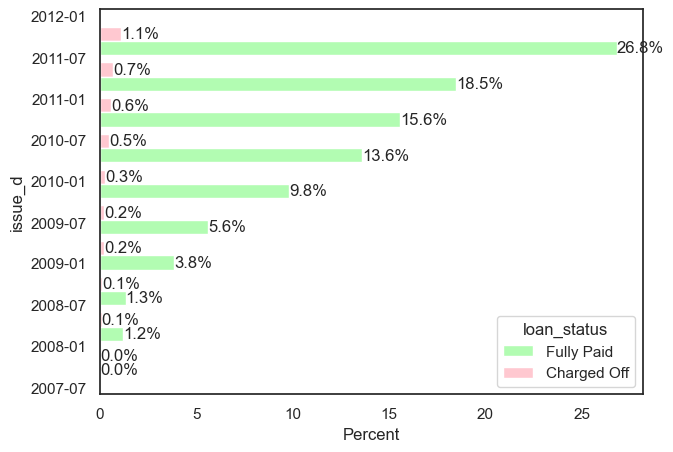

In [209]:
# Percentage(%) 'issue_d' plot against 'loan_status'
histPbY(df_lnC, 'issue_d', 10, True)

>- RECENT __2012__ 'issue_d' loans against 'loan_status' are _Not-defaults_

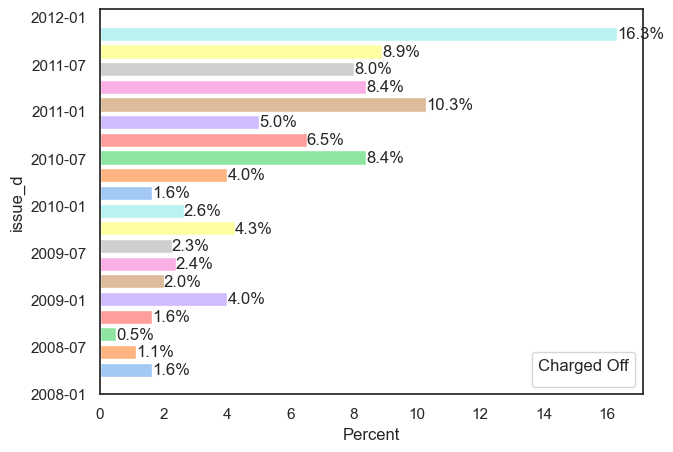

In [210]:
# Percentage(%) 'issue_d' plot against 'Charged Off'
histPbcY(df_lnC, 'issue_d', 20)

>- __2012__ 'issue_d' loans against 'Charged Off' are _Defaults_

---
Plots for __last_credit_pull_d__

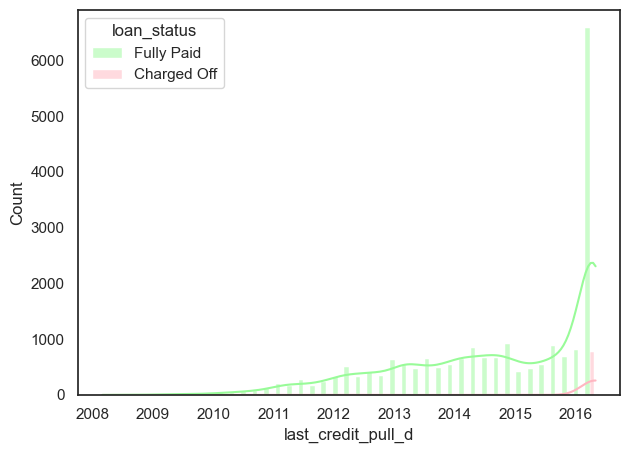

In [211]:
# Percentage(%) 'last_credit_pull_d' plot against 'loan_status'
histPls('last_credit_pull_d', True)

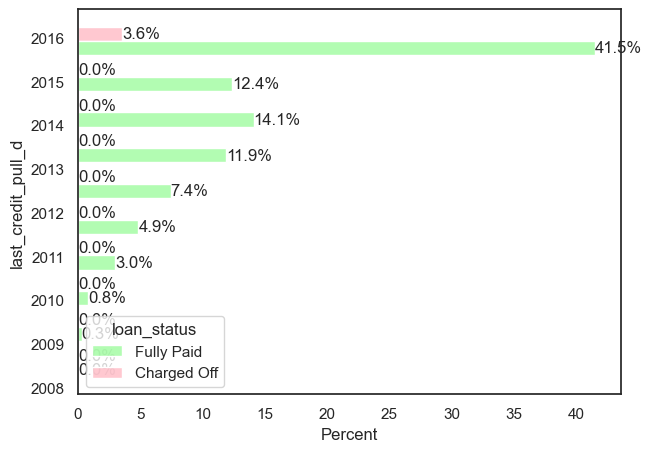

In [212]:
# Percentage(%) 'last_credit_pull_d' plot against 'loan_status'
histPbY(df_lnC, 'last_credit_pull_d', 10, True)

>- ___41.5%___ of 'last_credit_pull_d' year __2016__ loans against 'loan_status' are _Not-defaults_

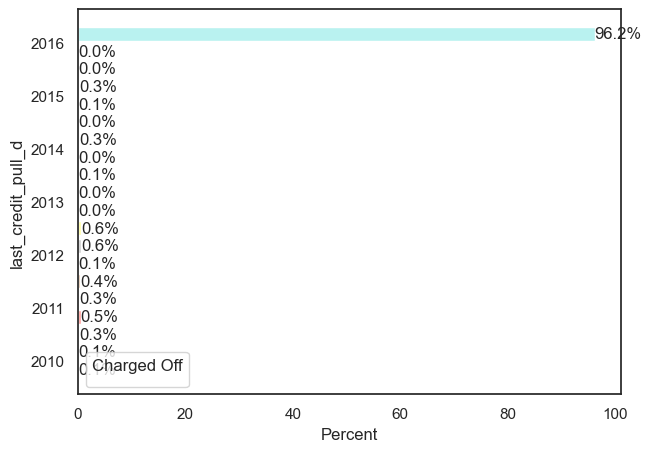

In [213]:
# Percentage(%) 'last_credit_pull_d' plot against 'Charged Off'
histPbcY(df_lnC, 'last_credit_pull_d', 20)

>- ___96.2%___ of 'last_credit_pull_d' year __2016__ loans against 'Charged Off' are _Defaults_

---
Plots for __last_pymnt_d__

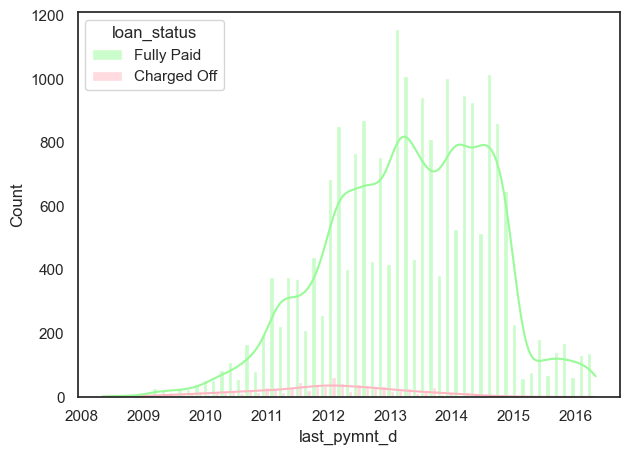

In [214]:
# Percentage(%) 'last_pymnt_d' plot against 'loan_status'
histPls('last_pymnt_d', True)

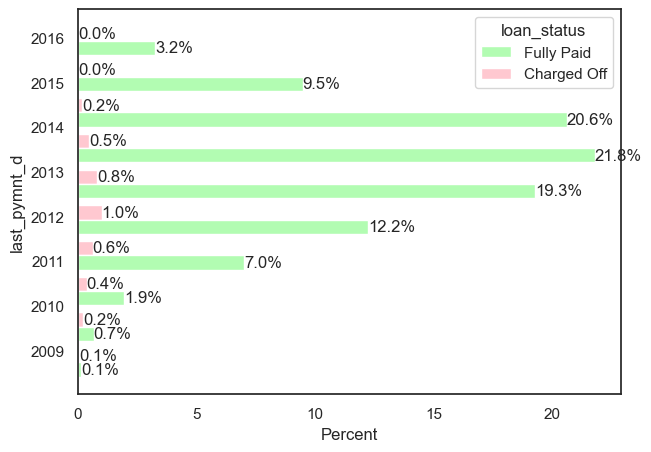

In [215]:
# Percentage(%) 'last_pymnt_d' plot against 'loan_status'
histPbY(df_lnC, 'last_pymnt_d', 10, True)

>- ___>20%___ of 'last_pymnt_d' are between year __2013-2014__ loans against 'loan_status' are _Not-defaults_ [after COVID]

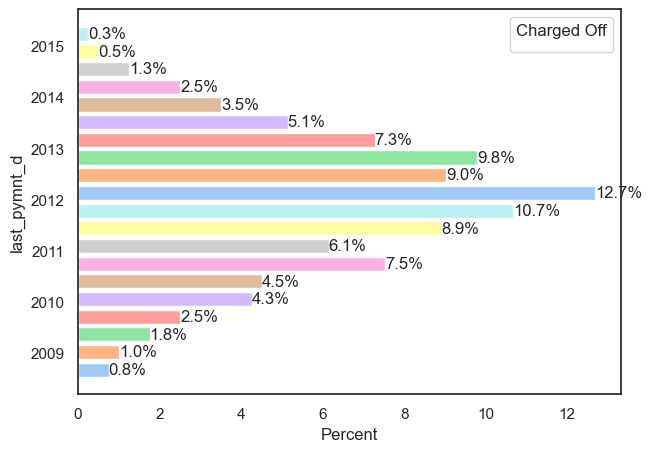

In [216]:
# Percentage(%) 'last_pymnt_d' plot against 'Charged Off'
histPbcY(df_lnC, 'last_pymnt_d', 20)

>- ___12.7%___ of 'last_pymnt_d' year __2012__ loans against 'Charged Off' are _Defaults_ [COVID]

---
Plots for __earliest_cr_line__

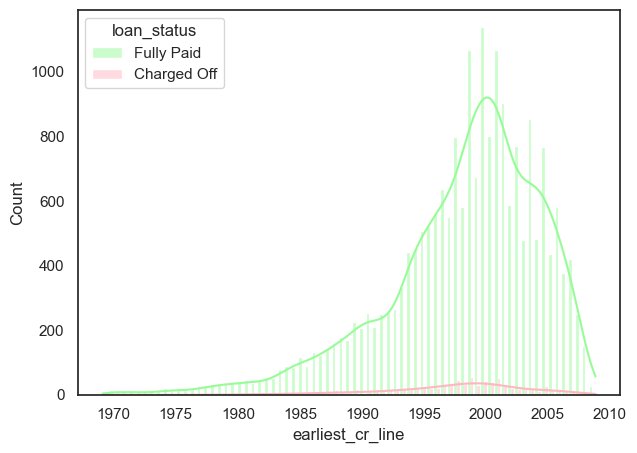

In [217]:
# Percentage(%) 'earliest_cr_line' plot against 'loan_status'
histPls('earliest_cr_line', True)

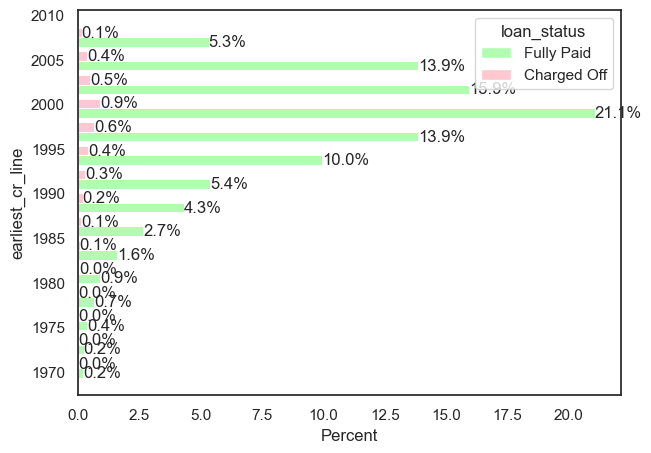

In [218]:
# Percentage(%) 'earliest_cr_line' plot against 'loan_status'
histPbY(df_lnC, 'earliest_cr_line', 15, True)

>- ___>14%___ of 'earliest_cr_line' are between years __1995-2005__ loans against 'loan_status' are _Not-defaults_

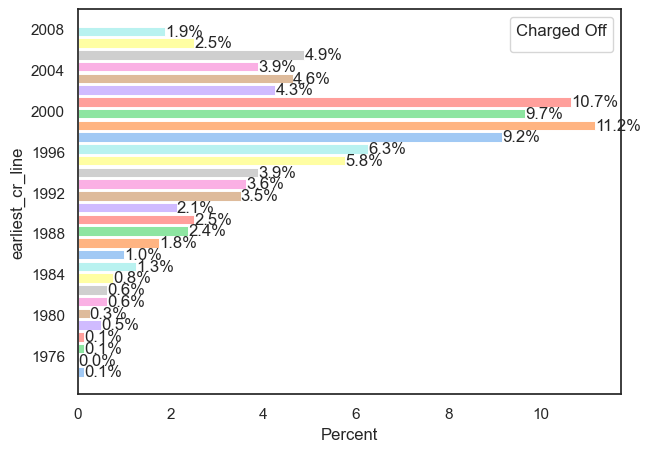

In [219]:
# Percentage(%) 'earliest_cr_line' plot against 'Charged Off'
histPbcY(df_lnC, 'earliest_cr_line', 30)

>- ___>9%___ of 'earliest_cr_line' are between years __1998-2001__ loans against 'Charged Off' are _Defaults_

---
##### Bivariate Analysis

---
__loan_status__ vs __int_rate__

<Axes: xlabel='loan_status', ylabel='int_rate'>

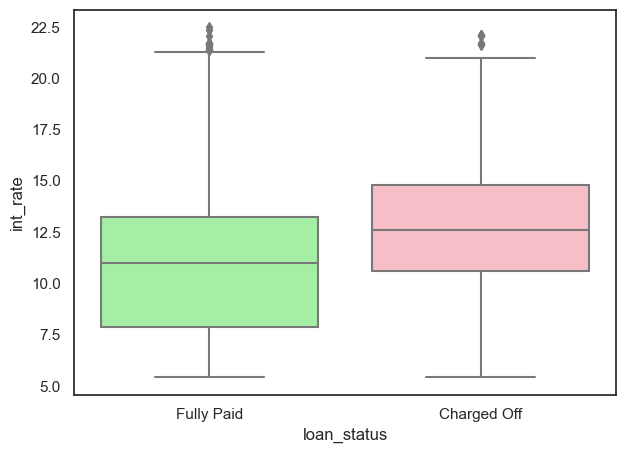

In [220]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.boxplot(data=df_lnC,  x='loan_status', y='int_rate', palette=['palegreen','lightpink'])

>- HIGH 'int_rate' have more _Defaults_ but needs to impose HIGH 'int_rate' on _Defaults_ [___CONTRADICT___]

---
__verification_status__ vs __loan_amnt__ vs _loan_status_

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

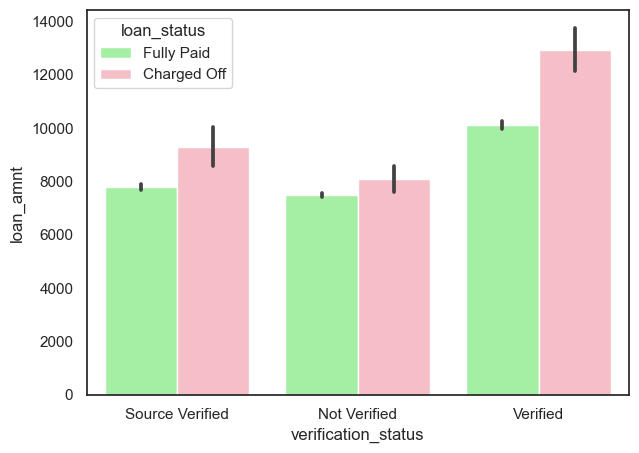

In [221]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.barplot(data=df_lnC, x='verification_status', y='loan_amnt', hue='loan_status', palette=['palegreen','lightpink'])

>- HIGHER 'loan_amnt' are __Verified__ more often and have huge _Defaults_ [___RISK___]

---
__term__ vs __int_rate__ vs _loan_status_

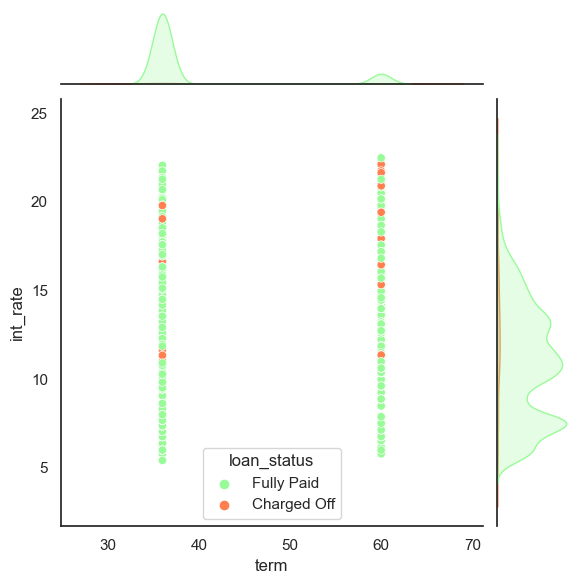

In [222]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.jointplot(data=df_lnC, x='term', y='int_rate', hue='loan_status', palette=['palegreen','coral'])

>- HIGH 'int_rate' for LONG 'term' has more _Defaults_ [___RISK___]

---
__term__ vs __loan_amnt__ vs _loan_status_

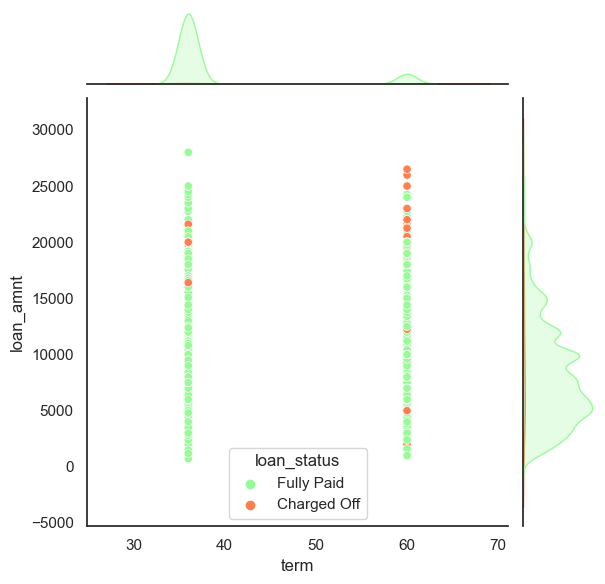

In [223]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.jointplot(data=df_lnC, x='term', y='loan_amnt', hue='loan_status', palette=['palegreen','coral'])

>- HIGH 'loan_amnt' for LONG 'term' have high _Defaults_ [___RISK___]

---
__grade__ vs __loan_amnt__ vs _loan_status_

<Axes: xlabel='grade', ylabel='loan_amnt'>

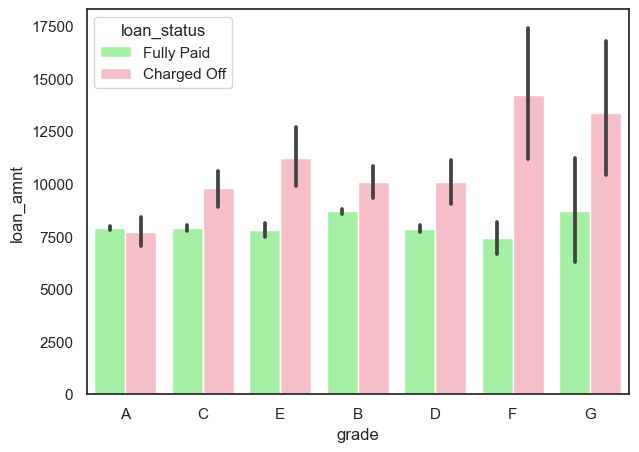

In [224]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.barplot(data=df_lnC, x='grade', y='loan_amnt', hue='loan_status', palette=['palegreen','lightpink'])

>- HIGHER 'loan_amnt' for LOWER 'grade' are high _Defaults_ [___RISK___]

---
__int_rate__ vs __sub_grade__ vs _loan_status_

<Axes: xlabel='int_rate', ylabel='sub_grade'>

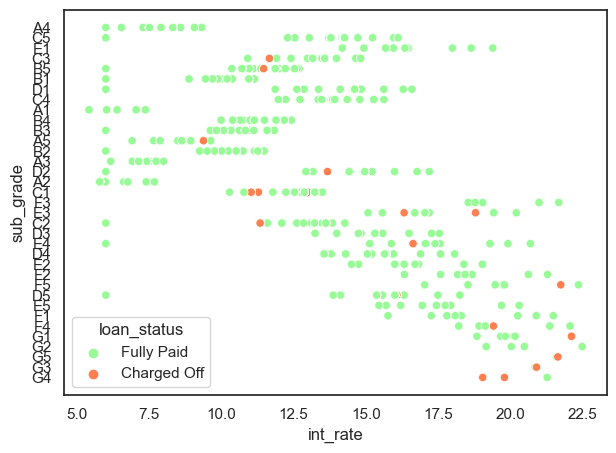

In [225]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.scatterplot(data=df_lnC, x='int_rate', y='sub_grade', hue='loan_status', palette=['palegreen','coral'])

>- LOWER 'sub_grade' have HIGHER 'int_rate' [___SAFE___]

---
__loan_amnt__ vs __annual_inc__ vs _loan_status_

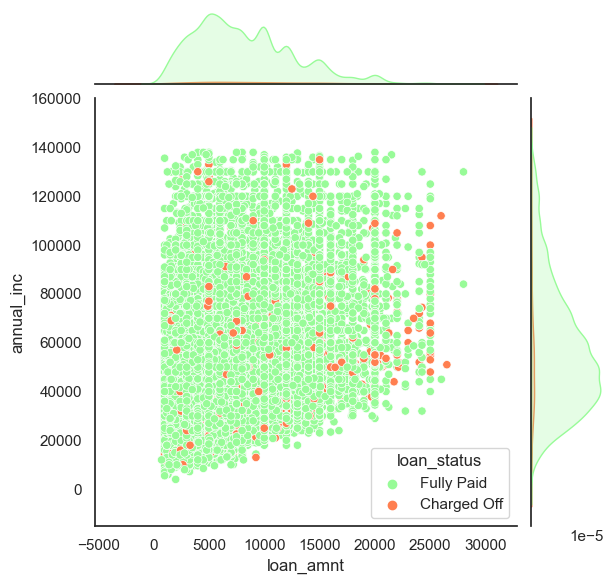

In [226]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.jointplot(data=df_lnC, x='loan_amnt', y='annual_inc', hue='loan_status', palette=['palegreen','coral'])

>- HIGHER 'loan_amnt' for LOWER 'annual_inc' have _Defaults_ [___RISK___]

---
__installment__ vs __int_rate__ vs _loan_status_

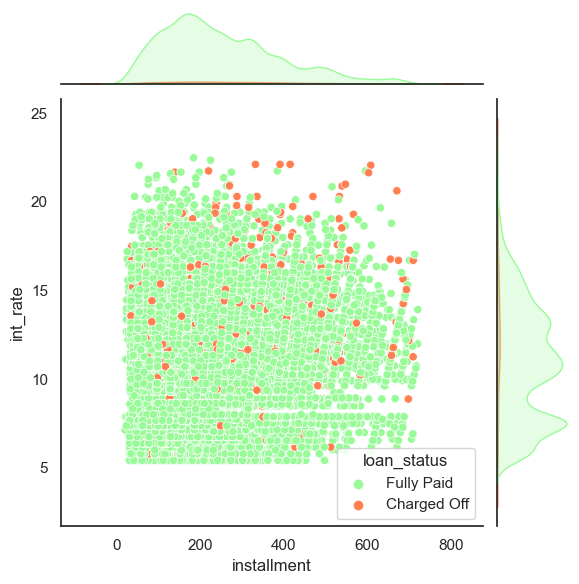

In [227]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.jointplot(data=df_lnC, x='installment', y='int_rate', hue='loan_status', palette=['palegreen','coral'])

>- HIGH 'int_rate' for LONG 'instalment' have high _Defaults_ but to Compensate it is necessary [___CONTRADICT___]

---
__issue_d__ vs __int_rate__ vs _loan_status_

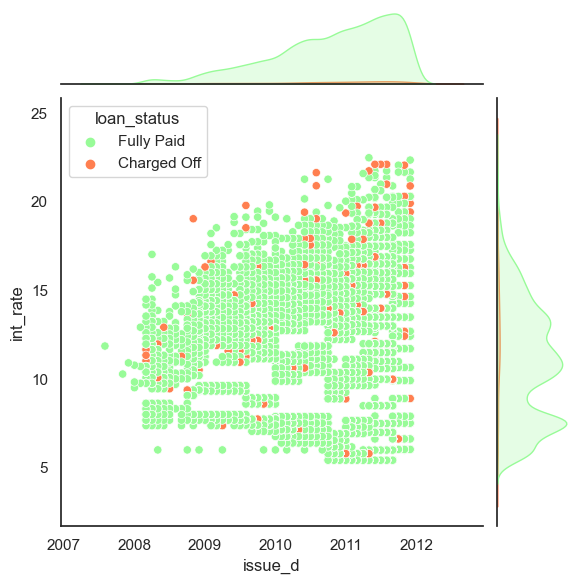

In [228]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.jointplot(data=df_lnC, x='issue_d', y='int_rate', hue='loan_status', palette=['palegreen','coral'])

>- HIGH 'int_rate' after COVID have high _Defaults_ [___RISK___]

---
__issue_d__ vs __loan_amnt__ vs _loan_status_

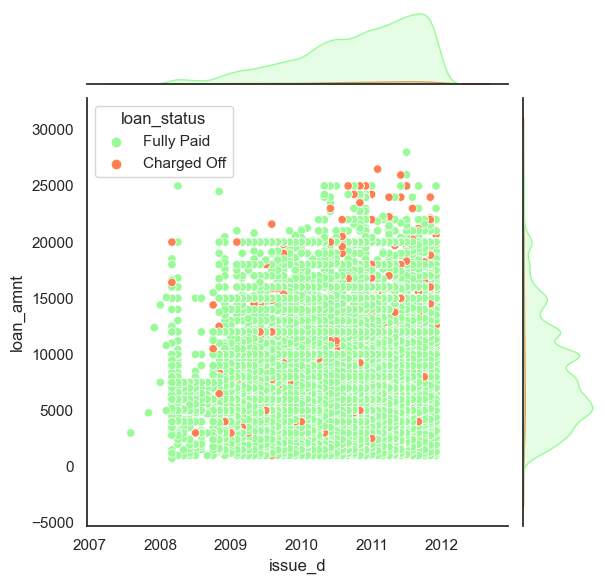

In [229]:
sb.set(rc = {'figure.figsize': (7, 5)})
sb.set_style("white")
sb.jointplot(data=df_lnC, x='issue_d', y='loan_amnt', hue='loan_status', palette=['palegreen','coral'])

>- 'loan_amnt' increased with recent years, HIGH 'loan_amnt' after COVID have high _Defaults_ [___RISK___]

---
__HEAT-MAP__

In [230]:
# Finally identify Unique values again
unique_valF2 = df_lnC.nunique()
unique_valF2

loan_amnt                    616
funded_amnt                  681
funded_amnt_inv             4017
term                           2
int_rate                     297
installment                 9034
grade                          7
sub_grade                     35
emp_title                  17605
emp_length                    11
home_ownership                 4
annual_inc                  3130
verification_status            3
issue_d                       51
loan_status                    2
purpose                       14
title                      11663
addr_state                    47
dti                         2732
delinq_2yrs                   11
earliest_cr_line             460
inq_last_6mths                 9
open_acc                      20
pub_rec                        5
revol_bal                  13238
revol_util                  1051
total_acc                     50
total_pymnt                20199
total_pymnt_inv            20008
total_rec_prncp             1654
total_rec_

In [231]:
# Columns with Same values for all Row
drop_F2uniq = df_lnC.columns[unique_valF2.values == 1]
drop_F2uniq

Index(['total_rec_late_fee', 'recoveries', 'collection_recovery_fee'], dtype='object')

In [232]:
# Drop Columns with Same values for all Row
df_lnC.drop(drop_F2uniq, axis=1, inplace=True)
df_lnC.shape

(21513, 35)

In [233]:
# Columns with data type 'int' & 'float'
nC = df_lnC.select_dtypes(include=['int','float']).columns
nC

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [234]:
# Check similar column values with 'loan_amnt'
df_cR = df_lnC[nC].corr()
df_cR['loan_amnt'].sort_values(ascending=False)

loan_amnt               1.000000
funded_amnt             0.975862
installment             0.936678
funded_amnt_inv         0.936574
total_pymnt             0.907784
total_rec_prncp         0.905085
total_pymnt_inv         0.871941
total_rec_int           0.710288
revol_bal               0.333062
annual_inc              0.280697
last_pymnt_amnt         0.233884
total_acc               0.185661
open_acc                0.154486
emp_length              0.086586
term                    0.074491
dti                     0.049529
revol_util              0.017678
int_rate                0.014784
pub_rec_bankruptcies   -0.023767
inq_last_6mths         -0.028623
pub_rec                -0.041891
delinq_2yrs            -0.061853
Name: loan_amnt, dtype: float64

In [235]:
# Identify similar column values with 'loan_amnt'
dC = ['funded_amnt','funded_amnt_inv','total_pymnt','total_rec_prncp','total_pymnt_inv']

In [236]:
# Drop Columns with Similar values with 'loan_amnt'
df_cR.drop(dC, axis=0, inplace=True)
df_cR.drop(dC, axis=1, inplace=True)
df_cR.shape

(17, 17)

<Axes: >

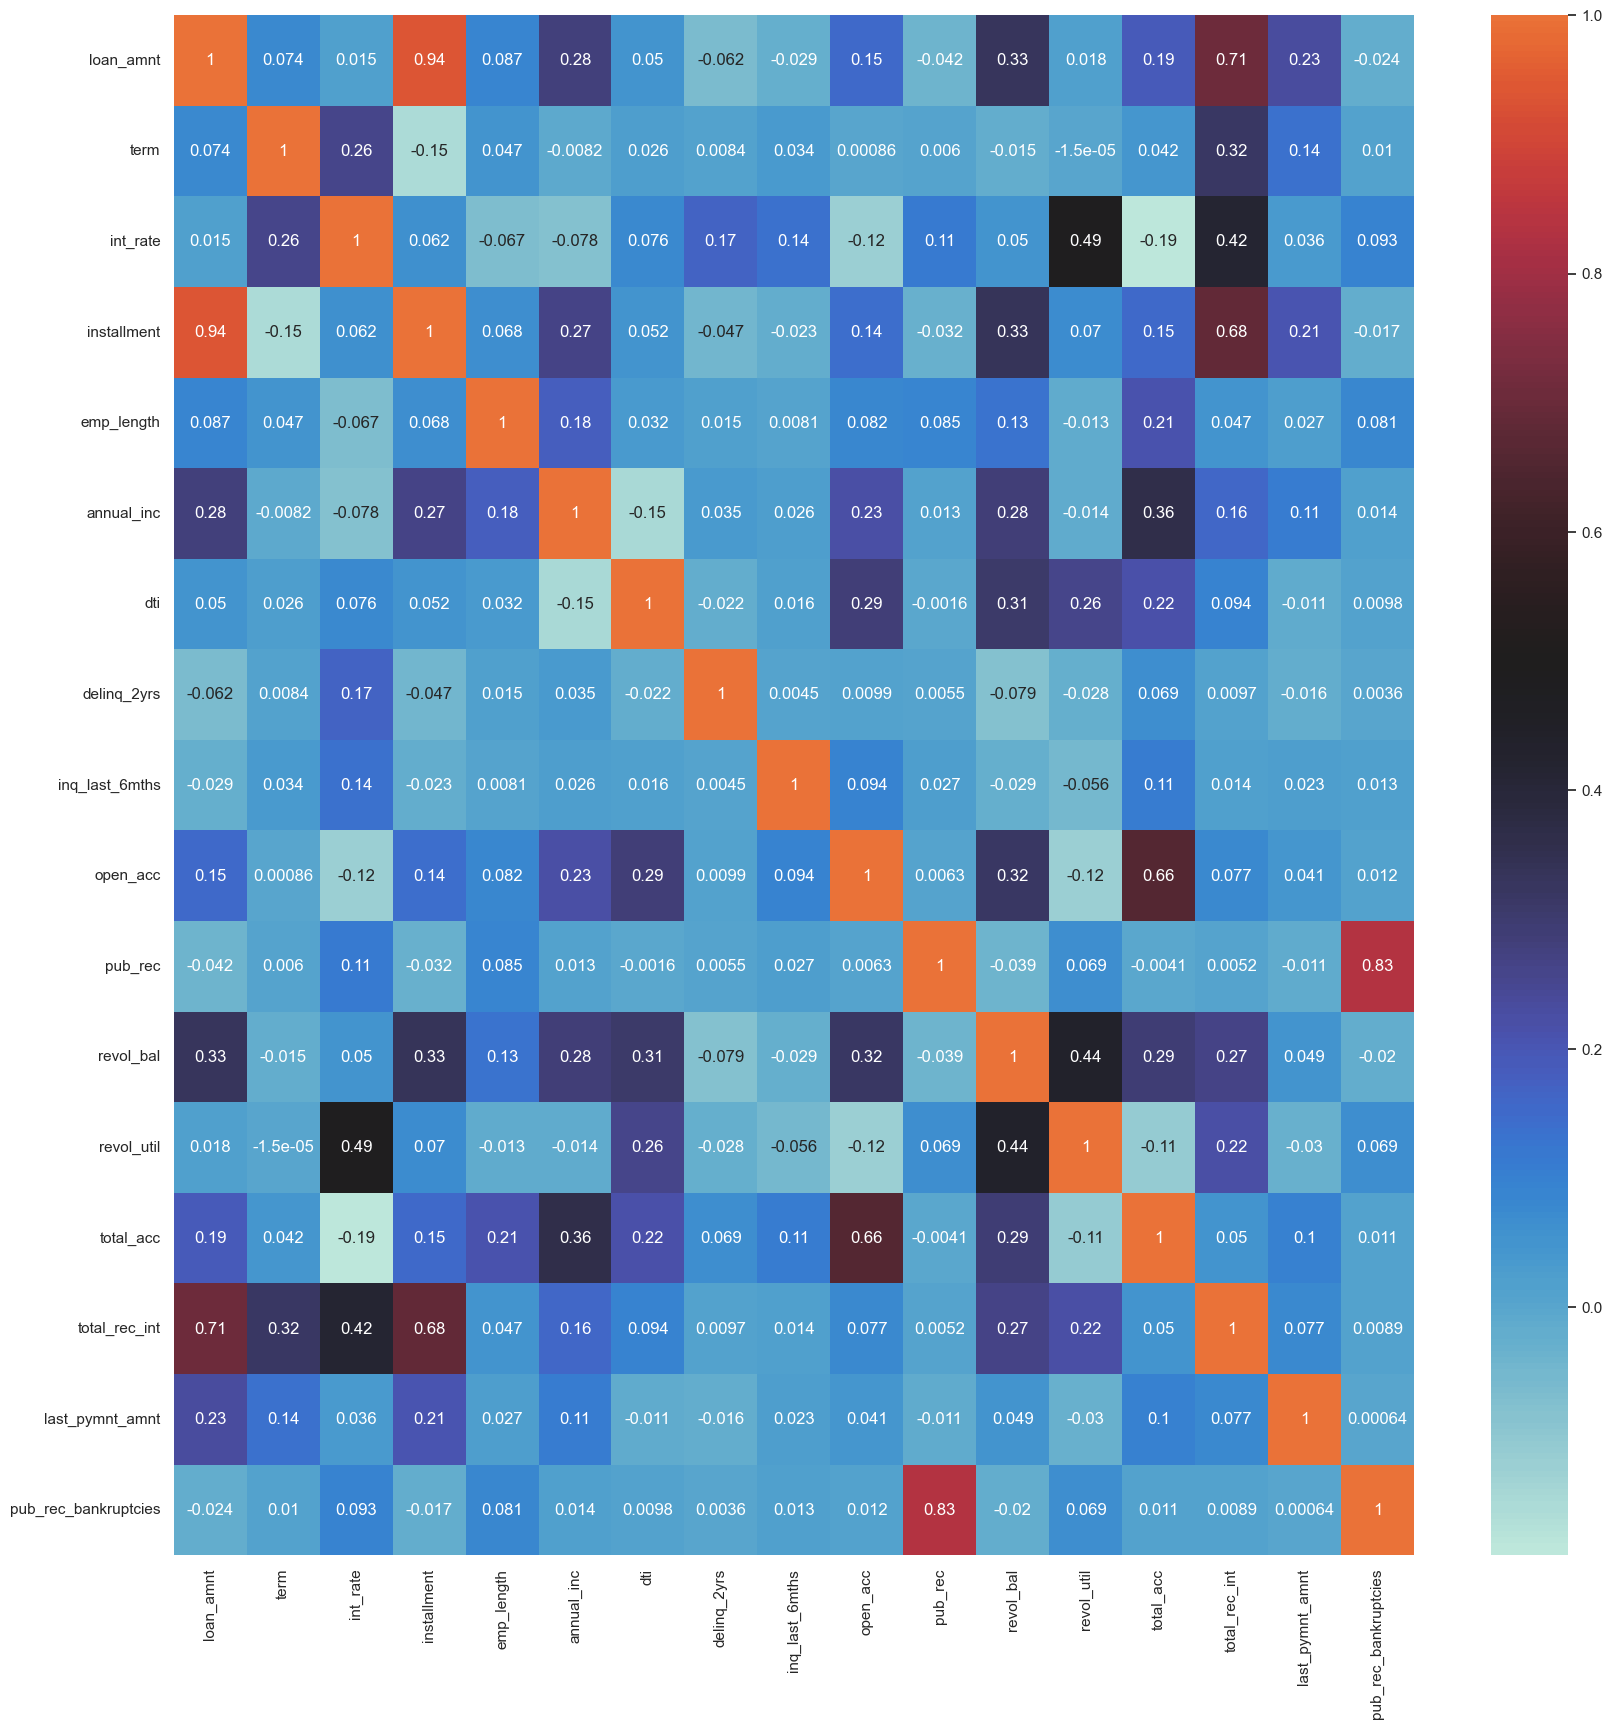

In [237]:
# heatmap plot
sb.set(rc = {'figure.figsize':(20, 20)})
sb.heatmap(df_cR, annot=True, center=0.5)

>- 'int_rate' is 49% correlated to 'revol_util' [___SAFE___]
>- 'loan_amnt' is 33% correlated with 'revol_bal' [___RISK___]